<h1>GoCleer Dataset</h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1DmYllo6zbfSaPNS683Tunkqz4UBvQvjc?usp=sharing)

<h3>Instrucciones</h3>

En esta ocasión la idea es poder evaluar:
<ul>-Estructuración</ul>
<ul>-Metodología técnica</ul>
<ul>-Practicidad</ul>
<ul>-Creatividad</ul>
<ul>-Análisis</ul>

<p>El dataset que te comparto contiene los viajes de diferentes usuarios durante un periodo de tiempo. Se espera que:</p>

<ol>
  <li> Puedas presentarnos distintos insights sobre lo que ves y crees que tiene valor.</li>
  <li> Hacer un análisis de clusters y encontrar grupos homogéneos.</li>
  <li> Hacer una predicción de un comportamiento futuro y analizar cuán bien ajusta el modelo.</li>
  <li> Explicar brevemente cómo crees que esta información puede ayudar a mejorar la performance y toma de decisiones de las distintas áreas de la compañía (Mkt, Operaciones, Producto, Underwritting).</li>
</ol>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os 
from shapely.geometry import Point, Polygon
from datetime import datetime
import seaborn as sns
sns.set()

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 300)

In [6]:
path_data_folder = '/content/drive/MyDrive/GoCleer/'
os.makedirs(os.path.join(path_data_folder, 'output'), exist_ok=True)

In [7]:
path_to_file = os.path.join(path_data_folder, 'part-00000-713bdd21-b077-4b09-8396-1e67fc730157-c000 (1).csv')

## Descripcion del Dataset

In [8]:

df = pd.read_csv(path_to_file, parse_dates=['start', 'end'])
df.head()

user_id  ...  duration
0  608170e5c999f10700000004  ...      4400
1  608170e5c999f10700000004  ...       327
2  608170e5c999f10700000004  ...       423
3  608170e5c999f10700000004  ...      1680
4  608170e5c999f10700000004  ...       291

[5 rows x 8 columns]

In [9]:
df.info()

# Metadata_user_id --> No data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype                                
---  ------            --------------  -----                                
 0   user_id           2747 non-null   object                               
 1   metadata_user_id  0 non-null      float64                              
 2   start             2747 non-null   datetime64[ns, pytz.FixedOffset(120)]
 3   end               2747 non-null   datetime64[ns, pytz.FixedOffset(120)]
 4   mode              2747 non-null   object                               
 5   distance          2747 non-null   int64                                
 6   waypoints         2747 non-null   object                               
 7   duration          2747 non-null   int64                                
dtypes: datetime64[ns, pytz.FixedOffset(120)](2), float64(1), int64(2), object(3)
memory usage: 171.8+ KB


In [10]:
print('La data es del período de: ', df['start'].min().strftime("%d %B, %Y"), ' a ', df['start'].max().strftime("%d %B, %Y"))

La data es del período de:  18 April, 2021  a  19 June, 2021


In [11]:
df = df.drop('metadata_user_id', axis=1)

In [12]:
df[['distance', 'duration']].describe()

distance  duration
count   2747.000  2747.000
mean    9355.481   857.149
std    34287.176  2236.235
min        0.000    30.000
25%      506.000   233.000
50%     1497.000   386.000
75%     4636.000   850.500
max   808513.000 79458.000

## Insights

In [13]:
# Number of users in the df
list_users = df['user_id'].unique()
print('Number of users in the df:', len(list_users))
print(list_users)

Number of users in the df: 9
['608170e5c999f10700000004' '607ff34f67b7a60700000043'
 '5f6e1b8e4725100600000069' '60802225992985080000000a'
 '6080121e67b7a6070000004a' '5eb92de301ff8b0600000150'
 '60819d56bc90660700000017' '5f2acf16235ba80600000466'
 '60800c95c310e10700000008']


In [14]:
list_alias_users = []
for a,b in enumerate(list_users):
  a = a+1
  x = 'User_' + str(a)
  list_alias_users.append(x)

list_users_df = dict(zip(list_users,list_alias_users))

lista = []
for i in df['user_id']: 
  lista.append(list_users_df[i])

df['Alias'] = lista

### Movilidad de Usuarios por Duracion y Distancia

In [15]:
users_movility = df.groupby('Alias')[['duration', 'distance']].sum()

        duration  distance
Alias                     
User_1    228073   1790561
User_2    224934   4186475
User_3    245793   3240018
User_4    325705   3839571
User_5    273651   2471939
User_6    137976    763024
User_7    271730   2058691
User_8    360233   5035929
User_9    286494   2313297


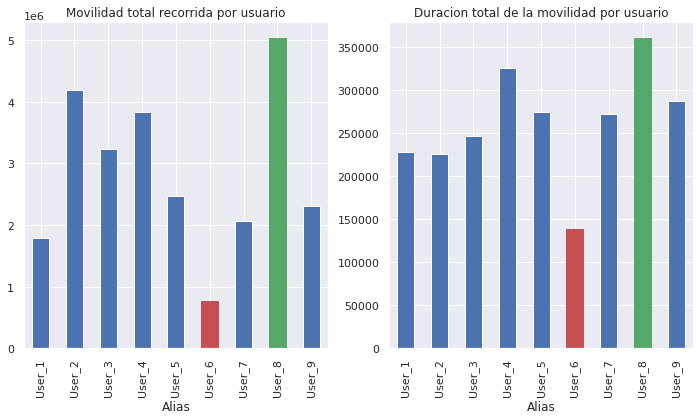

In [16]:
print(users_movility)
f, ax = plt.subplots(1,2, figsize=(12,6))
users_movility['distance'].plot.bar(ax=ax[0])
ax[0].get_children()[5].set_color('r')
ax[0].get_children()[7].set_color('g')
ax[0].set_title('Movilidad total recorrida por usuario')
users_movility['duration'].plot.bar(ax=ax[1])
ax[1].get_children()[5].set_color('r')
ax[1].get_children()[7].set_color('g')
ax[1].set_title('Duracion total de la movilidad por usuario')
plt.show()

In [91]:
print('mean: ',df[(df['Alias'] != 'User_6') & (df['Alias'] != 'User_8')].groupby('Alias')['duration'].std())
print('std: ',df[(df['Alias'] != 'User_6') & (df['Alias'] != 'User_8')].groupby('Alias')['duration'].mean())
print('Std of whole:', df[(df['Alias'] != 'User_6') & (df['Alias'] != 'User_8')].groupby('Alias')['duration'].sum().std())
print('Mean of whole:', df[(df['Alias'] != 'User_6') & (df['Alias'] != 'User_8')].groupby('Alias')['duration'].sum().mean())

mean:  Alias
User_1   3505.263
User_2   1129.963
User_3    904.882
User_4   1484.808
User_5    856.309
User_7   5103.407
User_9   1167.269
Name: duration, dtype: float64
std:  Alias
User_1    835.432
User_2    848.808
User_3    669.736
User_4    897.259
User_5    762.259
User_7   1100.121
User_9    930.175
Name: duration, dtype: float64
Std of whole: 35601.37225552114
Mean of whole: 265197.14285714284


<h4>Notas:</h4>
<p>Inicialmente, se puede observar la movilidad por usuario, independientemente del modo, en un tramo de 2 meses. Se puede observar que el usuario con menor movilidad por recorrido y duracion viene a ser el User_6. Generalmente los usuarios con menor movilidad tienden a pensar menos en un seguro.</p>
<p> Por otro lado, User_8 es el que posee mayor movilidad en recorrido y duracion. Por lo cual un usuario a tomar en cuenta por su maxima movilidad independientemente del modo. Además, exceptuando los usuarios previamente mencionados y el User_1. Los usuarios se mueven entre un rango de 2e6 a 4e6 de unidad de distancia (pasos o metros).</p>

<p> Es curioso observar que a pesar esta variabilidad de distancias. Los usuarios exceptuando el User_6 and User_8 se mueven con una variabilidad de casi 10hrs(35mil segs) o lo que es alrededor de un 13% del promedio (73.5 hrs o 265mil seg.) lo cual indica un comportamiento muy cercano entre este tipo de usuarios</p>

#### Distancia

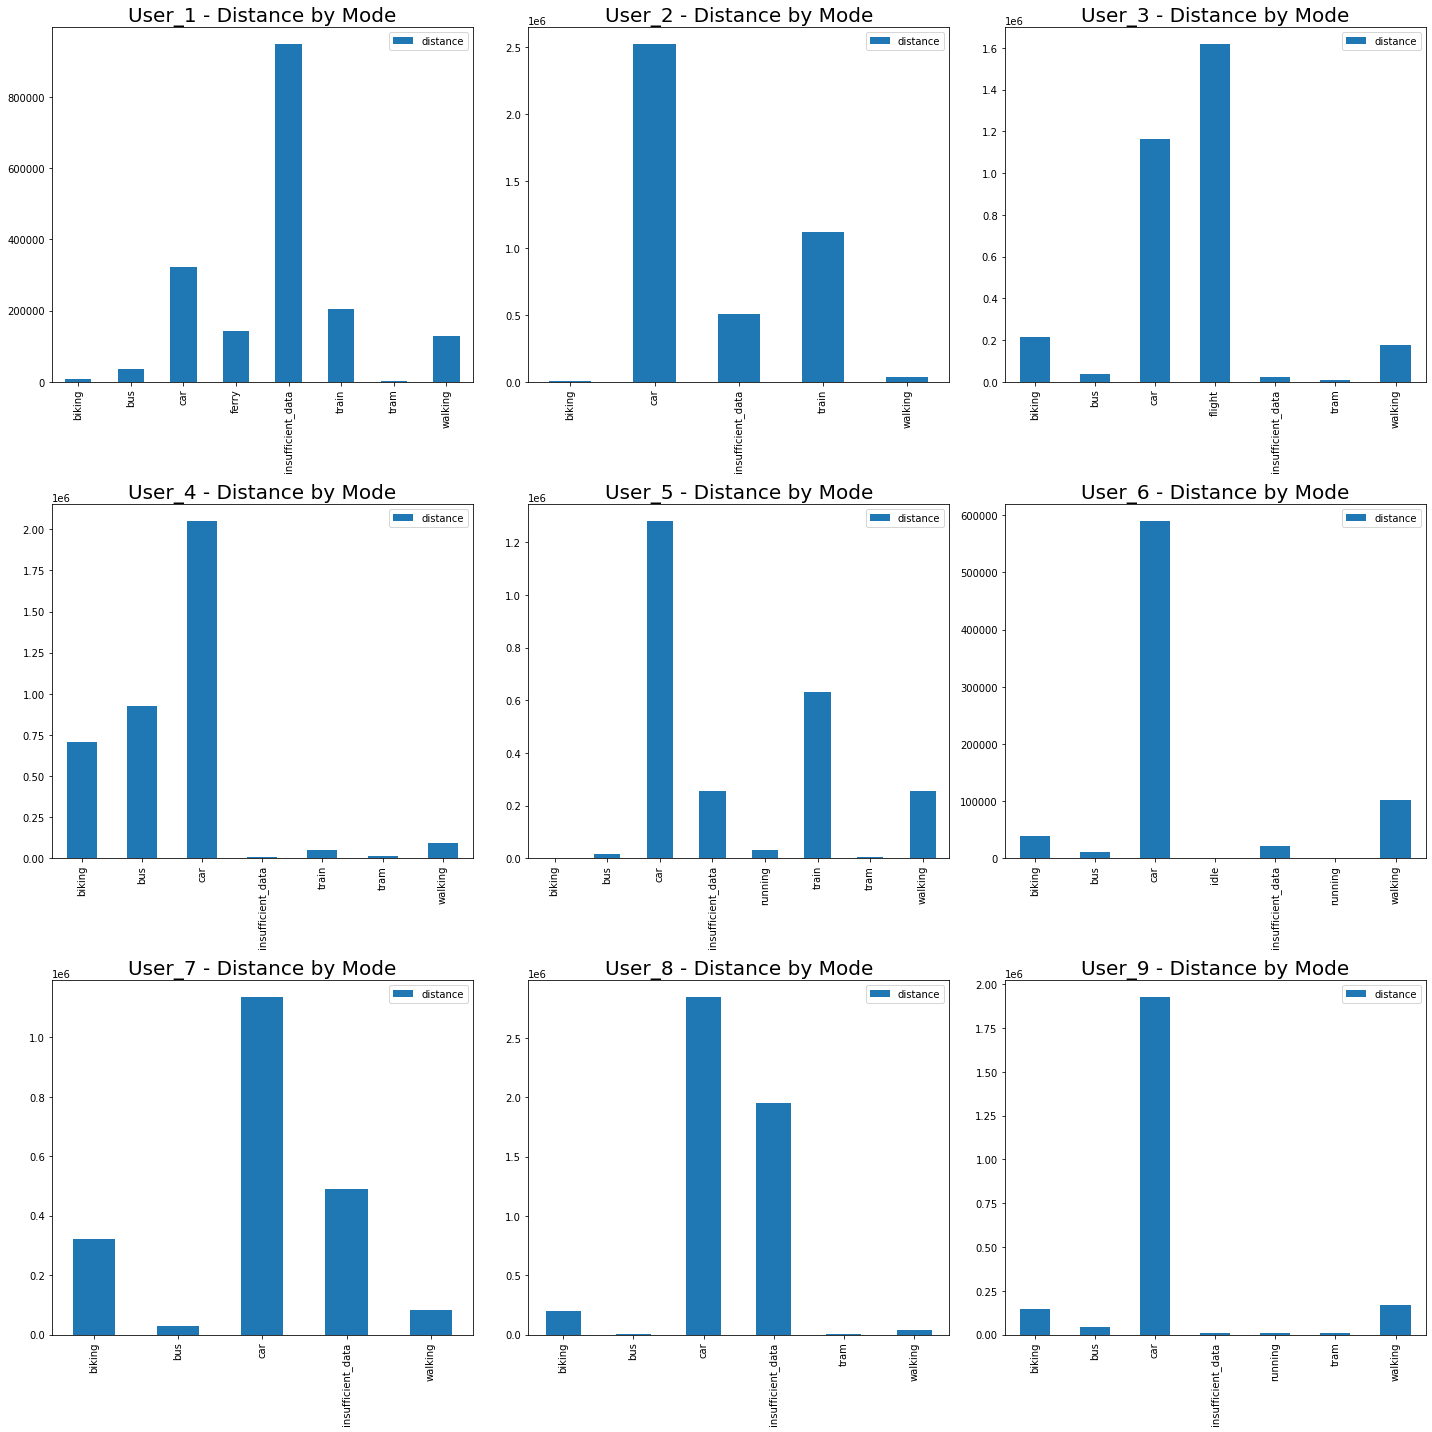

In [93]:
f, ax = plt.subplots(3,3, figsize=(20,20))
df[df['Alias']=='User_1'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[0][0])
ax[0][0].set_title('User_1 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[0][0].set_xlabel('')
df[df['Alias']=='User_2'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[0][1])
ax[0][1].set_title('User_2 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[0][1].set_xlabel('')
df[df['Alias']=='User_3'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[0][2])
ax[0][2].set_title('User_3 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[0][2].set_xlabel('')
df[df['Alias']=='User_4'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[1][0])
ax[1][0].set_title('User_4 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[1][0].set_xlabel('')
df[df['Alias']=='User_5'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[1][1])
ax[1][1].set_title('User_5 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[1][1].set_xlabel('')
df[df['Alias']=='User_6'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[1][2])
ax[1][2].set_title('User_6 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[1][2].set_xlabel('')
df[df['Alias']=='User_7'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[2][0])
ax[2][0].set_title('User_7 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[2][0].set_xlabel('')
df[df['Alias']=='User_8'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[2][1])
ax[2][1].set_title('User_8 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[2][1].set_xlabel('')
df[df['Alias']=='User_9'].groupby('mode')[['distance']].sum().plot.bar(ax=ax[2][2])
ax[2][2].set_title('User_9 - Distance by Mode', fontdict = {'fontsize' : 20})
ax[2][2].set_xlabel('')
f.tight_layout()
plt.show()

<h4>Notas:</h4>

<p>Se puede observar que la totalidad de los usuarios, exceptuando User_3 que lo hace por avión, hacen la mayor distancia en coche. Además el usuario 2 y 5 se mueven bastante en tren. En el caso del User_1 se asume que su mayor movilidad en distancia es en carro debido a que no existe suficiente data de su movilidad. Se puede asumir que la totalidad de los usuarios manejan coche. </p>

<p>Antes de sacar mas conclusiones es necesario analizar la movilidad por dias y la duracion de la movilidad</p>


#### Duración

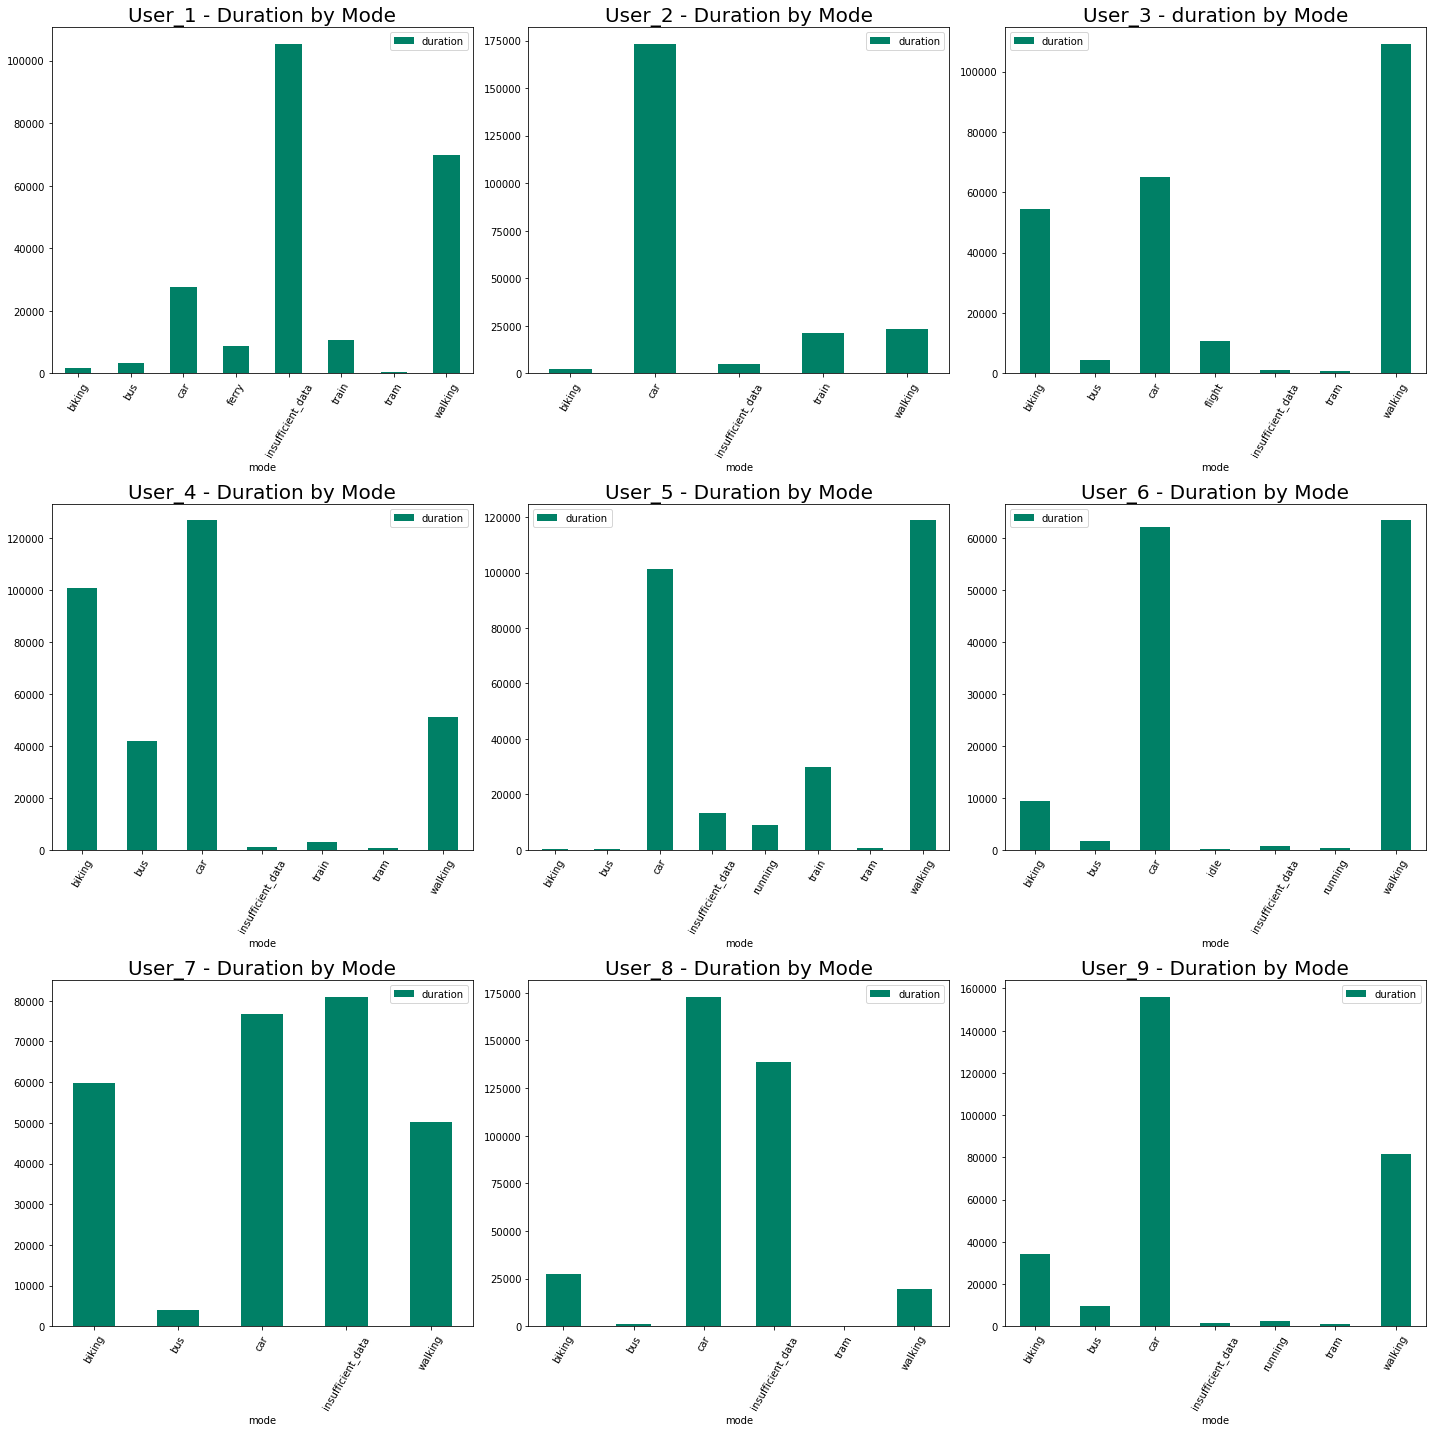

In [139]:
f, ax = plt.subplots(3,3, figsize=(20,20))
df[df['Alias']=='User_1'].groupby('mode')[['duration']].sum().plot(kind='bar', ax=ax[0][0], use_index=True, rot=60, colormap='summer')
ax[0][0].set_title('User_1 - Duration by Mode', fontdict = {'fontsize' : 20})
df[df['Alias']=='User_2'].groupby('mode')[['duration']].sum().plot(kind='bar', ax=ax[0][1], use_index=True, rot=60, colormap='summer')
ax[0][1].set_title('User_2 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_3'].groupby('mode')[['duration']].sum().plot(kind='bar', ax=ax[0][2], rot=60, colormap='summer')
ax[0][2].set_title('User_3 - duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_4'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[1][0], rot=60, colormap='summer')
ax[1][0].set_title('User_4 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_5'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[1][1], rot=60, colormap='summer')
ax[1][1].set_title('User_5 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_6'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[1][2], rot=60, colormap='summer')
ax[1][2].set_title('User_6 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_7'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[2][0], rot=60, colormap='summer')
ax[2][0].set_title('User_7 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_8'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[2][1], rot=60, colormap='summer')
ax[2][1].set_title('User_8 - Duration by Mode', fontdict = {'fontsize' : 20})

df[df['Alias']=='User_9'].groupby('mode')[['duration']].sum().plot.bar(ax=ax[2][2], rot=60, colormap='summer')
ax[2][2].set_title('User_9 - Duration by Mode', fontdict = {'fontsize' : 20})

f.tight_layout()
plt.show()

<h4>Notas:</h4>

<p>A pesar de la data insuficiente para el User_1 se puede observar que la mayor parte del tiempo moviendose el usuario la hace caminando seguido por el coche. </p>

<p><b>A tomar en cuenta:</b> Users_1, Users_7, and Users_8 existe una gran cantidad de data insuficiente lo cual puede cambiar el analisis sobre estos usuarios.</p>

<p>User_2, _4, _7, _8, _9 confirman que la mayor parte de su movilidad la hacer por coche. Validando la data de que reocorrido y distancia por corro (seguramente al trabajo, pero necesario observar los dias de la semana). Por lo cual, no solo en recorrido pero tambien tiempo lo gastan mayormente en coche.</p>

<p> User_3, _4, _7 gastan un tiempo considerable en bicicleta, dato a tomar en cuenta. Ya que indica que es un medio de transporte secundario que ocupan bastante. En el caso del User_3 el timepo es notablemente mayor caminando pero en cuanto a recorridos es ciertamente muy parecido.</p>

<p>User_1, _3, _5, _6 tienen el caminar como el pricipal gasto de tiempo en movilidad. Que coincide tambien con el coche siendo su segundo medio de movilidad que mas timepo ocupan, lo cual indicaria que combinan ambos para transportarse. </p>

#### Resumen de data

### Movilidad de los Usuarios por fechas

#### Ubicación y GeoData

In [18]:
!pip install geopandas


     |████████████████████████████████| 994 kB 33.6 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 
     |████████████████████████████████| 6.3 MB 59.1 MB/s 


In [19]:
import geopandas as gp

In [20]:
import ast
df_geo = df
df2 = df_geo["waypoints"].astype('str')
df2 = df2.apply(lambda x: ast.literal_eval(x))
df2 = df2.apply(pd.Series)
df2.head()

waypoints
0  [{'latitude': 41.3802, 'longitude': 2.19039, '...
1  [{'latitude': 39.77056, 'longitude': 3.02785, ...
2  [{'latitude': 41.37372, 'longitude': 2.17773, ...
3  [{'latitude': 41.2392, 'longitude': 1.80931, '...
4  [{'latitude': 41.24174, 'longitude': 1.8099, '...

In [21]:
LAT = []
LONG = []
timestamp = []
length = []
for i in df2['waypoints']:
  length.append(len(i))
  for j in i:
    LAT.append(j['latitude'])
    LONG.append(j['longitude'])
    timestamp.append(j['timestamp'])

In [22]:
def iter_lista(length, df):
  lista = []
  for a,b in enumerate(length):
    for i in ([df[a]] * b):
      lista.append(i)
  return lista

Alias = iter_lista(length, df['Alias'])
Mode = iter_lista(length, df['mode'])

In [23]:
geo_df = pd.DataFrame(columns=['Alias', 'Mode', 'LAT', 'LONG', 'timestamp'])
geo_df['Alias'] = Alias
geo_df['Mode'] = Mode
geo_df['LAT'] = LAT
geo_df['LONG'] = LONG
geo_df['timestamp'] = timestamp
geo_df['timestamp'] = pd.to_datetime(geo_df['timestamp'], format="%Y-%m-%dT%H:%M:%S%z")
geo_df.head()

Alias     Mode    LAT  LONG                 timestamp
0  User_1  walking 41.380 2.190 2021-04-29 08:29:17+02:00
1  User_1  walking 41.393 2.205 2021-04-29 08:29:17+02:00
2  User_1  walking 41.393 2.205 2021-04-29 08:29:36+02:00
3  User_1  walking 41.393 2.205 2021-04-29 08:29:37+02:00
4  User_1  walking 41.394 2.206 2021-04-29 08:29:58+02:00

In [24]:

coordinates = geo_df[['LAT', 'LONG']].apply(lambda row: Point(row['LONG'], row['LAT']), axis=1)
geo_df['geometry'] = coordinates
df_coordinates = gp.GeoDataFrame({'geometry': coordinates})
df_coordinates['Alias'] = Alias
df_coordinates['Mode'] = Mode
df_coordinates['timestamp'] = geo_df.timestamp
df_coordinates['WeekDay'] = df_coordinates['timestamp'].dt.day_name()
df_coordinates = df_coordinates.set_index('timestamp')
df_coordinates.head()

geometry   Alias     Mode   WeekDay
timestamp                                                                     
2021-04-29 08:29:17+02:00  POINT (2.19039 41.38020)  User_1  walking  Thursday
2021-04-29 08:29:17+02:00  POINT (2.20507 41.39259)  User_1  walking  Thursday
2021-04-29 08:29:36+02:00  POINT (2.20516 41.39275)  User_1  walking  Thursday
2021-04-29 08:29:37+02:00  POINT (2.20516 41.39275)  User_1  walking  Thursday
2021-04-29 08:29:58+02:00  POINT (2.20580 41.39362)  User_1  walking  Thursday

In [25]:
map_sp = gp.read_file(os.path.join(path_data_folder,'ESP_adm/ESP_adm3.shp'))
map_bcn = gp.read_file(os.path.join(path_data_folder,'Copy of barris.geojson'))

In [26]:
df_dates = df[['Alias', 'start', 'mode', 'duration', 'distance']]
df_dates['DayofWeek'] = df_dates.loc[:,'start'].dt.day_name()
#df_dates = df_dates[(df_dates['DayofWeek'] != 'Saturday') & (df_dates['DayofWeek']!= 'Sunday')]
df_dates = df_dates.set_index('start')
#df_month_1st = df_dates.loc[:'2021-05-19']
#df_month_2nd = df_dates.loc['2021-05-19':]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### User_1

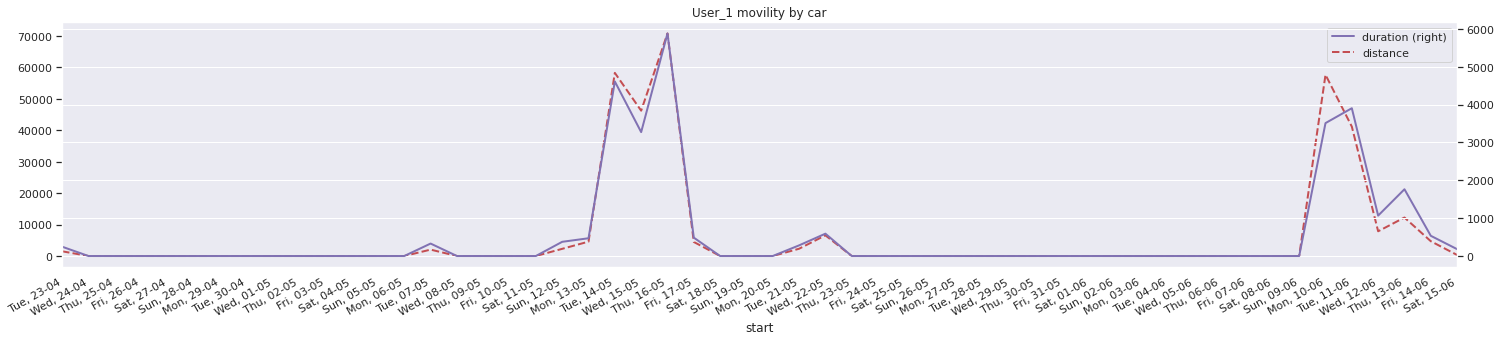

In [62]:
User_1 = df_dates[df_dates['Alias']=='User_1'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_1.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_1 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

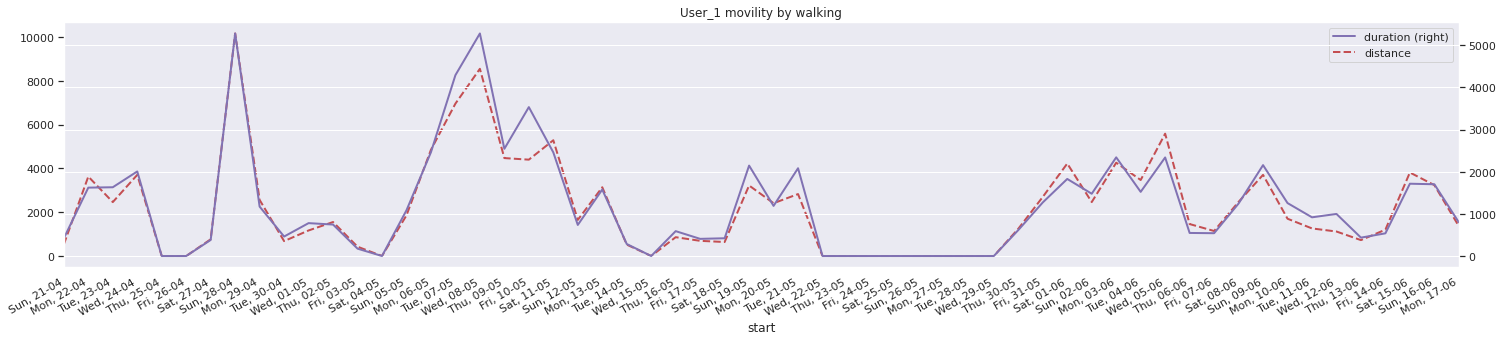

In [63]:
User_1 = df_dates[df_dates['Alias']=='User_1'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_1.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_1 movility by walking')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>El User_1 es analizado en base al plot anterior de movilidad y siguiendo el analisis previo que requeria analizar la movilidad por día. Esto nos lleva a analizar la movilidad diaria en coche y caminando, ya que el análisis de los otros modos no se tiene suficiente data para analizar. El uso del bus (el final del 1er período y comienzo del 2do período), ferry (medio del 1er periodo) y el tren (comienzo del 1er periodo y esporadicamente antes y después) coincide con el uso del coche también.</p>

<p>En el caso del User_1 se tiene que el coche el cual lo utiliza mayormente en 2 semanas dentro del periodo de 2 mses de analisis y otro periodo mas corto de 3 dias. El periodo de 3 dias utilizar el carro por un periodo de tiempo corto. Mientras que la gran cantidad de recorrido y duracion lo tiene del periodo de dos semanas, el cual cabe mencionar que coinciden en el mes de Mayo y Junio (11/05 - 18/05 y 09/06 - 16/06). Concluyendo que el User_1 utiliza con frecuencia el coche para movilizarse (quizas trabajo, necesario analizar ubicacion) 1 semana al mes.</p>

<p>En cuanto a movilidad caminando, posee patrones muy variables con periodo del 22-05 al 29-05 es es totalmente estático y no coincide con otro medio de movilidad. En cuanto a la coincidencia con el uso del coche, no son sus picos más alto pero posee cierta movilidad caminando.</p>

<p>Cabe mencionar que el User_1 tiene como registro mas grande el de insufficient data, por lo cual las conclusiones es en base a la data disponible.</p>

#### Maps

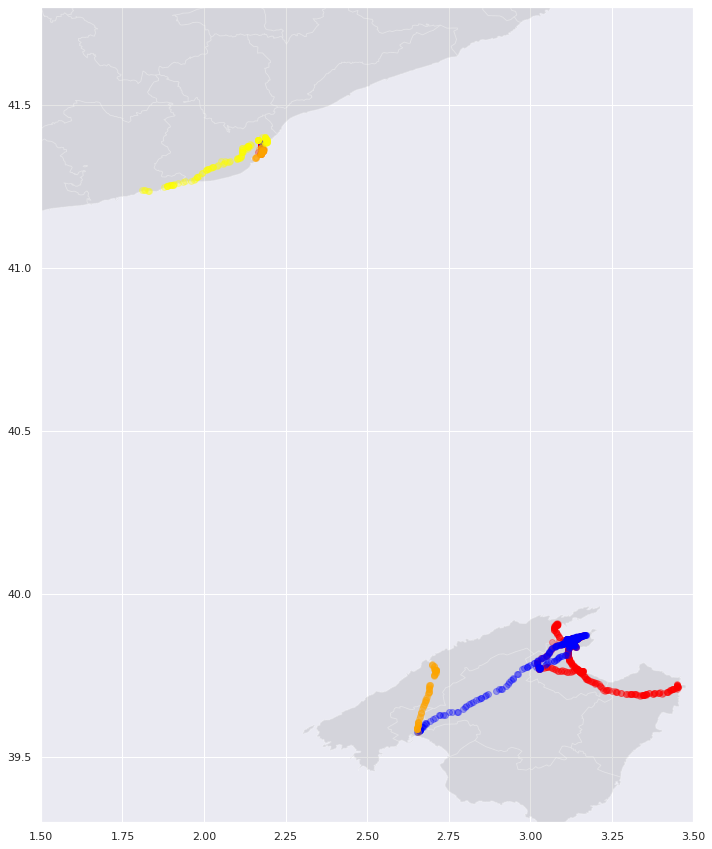

In [334]:
df_coordinates_User_1 = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='car')]
df_coordinates_User_1_bus = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='bus')]
df_coordinates_User_1_train = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='train')]
fig,ax = plt.subplots(1, figsize = (12,15))
ax.set_ylim(39.3,41.8)
ax.set_xlim(1.5,3.5)
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
df_coordinates_User_1.loc['2021-05-11':'2021-05-18'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1.loc['2021-06-09':'2021-06-16'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_1_bus.loc['2021-05-18':'2021-06-16'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_1_train.loc['2021-05-07':'2021-05-09'].plot(ax=Spain, color='yellow', alpha=0.3)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


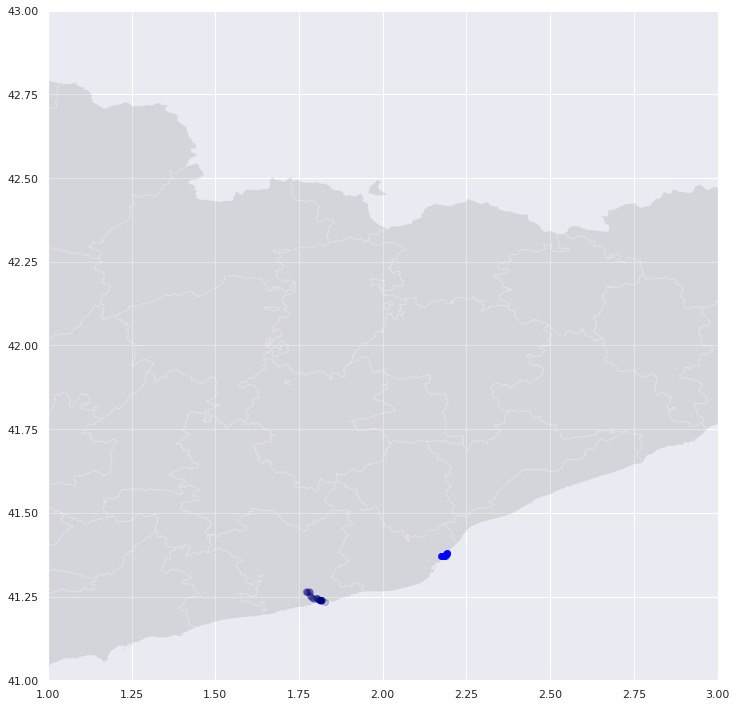

In [457]:
df_coordinates_User_1_wk = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='car')& (df_coordinates['WeekDay']!='Sunday') & (df_coordinates['WeekDay']!='Saturday')]
df_coordinates_User_1_wkd = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='car')& ((df_coordinates['WeekDay']=='Sunday') | (df_coordinates['WeekDay']=='Saturday'))]
fig,ax = plt.subplots(1, figsize = (12,15))
ax.set_ylim(41,43)
ax.set_xlim(1,3)
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
df_coordinates_User_1_wk.loc['2021-04-23':'2021-05-10'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1_wkd.loc['2021-04-23':'2021-05-10'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_1_wk.loc['2021-05-19':'2021-05-25'].plot(ax=Spain, color='yellow', alpha=0.8)
df_coordinates_User_1_wkd.loc['2021-05-19':'2021-05-25'].plot(ax=Spain, color='navy', alpha=0.2)
df_coordinates_User_1_wk.loc['2021-05-25':'2021-06-09'].plot(ax=Spain, color='red', alpha=0.8)
df_coordinates_User_1_wkd.loc['2021-05-25':'2021-06-09'].plot(ax=Spain, color='darkorange', alpha=0.2)

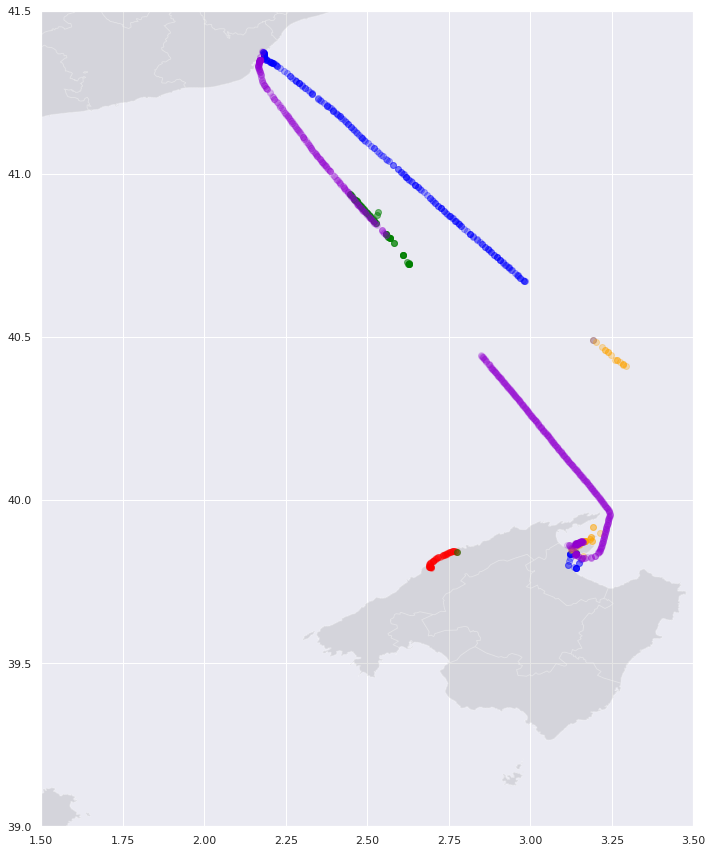

In [495]:
df_coordinates_User_1 = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='ferry')]
df_coordinates_User_1_insufficient_data = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='insufficient_data')]
fig,ax = plt.subplots(1, figsize = (12,15))
ax.set_ylim(39,41.5)
ax.set_xlim(1.5,3.5)
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
df_coordinates_User_1.loc['2021-06-11':'2021-06-12'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1.loc['2021-06-15':'2021-06-16'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_1_insufficient_data.loc['2021-06-11':'2021-06-12'].plot(ax=Spain, color='green', alpha=0.5)
df_coordinates_User_1_insufficient_data.loc['2021-06-15':'2021-06-16'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_1_insufficient_data.loc['2021-05-11':'2021-05-17'].plot(ax=Spain, color='darkviolet', alpha=0.15)
df_coordinates_User_1_insufficient_data.loc['2021-05-18':'2021-05-19'].plot(ax=Spain, color='peru', alpha=0.3)


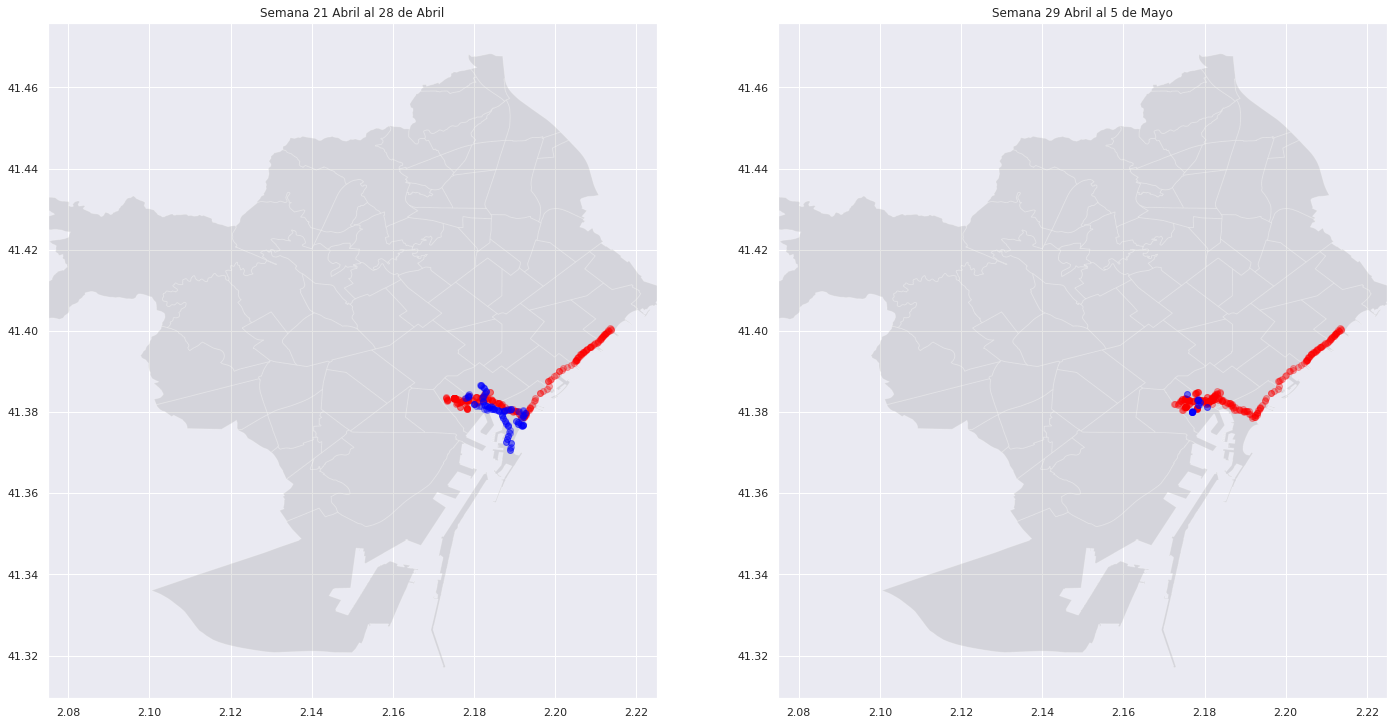

In [451]:
df_coordinates_User_1_wd = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking')& (df_coordinates['WeekDay']!='Sunday') & (df_coordinates['WeekDay']!='Saturday')]
df_coordinates_User_1_wend = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking') & ((df_coordinates['WeekDay']=='Sunday') | (df_coordinates['WeekDay']=='Saturday'))]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (24,30))

#ax.set_ylim(39.3,41.8)
ax1.set_xlim(2.075,2.225)
ax1.set_title('Semana 21 Abril al 28 de Abril')
Spain = map_bcn.plot(ax=ax1, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)

#ax.set_ylim(39.3,41.8)
ax2.set_xlim(2.075,2.225)
ax2.set_title('Semana 29 Abril al 5 de Mayo')
Spain_ = map_bcn.plot(ax=ax2, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-04-29':'2021-05-06'].plot(ax=Spain_, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-04-29':'2021-05-06'].plot(ax=Spain_, color='blue', alpha=0.3)


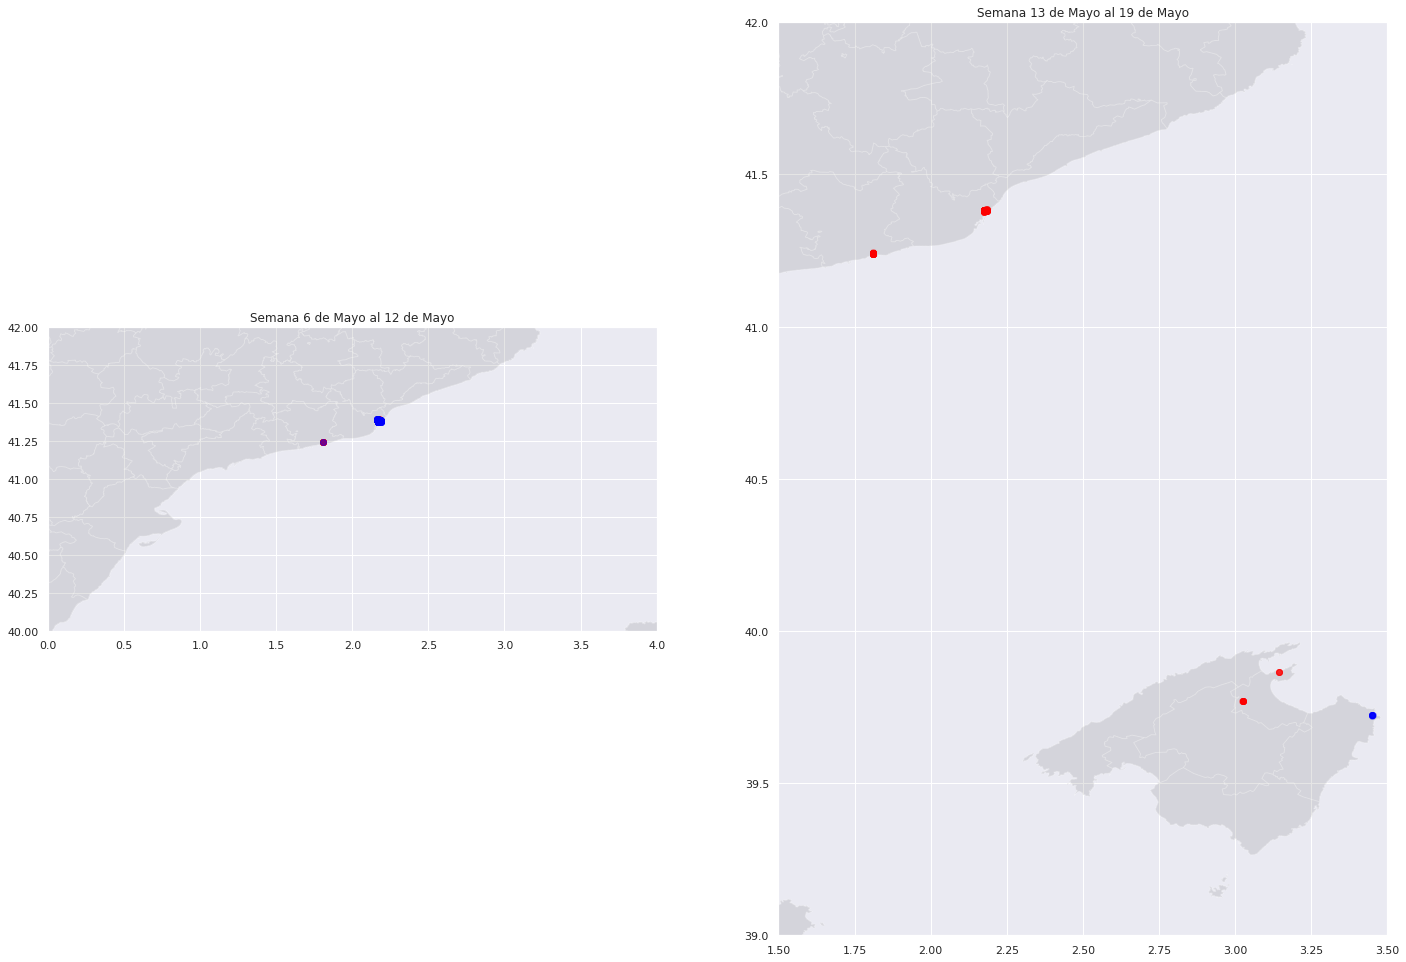

In [488]:
df_coordinates_User_1_wd = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking')& (df_coordinates['WeekDay']!='Sunday') & (df_coordinates['WeekDay']!='Saturday')]
df_coordinates_User_1_wend = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking') & ((df_coordinates['WeekDay']=='Sunday') | (df_coordinates['WeekDay']=='Saturday'))]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (24,30))

ax1.set_title('Semana 6 de Mayo al 12 de Mayo')
ax1.set_ylim(40,42)
ax1.set_xlim(0,4)
Spain = map_sp.plot(ax=ax1, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='blue', alpha=0.3)

ax2.set_title('Semana 13 de Mayo al 19 de Mayo')
ax2.set_ylim(39,42)
ax2.set_xlim(1.5,3.5)
Spain_ = map_sp.plot(ax=ax2, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-05-13':'2021-05-20'].plot(ax=Spain_, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-05-13':'2021-05-20'].plot(ax=Spain_, color='blue', alpha=0.3)



/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


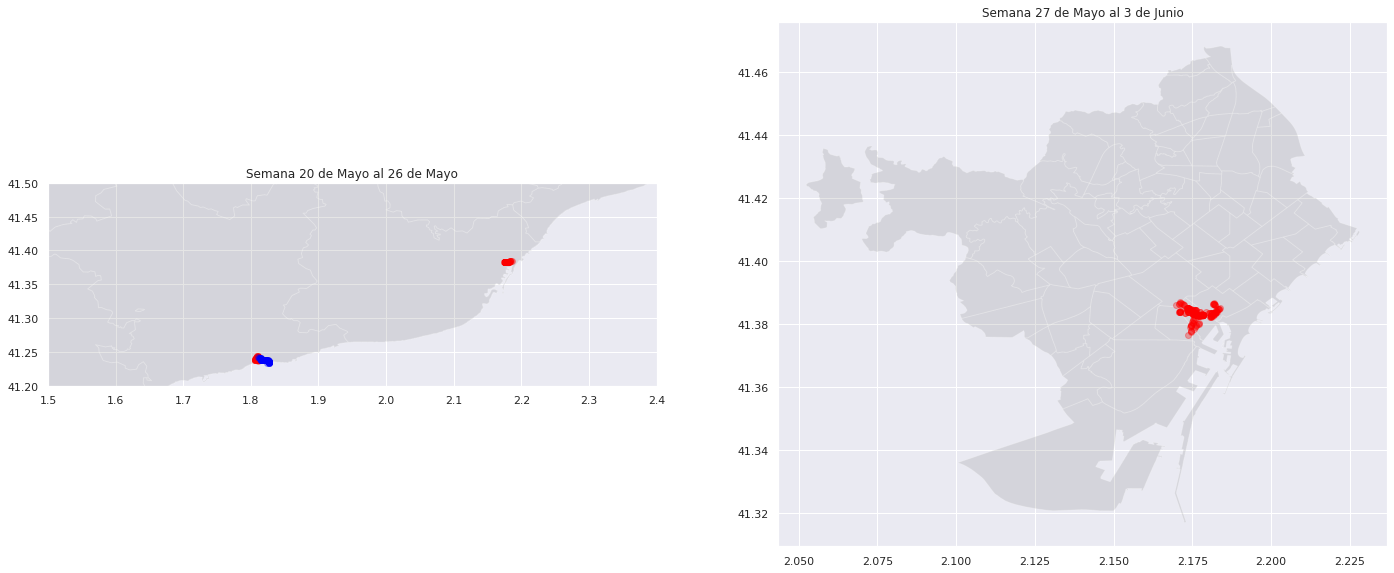

In [453]:
df_coordinates_User_1_wd = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking')& (df_coordinates['WeekDay']!='Sunday') & (df_coordinates['WeekDay']!='Saturday')]
df_coordinates_User_1_wend = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking') & ((df_coordinates['WeekDay']=='Sunday') | (df_coordinates['WeekDay']=='Saturday'))]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (24,30))

ax1.set_title('Semana 20 de Mayo al 26 de Mayo')
ax1.set_ylim(41.2,41.5)
ax1.set_xlim(1.5,2.4)
Spain = map_sp.plot(ax=ax1, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='blue', alpha=0.3)

ax2.set_title('Semana 27 de Mayo al 3 de Junio')
#ax2.set_ylim(39,42)
#ax2.set_xlim(1.5,3.5)
Spain_ = map_bcn.plot(ax=ax2, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-05-27':'2021-06-03'].plot(ax=Spain_, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-05-27':'2021-06-03'].plot(ax=Spain_, color='blue', alpha=0.3)


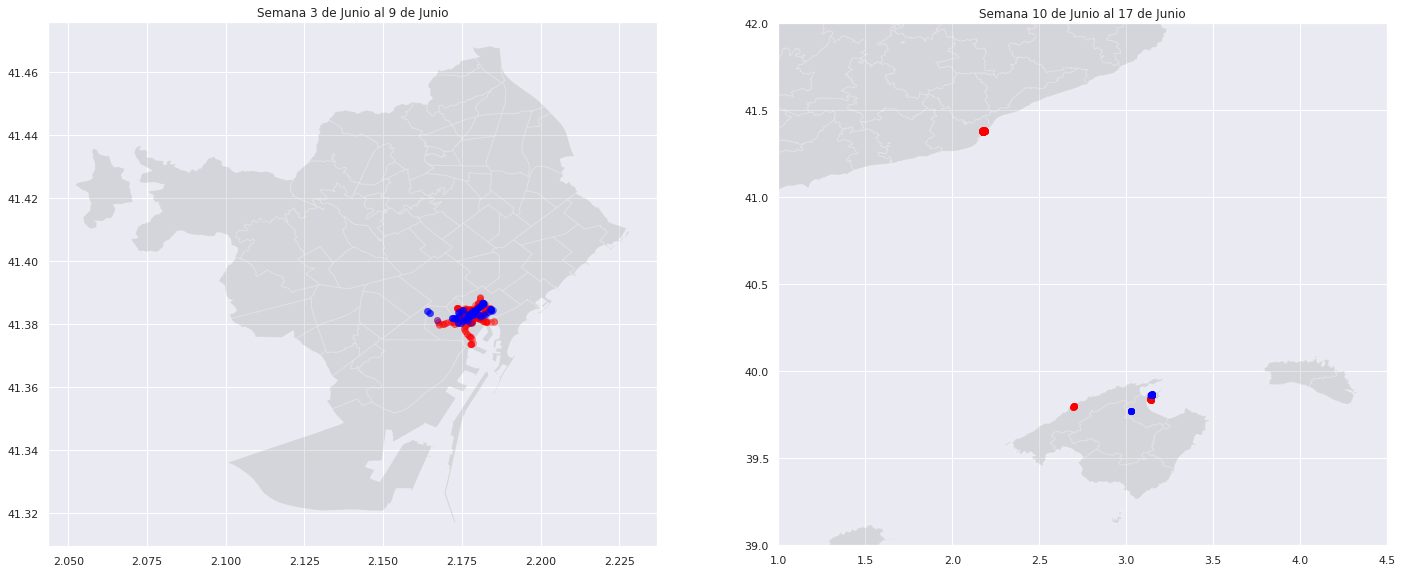

In [454]:
df_coordinates_User_1_wd = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking')& (df_coordinates['WeekDay']!='Sunday') & (df_coordinates['WeekDay']!='Saturday')]
df_coordinates_User_1_wend = df_coordinates[(df_coordinates['Alias']=='User_1') & (df_coordinates['Mode']=='walking') & ((df_coordinates['WeekDay']=='Sunday') | (df_coordinates['WeekDay']=='Saturday'))]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (24,30))

ax1.set_title('Semana 3 de Junio al 9 de Junio')
#ax1.set_ylim(41.2,41.5)
#ax1.set_xlim(1.5,2.4)
Spain = map_bcn.plot(ax=ax1, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='blue', alpha=0.3)

ax2.set_title('Semana 10 de Junio al 17 de Junio')
ax2.set_ylim(39,42)
ax2.set_xlim(1,4.5)
Spain_ = map_sp.plot(ax=ax2, color='gray', alpha=0.2)
df_coordinates_User_1_wd.loc['2021-06-10':'2021-06-18'].plot(ax=Spain_, color='red', alpha=0.3)
df_coordinates_User_1_wend.loc['2021-06-10':'2021-06-18'].plot(ax=Spain_, color='blue', alpha=0.3)

# del 3 al 9 de Junio repitiendo la zona 


<h3>Notes:</h3>

<p>Por la zonas donde habitualmente camina el User_1 se puede deducir que la zona donde trabaja y/o vive es la zona de Barceloneta, Born, o el Raval. Siempre acostumbra a recorrer esa zona.</p>

<p>El User_1 además en el período de la data estuvo en Mallorca en dos ocasiones y ambas yendo y volviendo Ferry (data que se pudo corroborar usando la data de mode insufficient_data). A Mallorca fue inicialmente el 14 y vuelta el 18 de Mayo. Y una segunda ocasión en ferry del 11 de Junio y vuleta el 15 de Junio. El coche lo utilizo durante su tiempo en Mallorca en ambas ocasiones además de ciertas caminatas. Se movió en bus entre el 10 y 11 de Junio, previo a salir a Mallorca. Posterior a manejar el 18 de Mayo tambien tomo el bus una vez ya en Barcelona.</p>
<p>Conduce durante fin de semana de semanas del 22 al 23 de Mayo y del 24 de Abril en Tarragona. El Sabado del 8 de Mayo conduce en Barcelona lo cuál hasta ese momento fue poco común.</p>


#### Apuntes


 Viaje en tren el 7 y 8 de Mayo ha Tarragona
 Mallorca en coche entre el 11 y 18 de Mayo
 Mallorca en coche entre el 11 y 16 de Junio (coincide con el ferry)
 El bus una vez volvio a Barcelona el 18 de Mayo
 Ida red and green y vuelta blue and orange en ferry a Mallorca 11 de Junio y Vuleta el 15 de Junio
 Mallorca 15 y vuelta el 18 de Mayo al 25 de Mayo

 Walking del 21 al 28 de Abril y del 28 al 5 de Mayo fue alrededor del puerto al parecer por dos semanas seguidas
 20 al 26 de Mayo por Tarragona y de nuevo la misma zona en Barcelona al igual que la semana del 27 al 3 de Junio (se puede asumir que la persona trabaja y vive por la zona del RAval, Gotic o Born)
 6 al 12 nuevamente entre Tarragona y Barcelona la misma zona RAval, Gotic o Born
 13 al 19 de MAyo de Tarragona a Barcelona y de Barcelona a Mallorca caminata.
 Semana 3 de Junio al 9 de Junio repitiendo la zona que camina 
Semana 10 de Junio al 17 de Junio caminata en Mallorca y vuelta a Barcelona

#### User_2

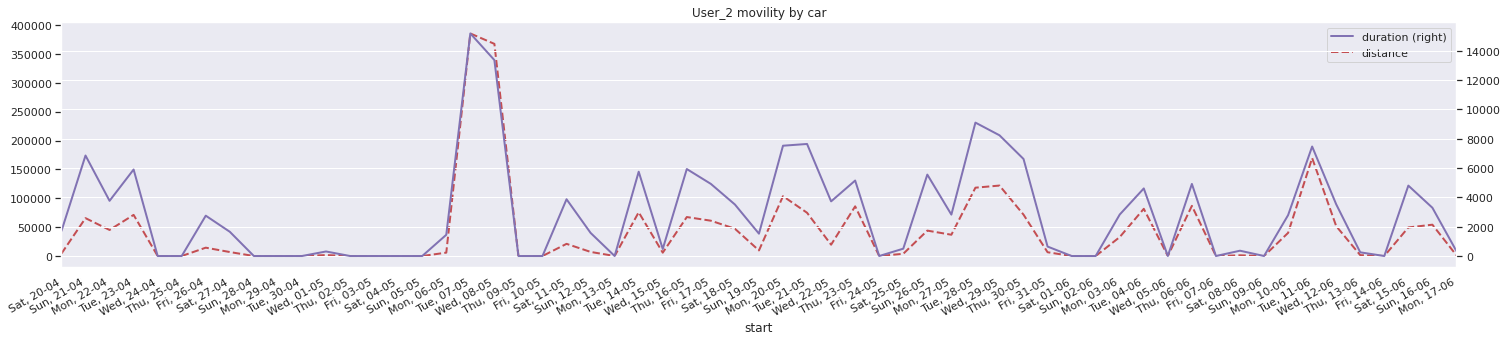

In [66]:
User_2 = df_dates[df_dates['Alias']=='User_2'].groupby('mode').resample('D').sum()
#f, axes = plt.subplots(nrows=3,ncols=1, figsize=(25,10))
#for i,var in enumerate(['car', 'walking', 'train']):
#  User_2.loc[var].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, ax=axes[i],sharex=False)
#  axes[i].xaxis.set_major_locator(mdates.DayLocator(interval=1))
#  axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
#  axes[i].set_title(f'User_2 movility by {var}')

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_2.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_2 movility by car')

plt.gcf().autofmt_xdate()
plt.show()


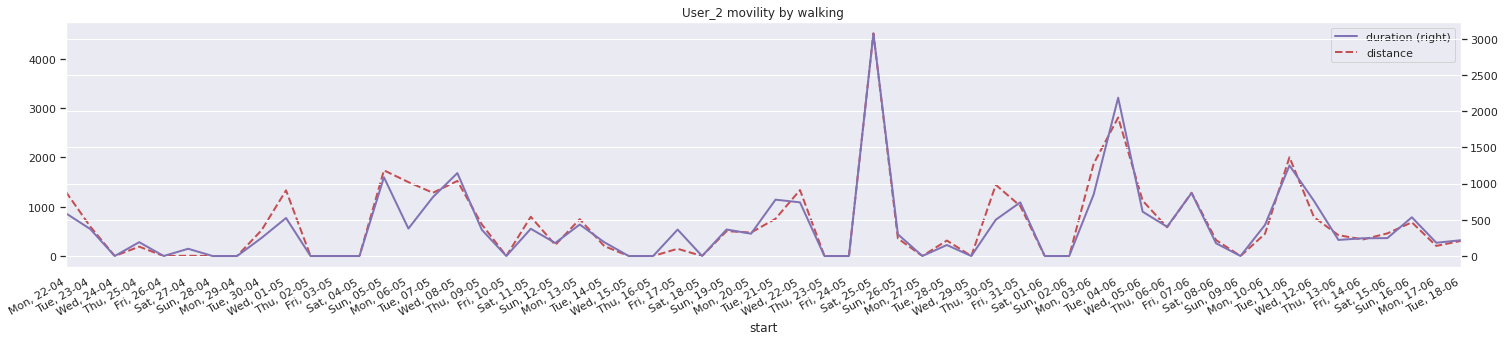

In [64]:
User_2 = df_dates[df_dates['Alias']=='User_2'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_2.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_2 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

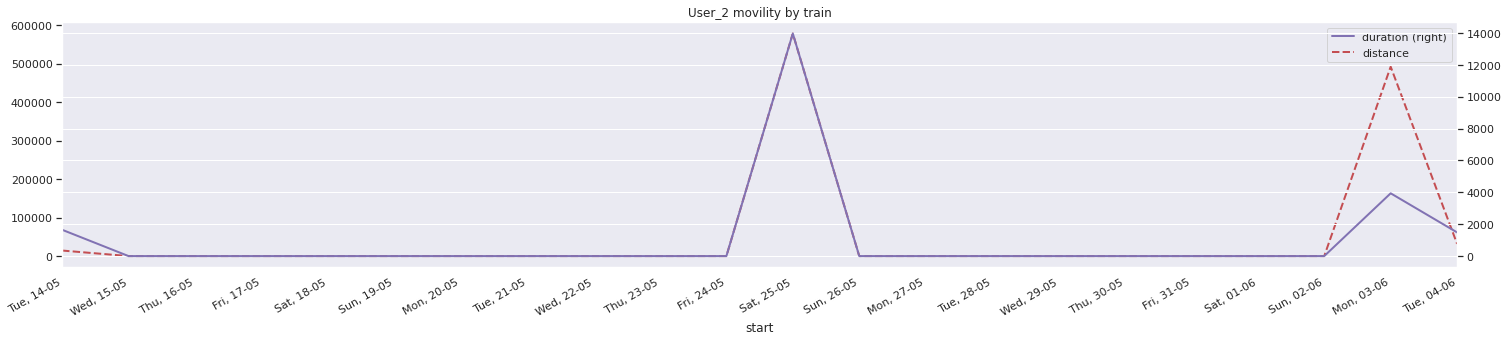

In [65]:
User_2 = df_dates[df_dates['Alias']=='User_2'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_2.loc['train'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_2 movility by train')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>El User_2 basado en el análisis previo, se observa la movilidad en coche, en tren y caminand como principales fuentes de análisis.</p> 

<p>La más sencilla de analizar inicialmente es por tren, el cual posee dos períodos. El primero que coincide totalmente con un fin de semana y coincide con el pico más alto de caminata (y el casi nulo uso del coche).Y el segundo, coincide con el uso del tren en menor tiempo pero larga distancia, al igual que otro pico de caminata y seguido por un uso medio del coche. A verificar con geo-spatial data pero parece algo no rutinario o excepcional (quizás viaje de trabajo o vacación).</p>

<p>La coche es un tipo de movilidad usado normalmente por User_2, a pesar que tiene un periodo nulo del uso de coche (28-04 a 6-05). Se puede inferir que es su princiapl medio de transporte, tanto para el trabajo (diario dentro de la semana) como para los fin de semanas, pero se puede notar algún fin de semana sin uso.</p>

<p>En cuanto a la caminata, los picos más altos coinciden con el uso del tren, quizás por el hecho de no poseer coche en esa circunstancia. En cuanto a distancia no representa un gran valor pero si es más importante al revisar al duración de las caminatas. Asumiría que es para el complemento del uso del coche (Revisar data de ubicación). </p>

In [528]:
df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='train')].loc['2021-05-24':'2021-05-26']

geometry   Alias   Mode    WeekDay
timestamp                                                                     
2021-05-26 20:49:23+02:00  POINT (-0.02655 40.00343)  User_2  train  Wednesday
2021-05-26 20:49:23+02:00   POINT (0.72100 40.81807)  User_2  train  Wednesday
2021-05-26 20:49:28+02:00   POINT (0.75527 40.84988)  User_2  train  Wednesday
2021-05-26 20:49:52+02:00   POINT (0.86336 40.95256)  User_2  train  Wednesday
2021-05-26 20:50:28+02:00   POINT (0.88166 40.96206)  User_2  train  Wednesday
...                                              ...     ...    ...        ...
2021-05-26 11:11:23+02:00   POINT (0.27202 40.26218)  User_2  train  Wednesday
2021-05-26 11:12:31+02:00   POINT (0.27499 40.26097)  User_2  train  Wednesday
2021-05-26 11:13:16+02:00   POINT (0.27577 40.26065)  User_2  train  Wednesday
2021-05-26 09:09:16+02:00   POINT (2.18684 41.42155)  User_2  train  Wednesday
2021-05-26 09:09:16+02:00   POINT (2.13937 41.37879)  User_2  train  Wednesday

[349 rows x 4 columns]

#### Maps

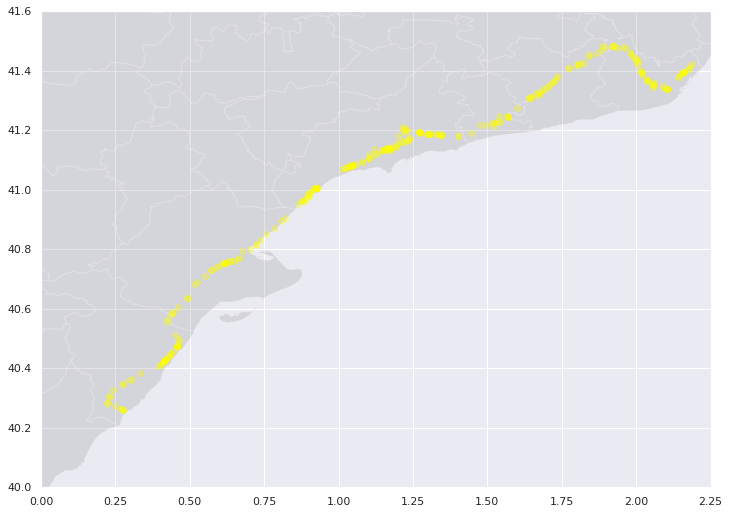

In [516]:
df_coordinates_User_2_insu = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='insufficient_data')]
df_coordinates_User_2_train = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='train')]
fig,ax = plt.subplots(1, figsize = (12,15))
ax.set_ylim(40,41.6)
ax.set_xlim(0,2.25)
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)

df_coordinates_User_2_train.loc['2021-05-24':'2021-05-26'].plot(ax=Spain, color='yellow', alpha=0.3)

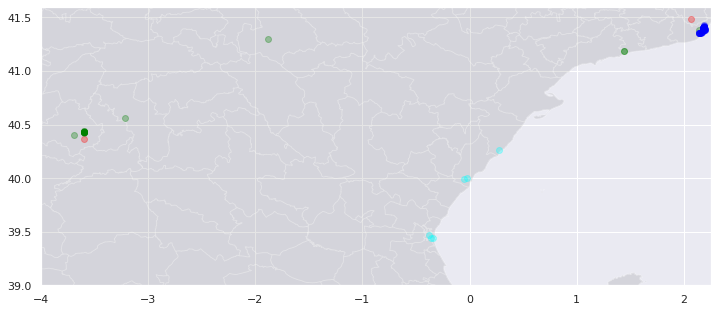

In [521]:
df_coordinates_User_2_insu = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='insufficient_data')]
df_coordinates_User_2_train = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='train')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(39,41.6)
ax.set_xlim(-4,2.25)
df_coordinates_User_2_train.loc['2021-06-02':'2021-06-04'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_2_insu.loc['2021-05-24':'2021-05-26'].plot(ax=Spain, color='cyan', alpha=0.3)
df_coordinates_User_2_insu.loc['2021-06-04':'2021-06-05'].plot(ax=Spain, color='green', alpha=0.3)
df_coordinates_User_2_train.loc['2021-05-13':'2021-05-16'].plot(ax=Spain, color='blue', alpha=0.3)

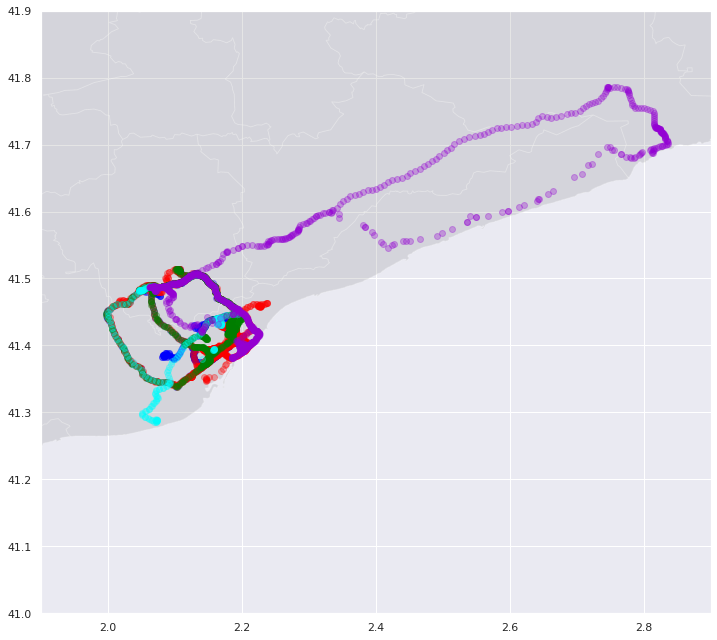

In [548]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41,41.9)
ax.set_xlim(1.9,2.9)
df_coordinates_User_2.loc['2021-04-20':'2021-04-28'].plot(ax=Spain, color='blue', alpha=0.3)

df_coordinates_User_2.loc['2021-05-11':'2021-05-24'].plot(ax=Spain, color='red', alpha=0.3)
df_coordinates_User_2.loc['2021-05-25':'2021-06-01'].plot(ax=Spain, color='green', alpha=0.3)
df_coordinates_User_2.loc['2021-06-02':'2021-06-08'].plot(ax=Spain, color='cyan', alpha=0.3)
df_coordinates_User_2.loc['2021-06-09':'2021-06-17'].plot(ax=Spain, color='darkviolet', alpha=0.3)

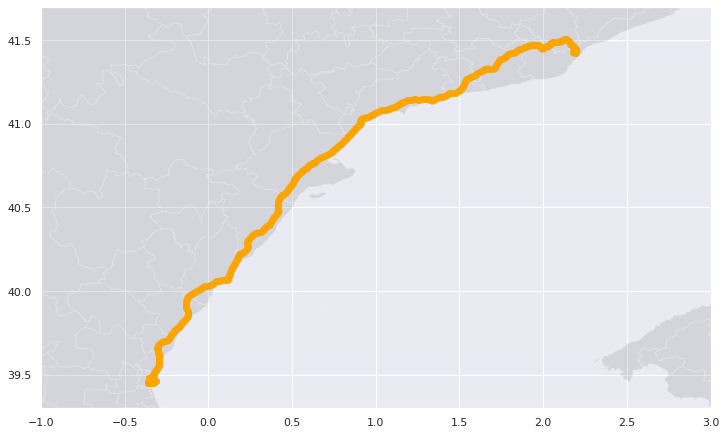

In [546]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(39.3,41.7)
ax.set_xlim(-1,3)
df_coordinates_User_2.loc['2021-05-05':'2021-05-10'].plot(ax=Spain, color='orange', alpha=0.3)

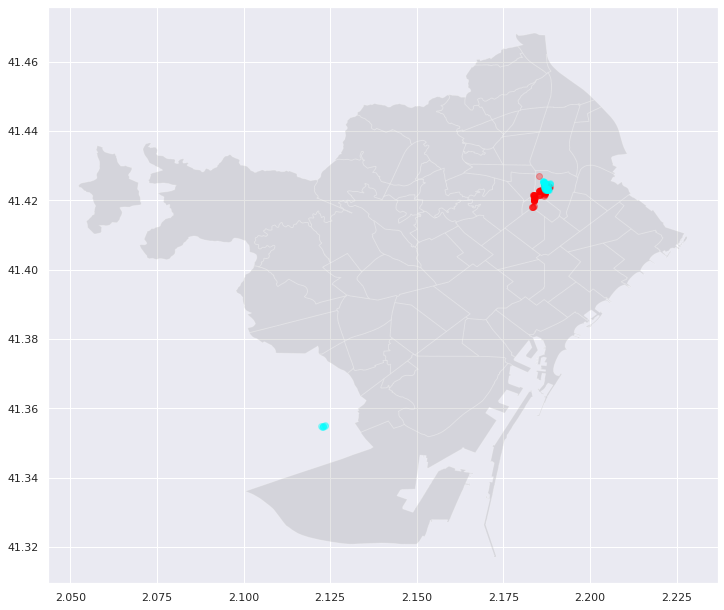

In [592]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41,42)
#ax.set_xlim(1.5,3)

df_coordinates_User_2.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_2.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 
plt.show()


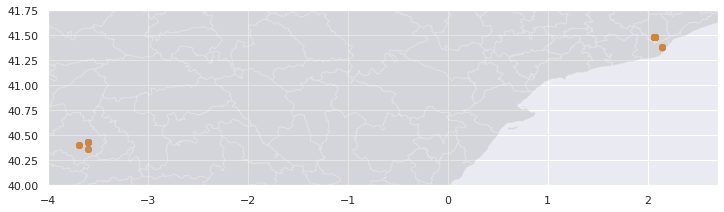

In [574]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40,41.75)
ax.set_xlim(-4,2.7)
df_coordinates_User_2.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)

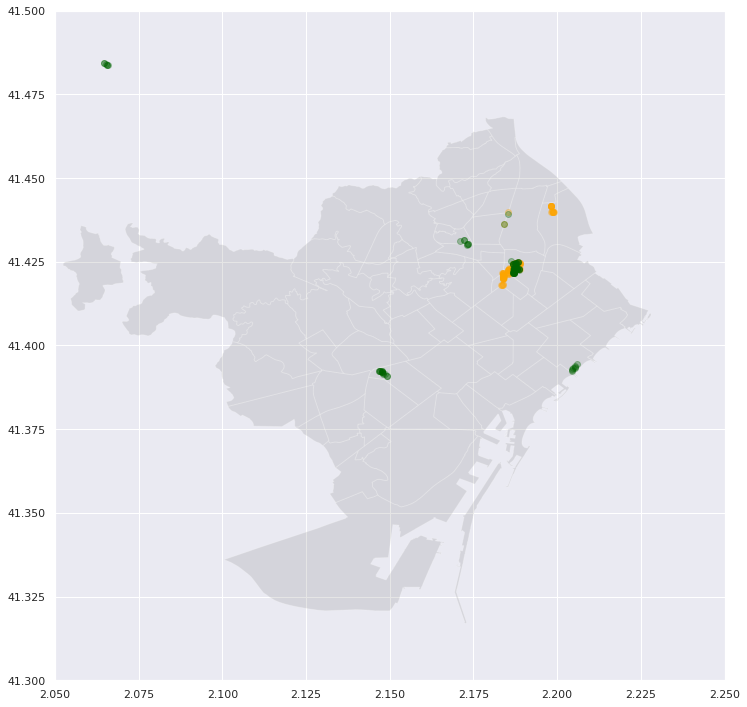

In [603]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_2.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_2.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)

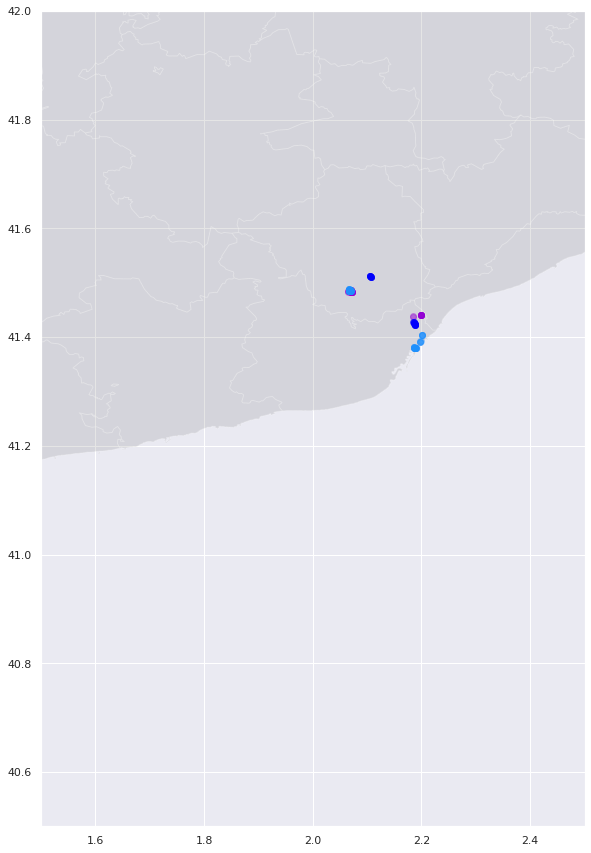

In [596]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5,42)
ax.set_xlim(1.5,2.5)
df_coordinates_User_2.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_2.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_2.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)

In [ ]:
df_coordinates_User_2 = df_coordinates[(df_coordinates['Alias']=='User_2') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5,42)
ax.set_xlim(1.5,2.5)
df_coordinates_User_2.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_2.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_2.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_2.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_2.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_2.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_2.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_2.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Notas:

26 de Mayo viaja en tren desde Barcelona hasta Valencia tras confirmarlo incluyendo la categoria de insufficient data. Además de mostrar un punto del tren en Barcelona y otro en Madrid entre el 2 y el 4 de Junio y agregando algunos puntos más con insufficient_data pero sin demasiada data para confirmarlo pero se puede asumir tren AVE (Barcelona a Madrid). 

Ida de Barcelona a Valencia (nuevamente) en coche el día 8 de Mayo. Además utiliza el coche para ir a la costa Brava la semana del 10 al 16 de Junio. Se puede observar que utiliza frecuentemente el coche dentro de la ciudad y el recorrido entre Barcelona y Sant Cugat del Valles (probablemente recorrido de casa al trabajo).

Se puede confirmar con las caminatas que la persona vive alrededor de Sant Andreu. Además, el User_2 tiene en varias ocasiones caminatas por Terrasa y Sabadell (posiblemente a las montañas).

#### User_3

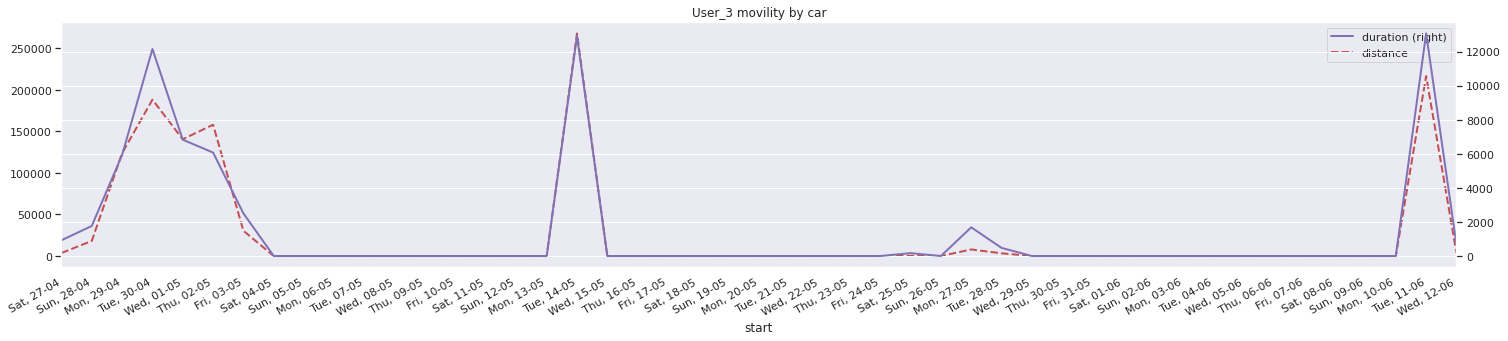

In [90]:
User_3 = df_dates[df_dates['Alias']=='User_3'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_3.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_3 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

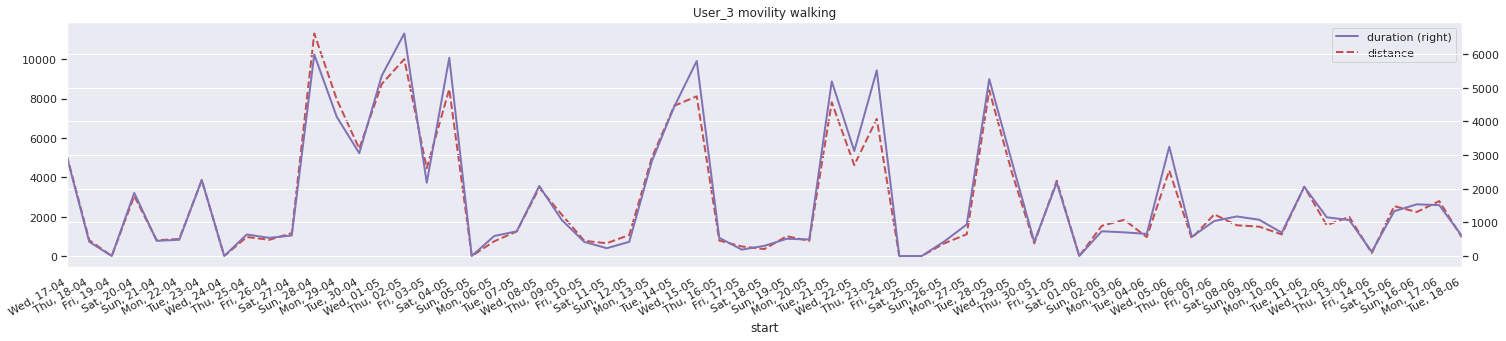

In [91]:
User_3 = df_dates[df_dates['Alias']=='User_3'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_3.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_3 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

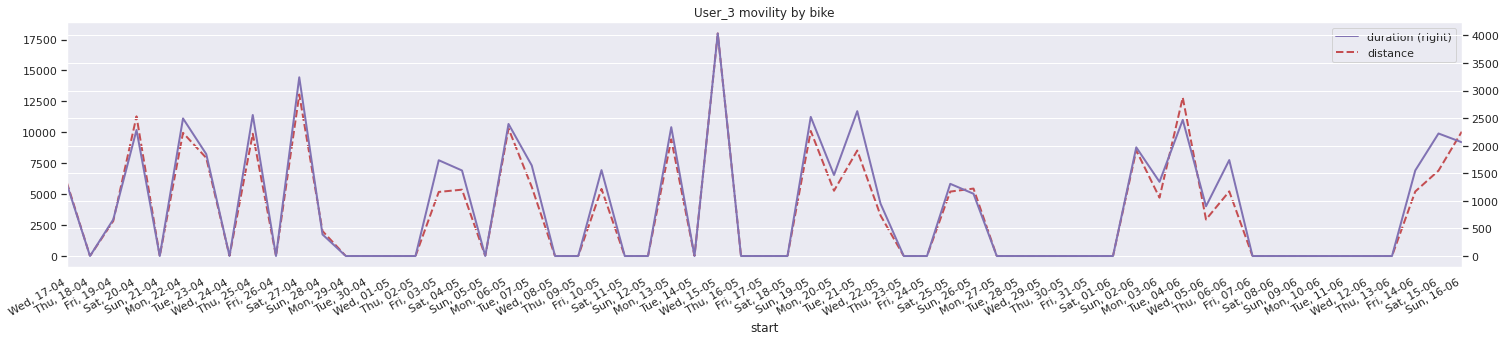

In [92]:
User_3 = df_dates[df_dates['Alias']=='User_3'].groupby('mode').resample('D').sum()

fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_3.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_3 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>El User_3 basado en el análisis previo, se observa pertinente a analizar movilidad en coche, en bicileta y caminando como principales fuentes de análisis, y una observación a un vuelo realizado el 29-04 y retorno 04-05.</p> 

<p>El período más largo del uso del coche coincide con el perído en el que toma el vuelo. Lo cuál puede indicar que el User_3 uso el coche por vacaciones o trabajo pero que usualmente no es su medio de movilidad. Además, coincide con el uso del bus el 02-05 que representa el menor uso del coche y un uso además que coincide con el del vuelo. Y dos usos espóradicos que coinciden con, el primero, un siguiente día un pico alto de uso de la bicicleta, y el 2do, un pico medio de dos días de caminata. Concluyendo que la persona no posee coche y solo lo usa esporádicamente en situaciones excepcionales (vacaciones o algún viaje).</p>

<p>En cuanto a la caminata, los picos más altos coinciden el período del viaje por avión. Además coincide con la caminata mayormente entre semana y un decenso de Viernes a Lunes con algunas excepciones de fin de semanas pero sin representar demasiado en comparación con los dentro de la semana.</p>

<p>El uso de la bicicleta es discontinuo, y los picos son muy similares por lo cual indica que es una distancia y tiempo similar (las coordenadas indican varios viajes en coordenadas muy cercanas en tramos de tiempo cortos, a verificar con visulizacion de geo-spatial data). Los períodos nulos del uso de la bicicleta coinciden con el uso del coche. Excepto por una ocasión de uno de los picos más alto que es justamente después del uso del coche.</p>

<p>Concluyendo que el uso combinado de bicicleta y la caminata son los medios de transporte mayormente usados por el User_3.</p>


#### Maps

In [24]:
 df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='flight')]

geometry   Alias    Mode   WeekDay
timestamp                                                                     
2021-05-04 07:07:42+02:00  POINT (-5.89753 37.42417)  User_3  flight   Tuesday
2021-05-04 08:31:27+02:00   POINT (2.07242 41.28824)  User_3  flight   Tuesday
2021-04-29 09:06:05+02:00   POINT (2.07601 41.28787)  User_3  flight  Thursday
2021-04-29 10:39:40+02:00  POINT (-5.89574 37.42230)  User_3  flight  Thursday

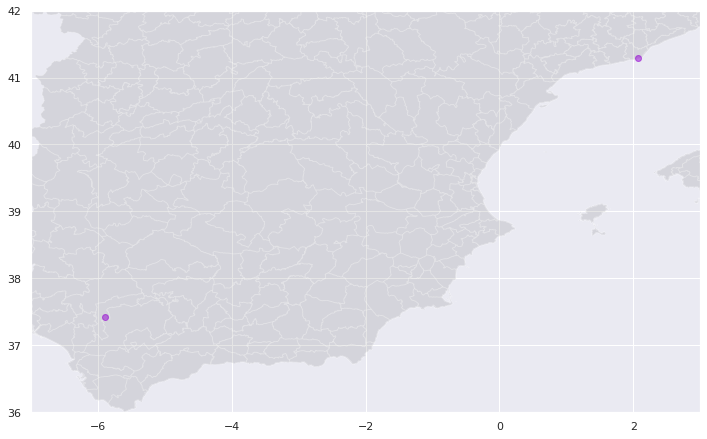

In [23]:
df_coordinates_User_3_f = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='flight')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(36,42)
ax.set_xlim(-7,3)
df_coordinates_User_3_f.plot(ax=Spain, color='darkviolet', alpha=0.3) 

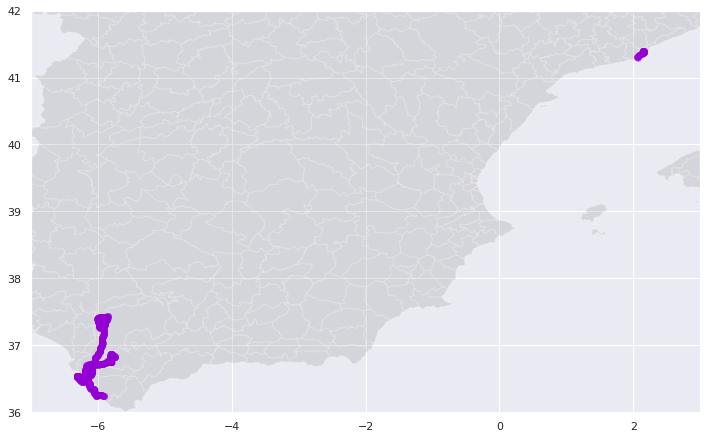

In [26]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(36,42)
ax.set_xlim(-7,3)
df_coordinates_User_3.loc['2021-04-29':'2021-05-04'].plot(ax=Spain, color='darkviolet', alpha=0.3)
#df_coordinates_User_2.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
#df_coordinates_User_2.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)

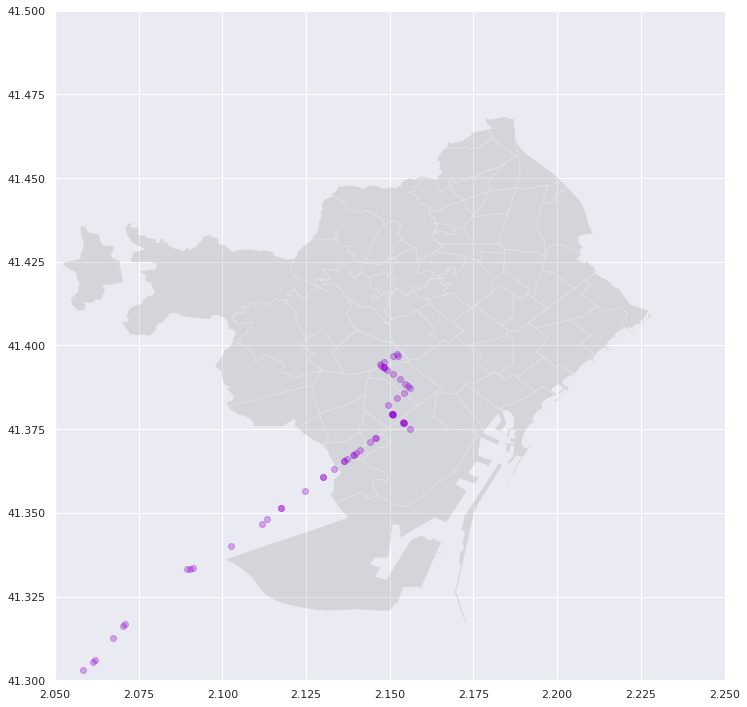

In [44]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_3.loc['2021-05-04':'2021-05-04'].plot(ax=Spain, color='darkviolet', alpha=0.3)

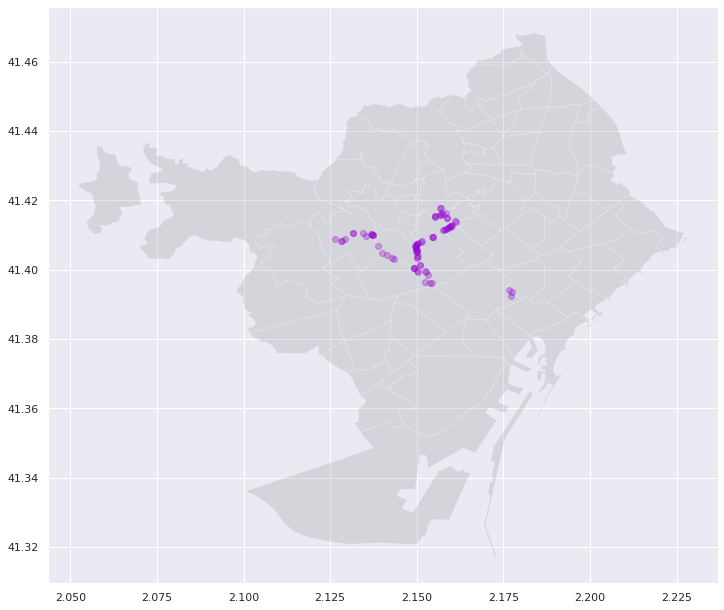

In [36]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
df_coordinates_User_3.loc['2021-05-25':'2021-05-29'].plot(ax=Spain, color='darkviolet', alpha=0.3)


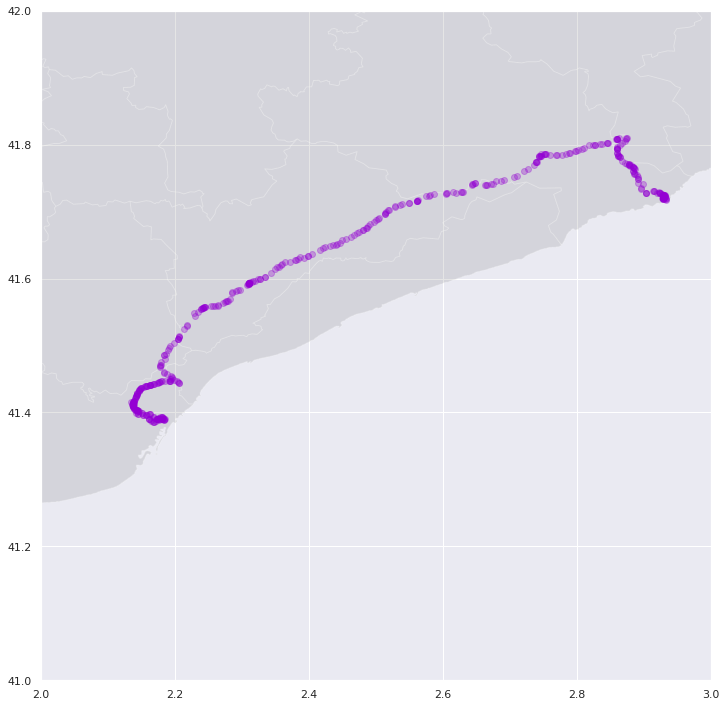

In [39]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 42)
ax.set_xlim(2,3)
df_coordinates_User_3.loc['2021-06-10':'2021-06-15'].plot(ax=Spain, color='darkviolet', alpha=0.3)

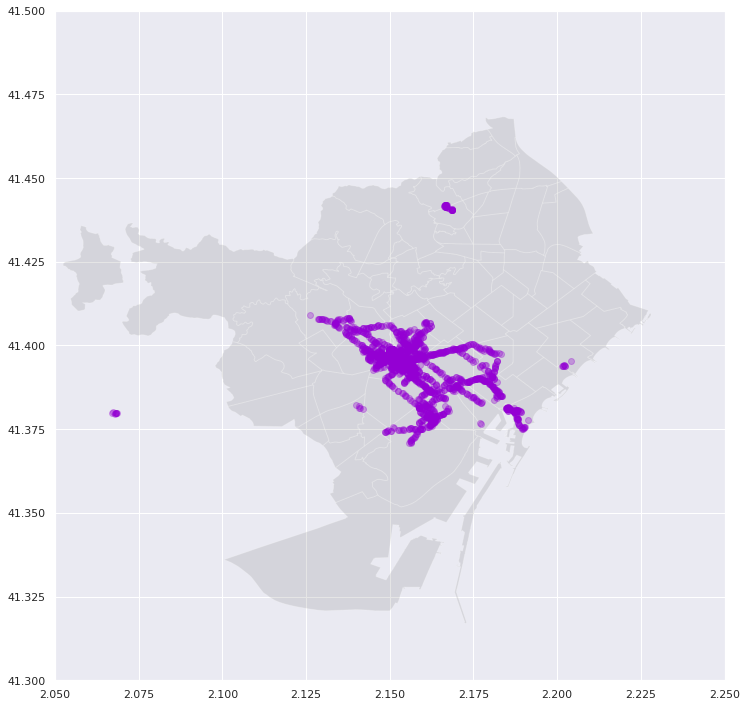

In [45]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(2,3)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_3.plot(ax=Spain, color='darkviolet', alpha=0.3)

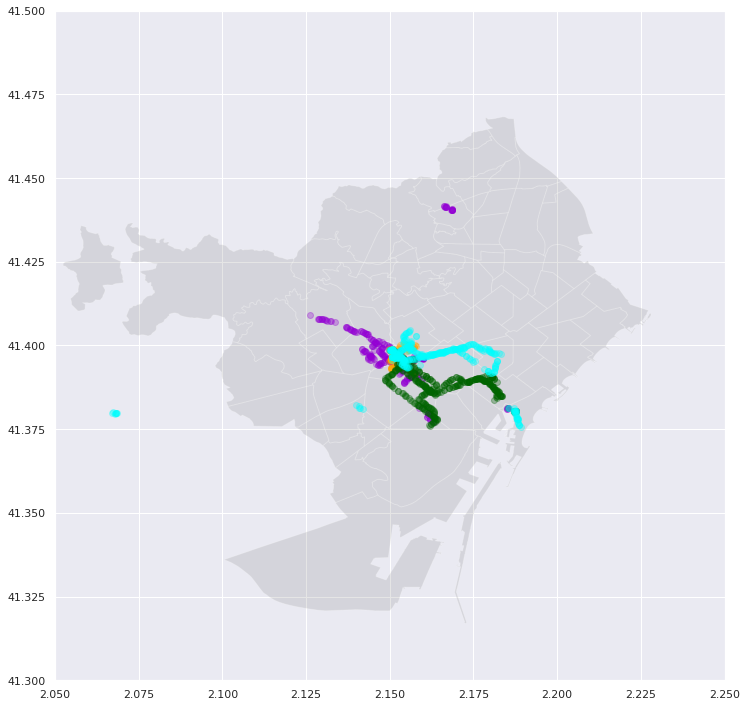

In [59]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(1.8,3)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_3.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
#df_coordinates_User_3.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3) Tossa de Mar
df_coordinates_User_3.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #Sant Gervassi
df_coordinates_User_3.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
#df_coordinates_User_3.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #None
#df_coordinates_User_3.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) Sevilla y Cadiz
df_coordinates_User_3.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

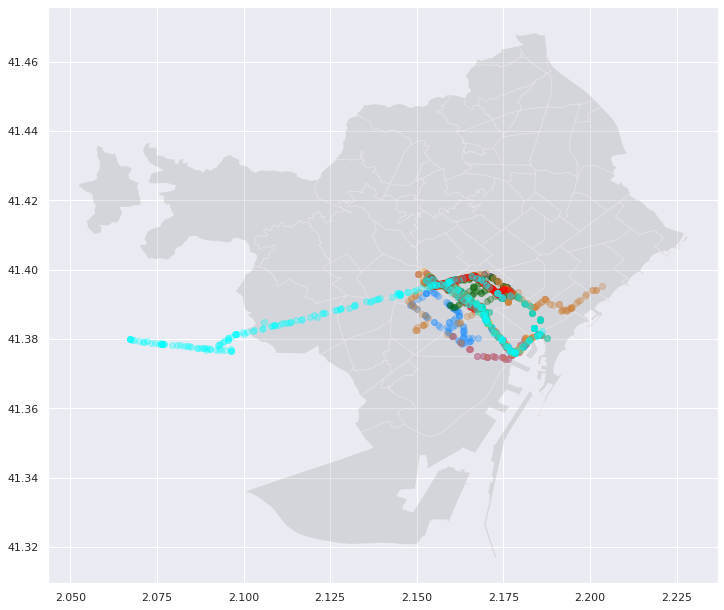

In [63]:
df_coordinates_User_3 = df_coordinates[(df_coordinates['Alias']=='User_3') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(1.8,3)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
#df_coordinates_User_3.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_3.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_3.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3) #Tossa de Mar
df_coordinates_User_3.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #Sant Gervassi
df_coordinates_User_3.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_3.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #None
df_coordinates_User_3.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #Sevilla y Cadiz
df_coordinates_User_3.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

El User_3 se confirma que toma un vuelo a Sevilla el 29 de Abril y retorna a Barcelona el día 4 de Mayo. Durante ese período se verifica el uso del coche activamente para ir desde Sevilla hasta Cadiz con varias paradas el 30 de Abril y finalmente llegando a destino el 1 de Mayo. El usuario retorna el dia 3 de Mayo a Sevilla directo al aeropuerto para retornar el 4 a Barcelona.
Viaje en coche a Tossa de Mar entre el 10 y el 14 de Junio.

Basado en el área que que normalmente camina y la zona donde volvió luego del vuelo, el User_3 debe vivir por Sant Gervasi. Además, el usuario frecuenta la zona de La Rive o el Gotico.

El usuario frecuenta el uso de la bicicleta. La zonas que frecuenta normalmente son Eixample, Sant Gervasi y el Gotico/Born. Además tiene un recorrido más largo en hacia Espluges el Domingo 19 de Mayo.

#### User_4

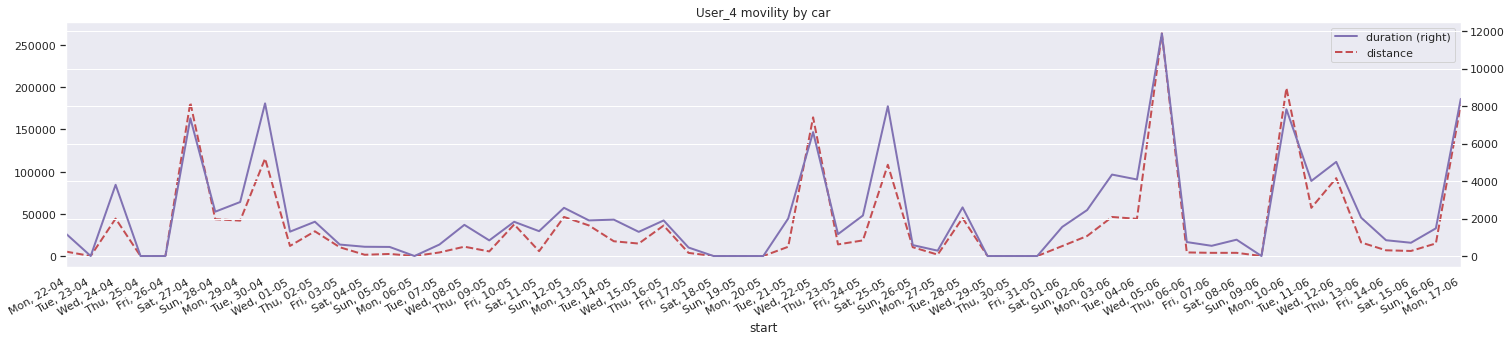

In [151]:
User_4 = df_dates[df_dates['Alias']=='User_4'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_4.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_4 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

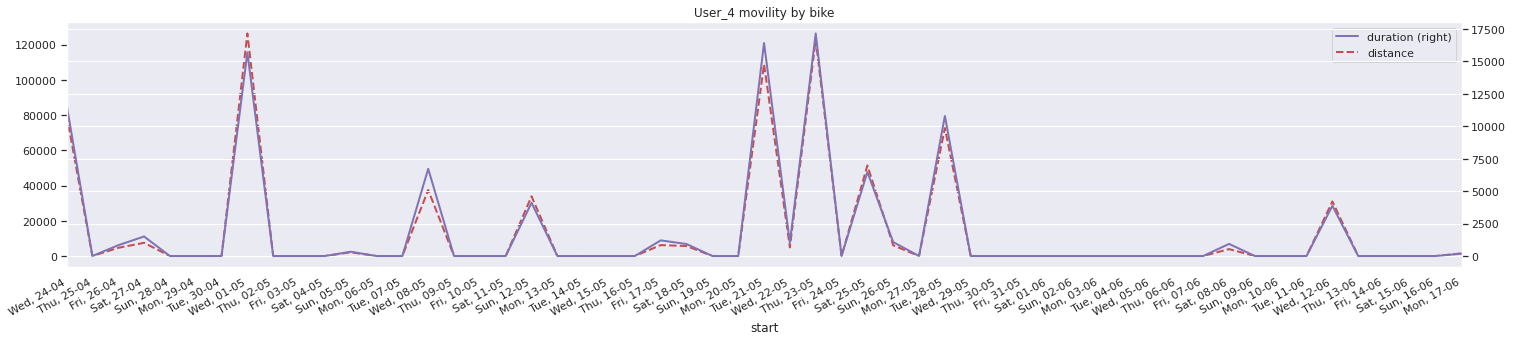

In [154]:
User_4 = df_dates[df_dates['Alias']=='User_4'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_4.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_4 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

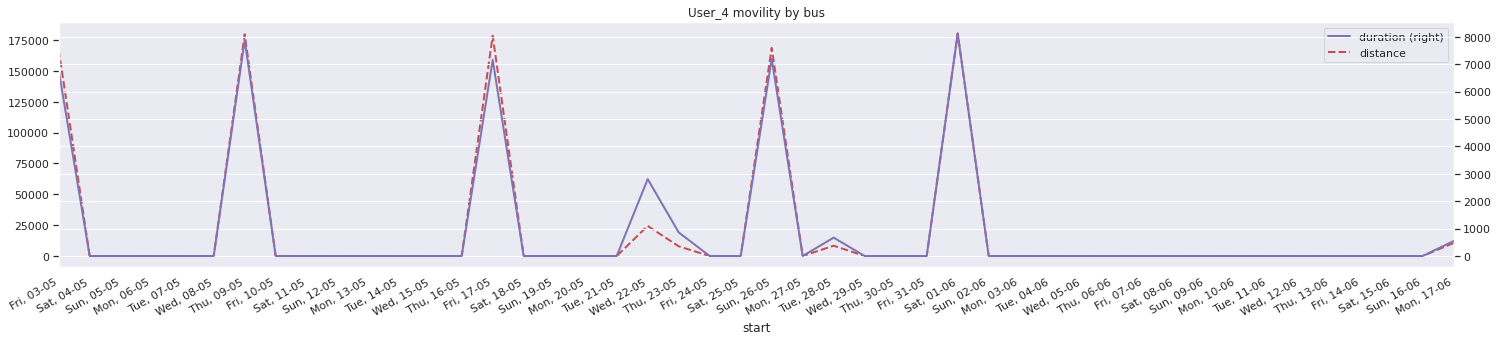

In [153]:
User_4 = df_dates[df_dates['Alias']=='User_4'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_4.loc['bus'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_4 movility by bus')

plt.gcf().autofmt_xdate()
plt.show()

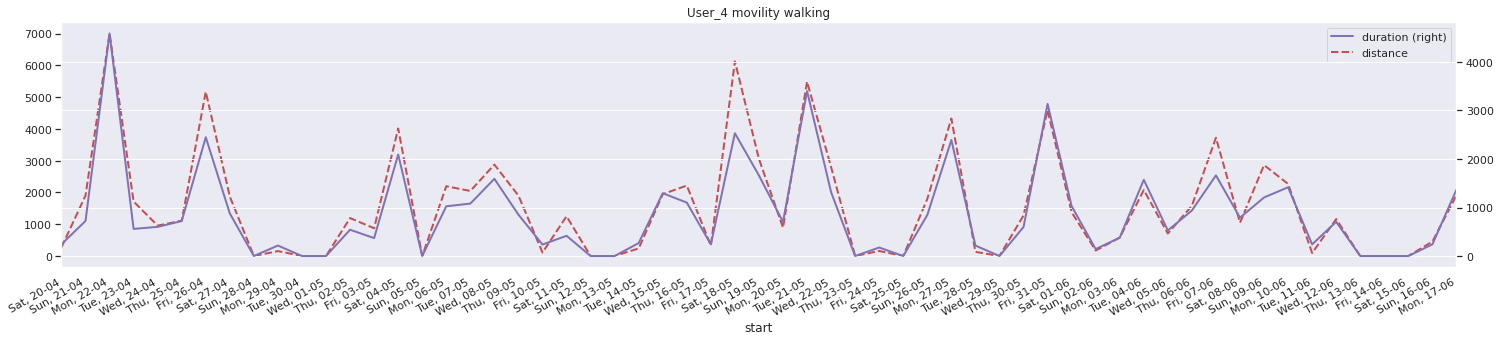

In [156]:
User_4 = df_dates[df_dates['Alias']=='User_4'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_4.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_4 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>En cuanto al User_4 tiene de preferencia el uso del coche en timepo y distancia.La movilidad en el bus se reserva a un uso semanal de largas distancias que coincide con el poco o nulo uso del coche. Ciertas locaciones de preferencia se usa el bus que se puede verificar si son las mismas observando la data geo-espacial.</p>

<p>La bicicleta es una medio de movilidad que no lo usa continuamente. Tiene usos esporádicos específicos que no siguen ningún patrón, ya que no coinciden con el uso del bus y con el uso del coche es variado aunque no coinciden con los picos más altos de uso del coche.</p>

<p>EL User_4 no es muy asiduo a la caminata, es una movilidad complementario al uso de los otros medios de transporte que usa más continuamente. Pero coince el uso del bus con muy poca caminata y coinciden poco con los picos de uso de la bicileta.</p>


#### Maps

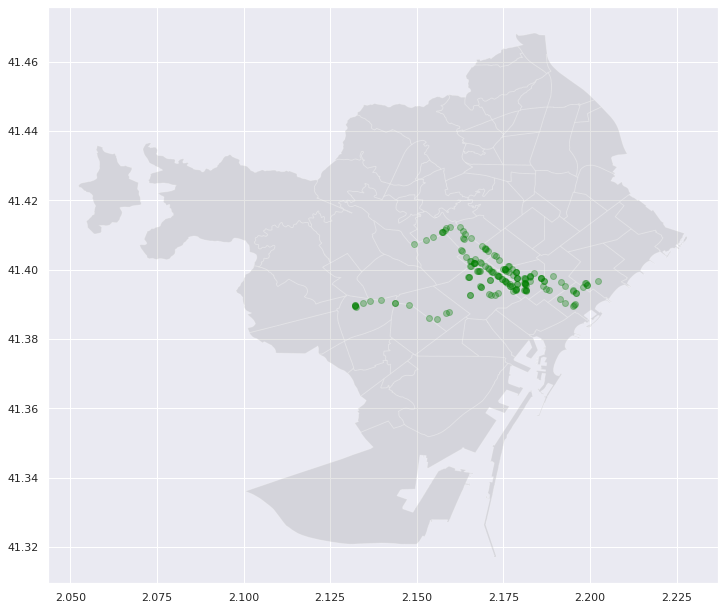

In [110]:
df_coordinates_User_4 = df_coordinates[(df_coordinates['Alias']=='User_4') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
df_coordinates_User_4.loc['2021-05-05':'2021-05-10'].plot(ax=Spain, color='green', alpha=0.3) # Por Barcelona

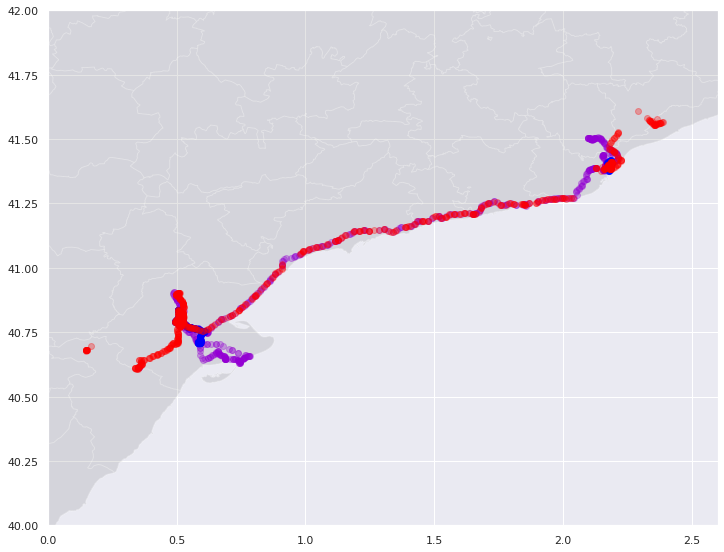

In [123]:
df_coordinates_User_4 = df_coordinates[(df_coordinates['Alias']=='User_4') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
ax.set_ylim(40,42)
ax.set_xlim(0,2.6)
df_coordinates_User_4.loc[:'2021-05-04'].plot(ax=Spain, color='darkviolet', alpha=0.3) # 5 de Mayo vuelve a Barcelona de Tortosa, del 28 Abril al 4 de Mayo en Tortosa
df_coordinates_User_4.loc['2021-05-11':'2021-05-22'].plot(ax=Spain, color='blue', alpha=0.3) # 11 al 22 de Mayo en Tortosa
df_coordinates_User_4.loc['2021-05-23':'2021-06-02'].plot(ax=Spain, color='red', alpha=0.3)#23 de Mayo va a Tortosa y retorna el 28 de Mayo a Barcelona 28 al 2 en Barcelona


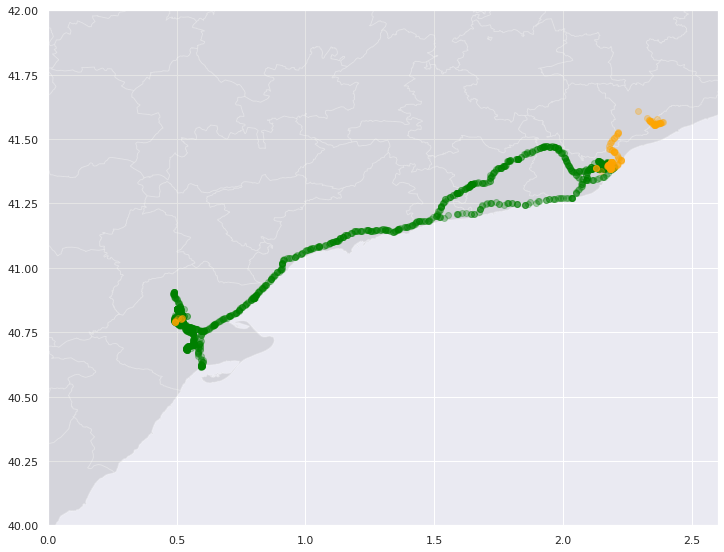

In [126]:
df_coordinates_User_4 = df_coordinates[(df_coordinates['Alias']=='User_4') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40,42)
ax.set_xlim(0,2.6)
df_coordinates_User_4.loc['2021-06-03':].plot(ax=Spain, color='green', alpha=0.3) #Tortosa del 2 al 7 de Junio
df_coordinates_User_4.loc['2021-05-28':'2021-06-02'].plot(ax=Spain, color='orange', alpha=0.3) # 28 al 2 en Barcelona

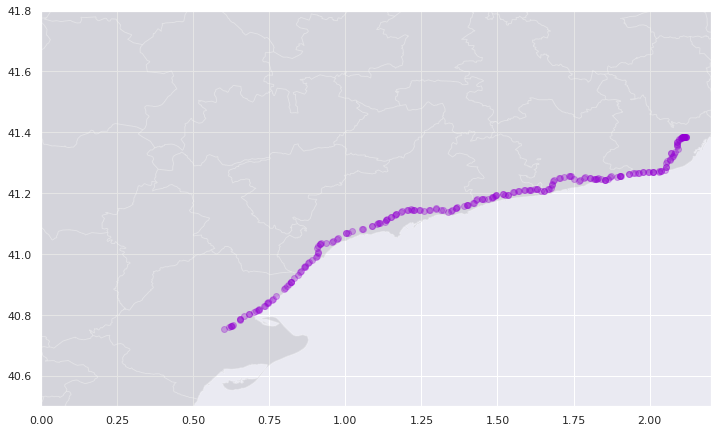

In [152]:
df_coordinates_User_4 = df_coordinates[(df_coordinates['Alias']=='User_4') & (df_coordinates['Mode']=='bus')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5, 41.8)
ax.set_xlim(0,2.2)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
#df_coordinates_User_3.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_4.loc['2021-05-02':'2021-05-04'].plot(ax=Spain, color='darkviolet', alpha=0.3) # de Tortosa a Barcelona 4
df_coordinates_User_4.loc['2021-05-16':'2021-05-19'].plot(ax=Spain, color='dodgerblue', alpha=0.3) # Tortosa a Barcelona 18
df_coordinates_User_4.loc['2021-05-08':'2021-05-10'].plot(ax=Spain, color='orange', alpha=0.3) # Barcelona a Tortosa 10
df_coordinates_User_4.loc['2021-05-21':'2021-05-24'].plot(ax=Spain, color='darkgreen', alpha=0.3) # Barcelona a Tortosa 23
df_coordinates_User_4.loc['2021-05-25':'2021-05-29'].plot(ax=Spain, color='peru', alpha=0.3) # Tortosa a Barcelona 29
df_coordinates_User_4.loc['2021-05-31':'2021-06-03'].plot(ax=Spain, color='cyan', alpha=0.3) # Barcelona. a Tortosa el 2 Junio

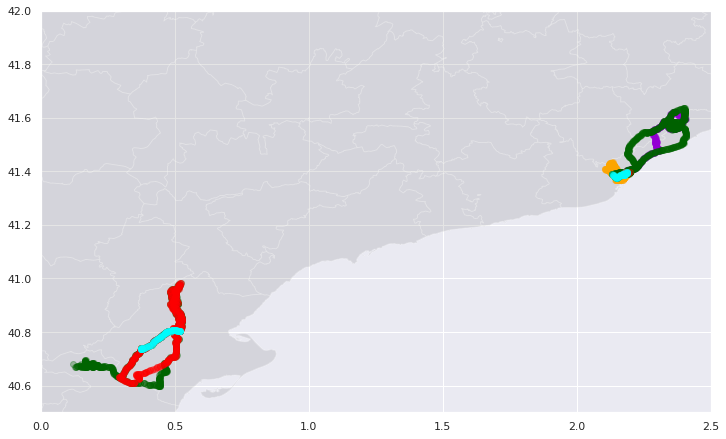

In [165]:
df_coordinates_User_4 = df_coordinates[(df_coordinates['Alias']=='User_4') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5, 42)
ax.set_xlim(0,2.5)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
#df_coordinates_User_4.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_4.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_4.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3) #Tossa de Mar
df_coordinates_User_4.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #Sant Gervassi
df_coordinates_User_4.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_4.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #None
df_coordinates_User_4.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #Sevilla y Cadiz
df_coordinates_User_4.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

User_4 frecuenta ir a Tortosa desde Barcelona en coche y combinado con el bus. Lo hace rutinariamente todas las semanas dentro del periodo del dataset. Del 28 de Abril se va a Tortosa en coche y el 4 de Mayo retorna en bus. Vuelve a ir a Tortosa el 10 de Mayo en bus y retorna el 18. De Barcelona a Tortosa el 23 de Mayo y vuelve en bus el 29 y vuelve en bus el 2 de Junio y el 7 retorna a Barcelona en coche. 

El User_4 usa la bicicleta con frecuencia alternando rutas en Tarragona y otras rutas desde Barcelona al Maresme.



#### User_5

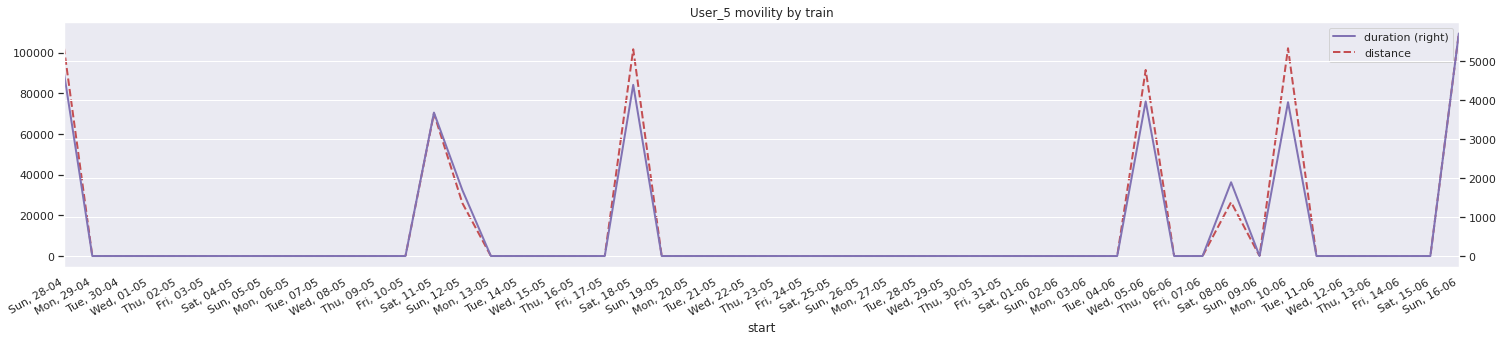

In [171]:
User_5 = df_dates[df_dates['Alias']=='User_5'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_5.loc['train'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_5 movility by train')

plt.gcf().autofmt_xdate()
plt.show()

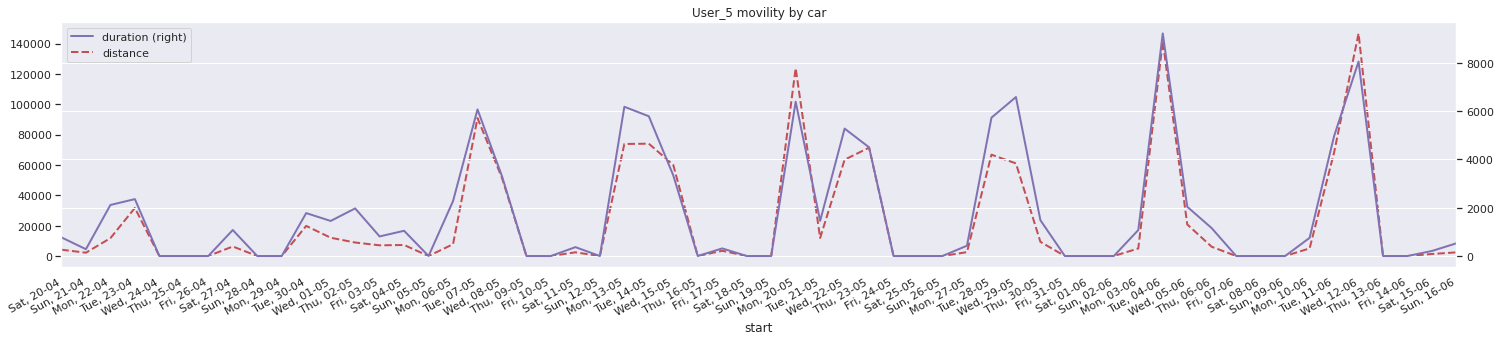

In [170]:
User_5 = df_dates[df_dates['Alias']=='User_5'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_5.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_5 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

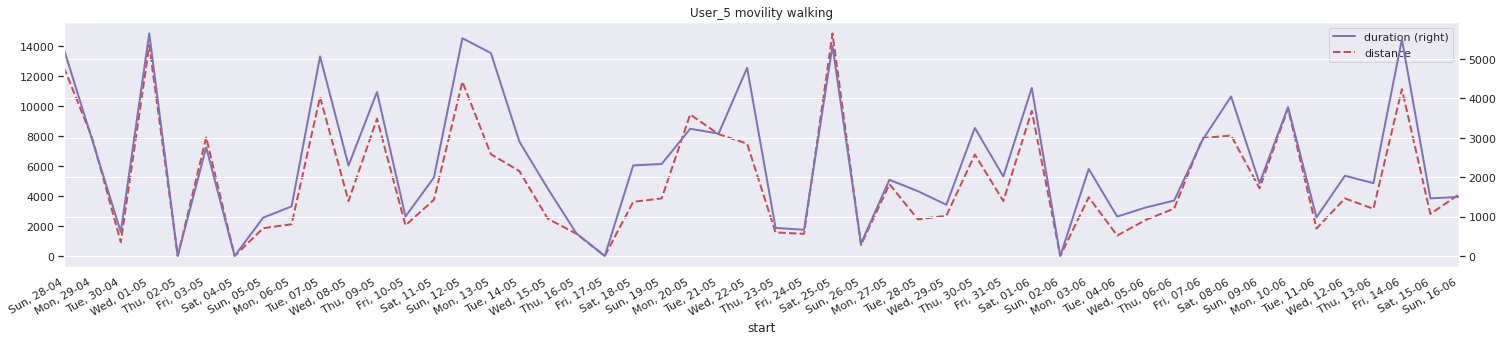

In [173]:
User_5 = df_dates[df_dates['Alias']=='User_5'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_5.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_5 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>User_5 tiene como medio de transporte más común el uso del coche. Siendo su medio de movilidad entre semana y reduciendo el úso drásticamente el fin de semana. Ciertamente hay un pequeño perído dentro de la primera semana de data de abril que el coche se utiliza media semana y sin sin cubrir tanta distancia como en las posteriores semanas.</p>

<p>El uso del tren es mayormente durante fin de semana pero tiene en el rango de una semana del 04-06 al 11-06 que utiliza el tren hasta en 3 ocaciones (Miércoles, Sábado y Lunes). Siendo el Miércoles y Lunes los picos altos. Un patrón poco normal a comparación de los anteriores. Esto coincide con el nulo uso del coche durante esa semana.</p>

<p>En cuanto a caminar, muchos picos altos vienen luego de tomar el tren o en cuándo el uso del coche es muy bajo. Por lo cuál los números suben y bajan continuamente, pero User_5 pasa un tiempo considerable caminando en relación a los otros modos de movilidad. Muy pocos días que tiene nulo recorrido caminando. </p>

#### Maps

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


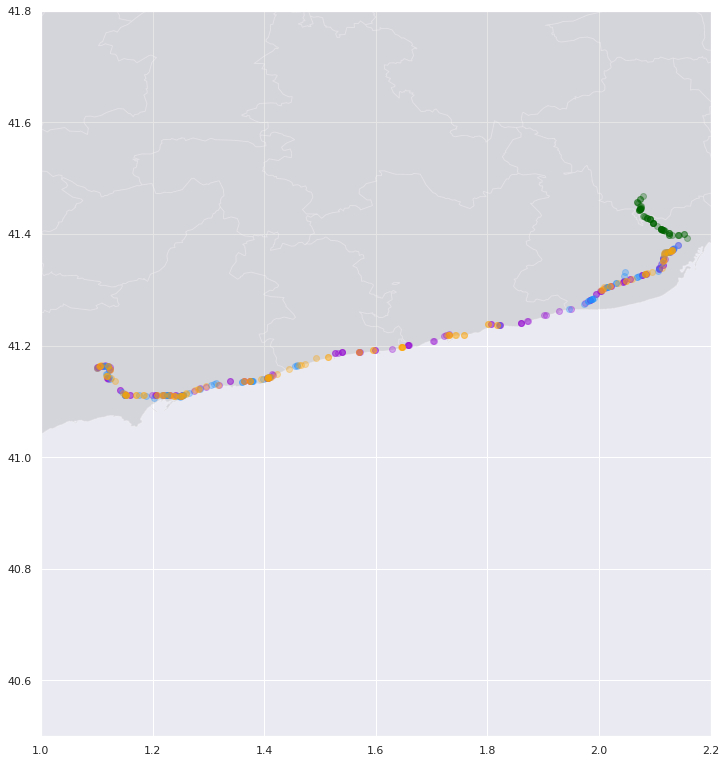

In [167]:
df_coordinates_User_5 = df_coordinates[(df_coordinates['Alias']=='User_5') & (df_coordinates['Mode']=='train')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5, 41.8)
ax.set_xlim(1,2.2)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
#df_coordinates_User_3.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_5.loc[:'2021-04-29'].plot(ax=Spain, color='darkviolet', alpha=0.3)  # Reus 29
df_coordinates_User_5.loc['2021-05-10':'2021-05-12'].plot(ax=Spain, color='dodgerblue', alpha=0.3) # 12 Tarragona
df_coordinates_User_5.loc['2021-05-17':'2021-05-19'].plot(ax=Spain, color='orange', alpha=0.3) # 19 Sitges 
df_coordinates_User_5.loc['2021-06-07':'2021-06-09'].plot(ax=Spain, color='darkgreen', alpha=0.3) # Sant Cugat/Rubi
df_coordinates_User_5.loc['2021-06-10':'2021-06-12'].plot(ax=Spain, color='peru', alpha=0.3) #Tarragona 11 J


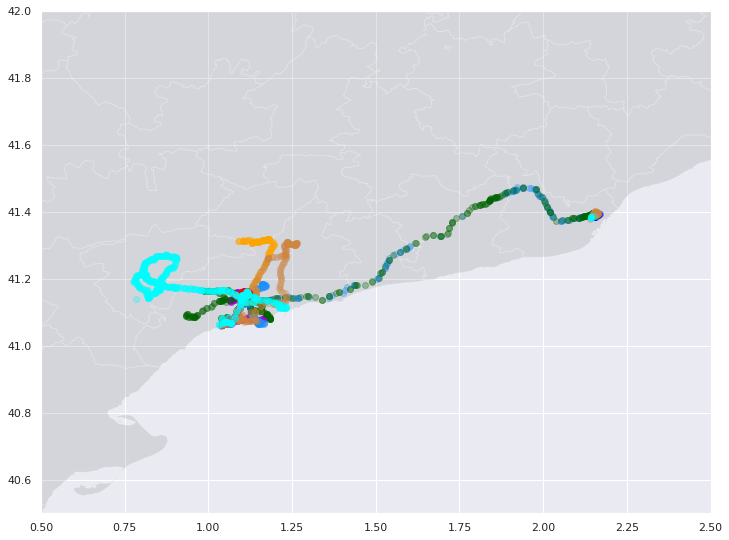

In [184]:
df_coordinates_User_5 = df_coordinates[(df_coordinates['Alias']=='User_5') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5, 42)
ax.set_xlim(0.5,2.5)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
#df_coordinates_User_4.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_5.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_5.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_5.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_5.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_5.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_5.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_5.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_5.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

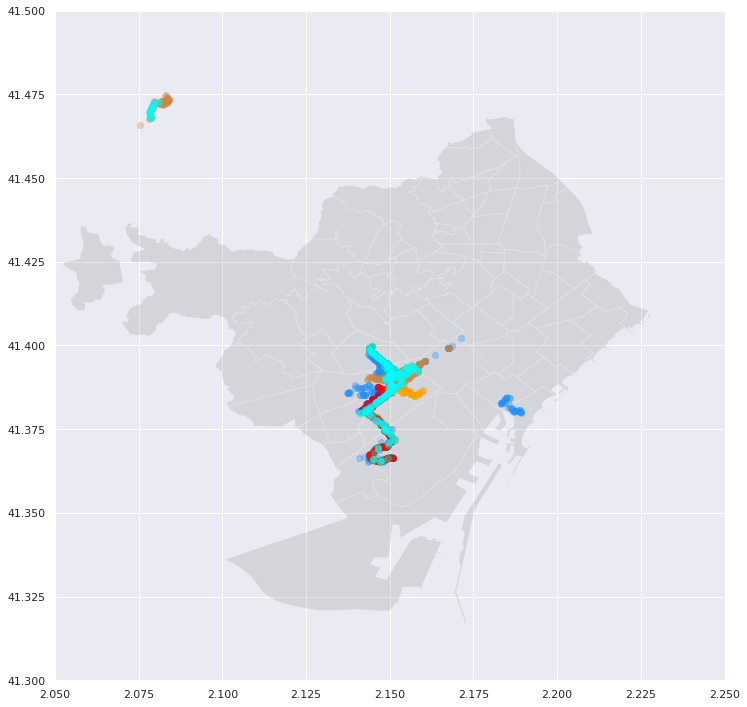

In [189]:
df_coordinates_User_5 = df_coordinates[(df_coordinates['Alias']=='User_5') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_5.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_5.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_5.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_5.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_5.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_5.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_5.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_5.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

User_5 frecuenta el uso del tren especialmente para ir de Barcelona a Tarragona como tambien cubre el recorrido en coche Barcelona-Tarragona. Entre el 13 de Mayo y el 20 de Mayo llegoando hasta Lleida en coche o por la zona de Montblanc de Tarragona. Todas las semanas tiene un recorrido desde Barcelona hasta la zona de Tarragona en coche sin tener un día específico de la semana.

Analizando el modo de movilidad caminata, se observa recorridos por las zonas de Tarragona y Lleida que frecuenta. Además, dentro del Barcelona se concentra mucha de las caminatas dentro de la Zona de Eixample y en dirección a Montjuic.



#### User_6

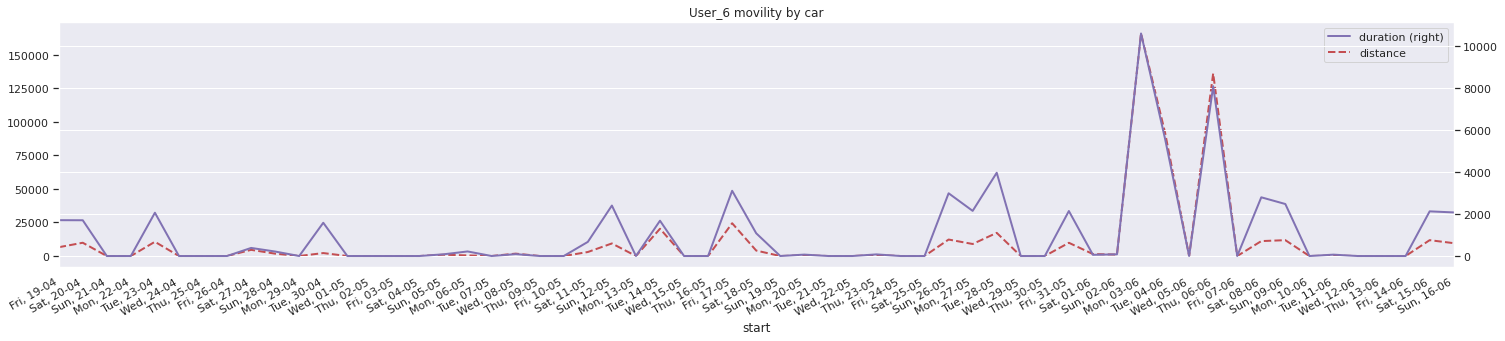

In [193]:
User_6 = df_dates[df_dates['Alias']=='User_6'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_6.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_6 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

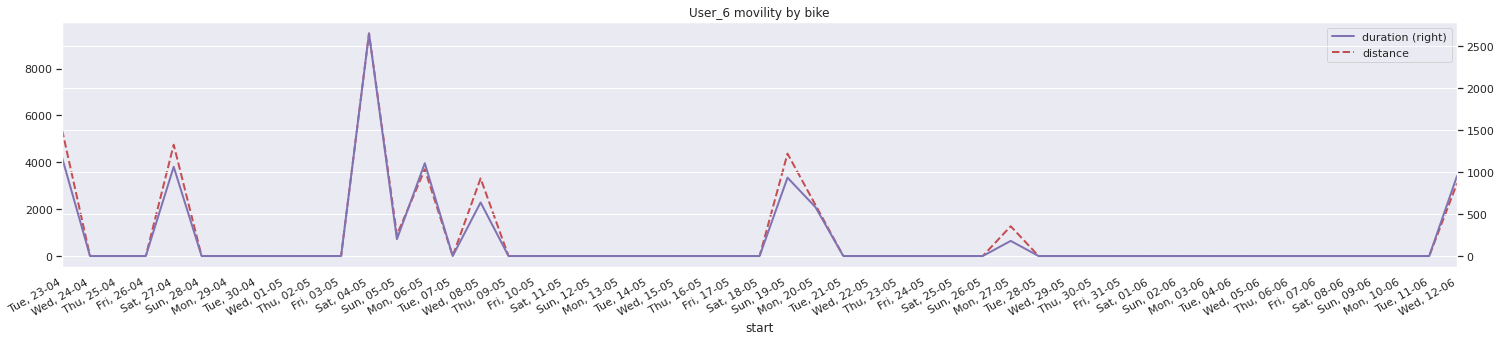

In [195]:
User_6 = df_dates[df_dates['Alias']=='User_6'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_6.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_6 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

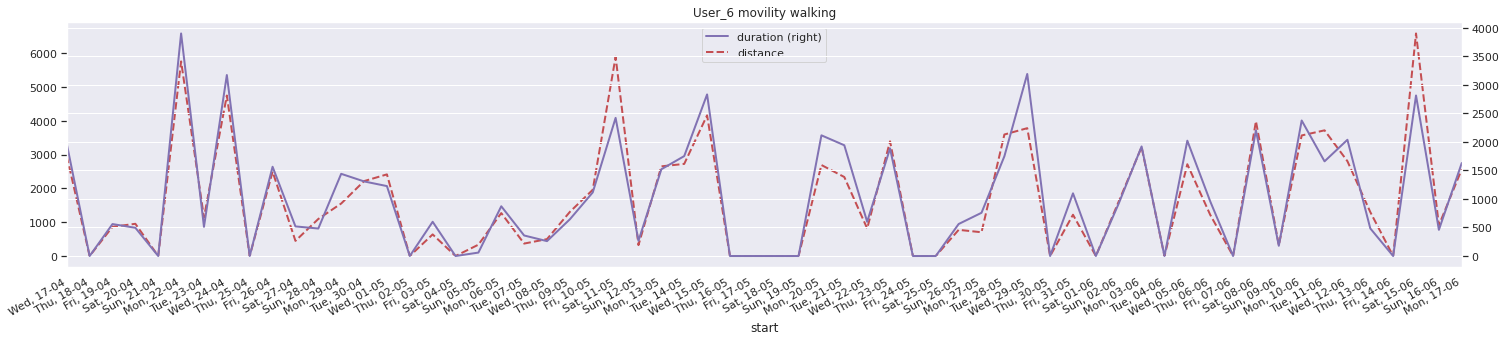

In [196]:
User_6 = df_dates[df_dates['Alias']=='User_6'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_6.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_6 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>User_6 toma el bus el 06-05, 07-05 y el 16-05. Muy esporádico asique no es algo que use seguido y además en días que toma el bus no son distancias largas ni de larg duración. Otro punto a tomar en cuenta es que esos días coincidentemente no utiliza el coche. Y las caminatas están por debajo del promedio de distancia del User_6. Con respecto a la bicicleta, tampoco hay muchas conclusiones. Muchas veces el uso coincide con el coche, pero no necesariamente. Además, el uso esporádico coincide con alguna ocasiones de larga distancia pero muy poca frecuencia.</p>

<p>El coche no puedo observar un patrón determinado. Tiene perídos de uso nulo o ninguno del coche a otros perídos de una semana que lo utiliza más. Sobre todo la semana del 03-06 al 10-06 que son los picos más altos. No es un uso continuo del coche pero si existente a posiblemente viajes espóradicos en coche (a verificar con geo-location data).</p>

<p>EL User_6 gasta bastante tiempo caminando por lo cuál es común. Hay un patrón que se repite unas cuantas veces que es poca o nulas caminatas los Viernes y Domingos (desde Abril hasta el 01 de Junio), que a patir de Junio se transforma en los Sábados en un par de ocasiones. Y como se menciono anteriormente de 16 al 21 de Mayo no existe caminata alguna además del 5 y 6 de Mayor.</p>

#### Maps

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


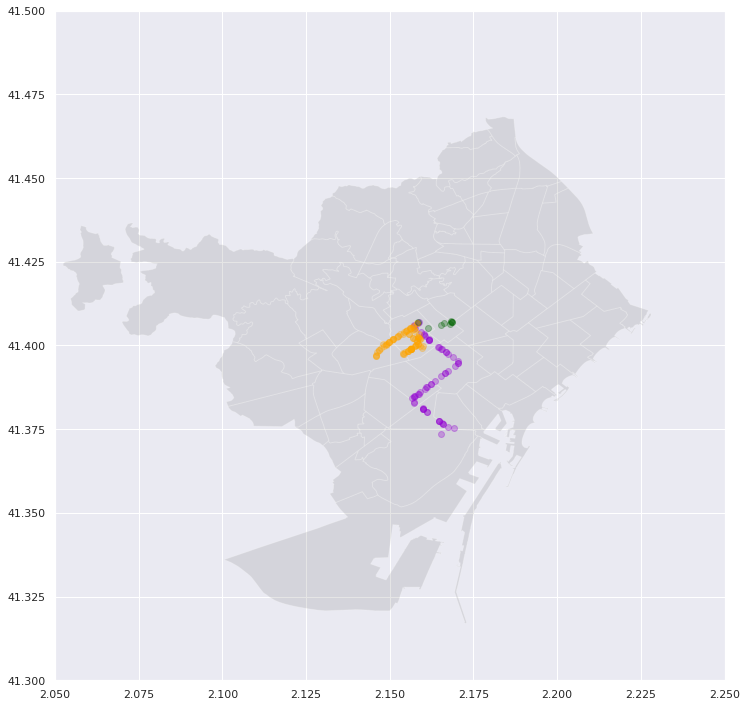

In [234]:
df_coordinates_User_6 = df_coordinates[(df_coordinates['Alias']=='User_6') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 41.8)
#ax.set_xlim(1,2.2)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_6.loc[:'2021-04-24'].plot(ax=Spain, color='darkviolet', alpha=0.3)  # 
df_coordinates_User_6.loc['2021-05-03':'2021-04-28'].plot(ax=Spain, color='dodgerblue', alpha=0.3) # 
df_coordinates_User_6.loc['2021-05-18':'2021-05-21'].plot(ax=Spain, color='orange', alpha=0.3) # 
df_coordinates_User_6.loc['2021-05-26':'2021-05-28'].plot(ax=Spain, color='darkgreen', alpha=0.3) # 



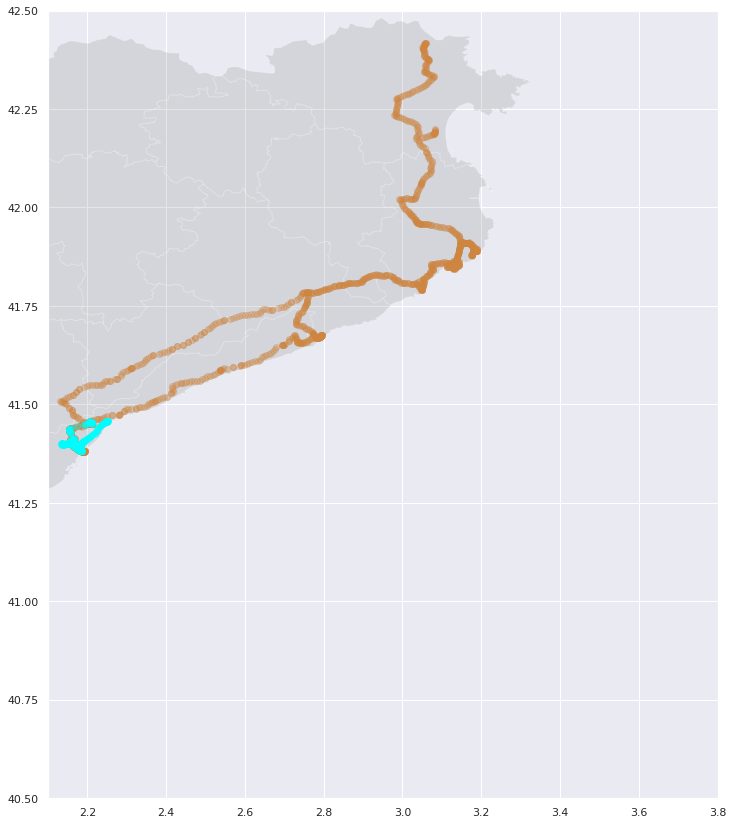

In [202]:
df_coordinates_User_6 = df_coordinates[(df_coordinates['Alias']=='User_6') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(40.5, 42.5)
ax.set_xlim(2.1,3.8)
df_coordinates_User_6.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_6.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

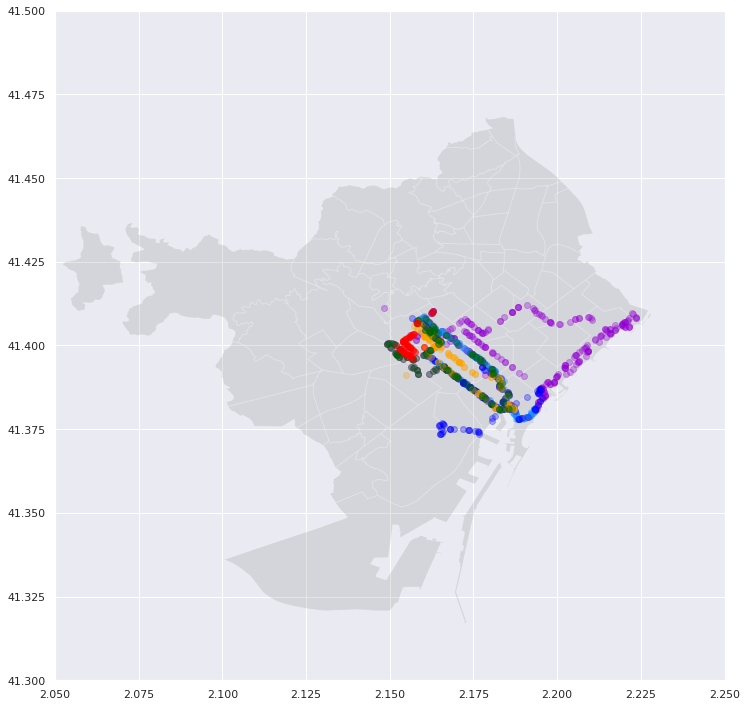

In [214]:
df_coordinates_User_6 = df_coordinates[(df_coordinates['Alias']=='User_6') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(2.1,2.4)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
#df_coordinates_User_4.plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_6.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_6.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_6.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_6.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_6.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
#df_coordinates_User_6.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_6.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
#df_coordinates_User_6.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

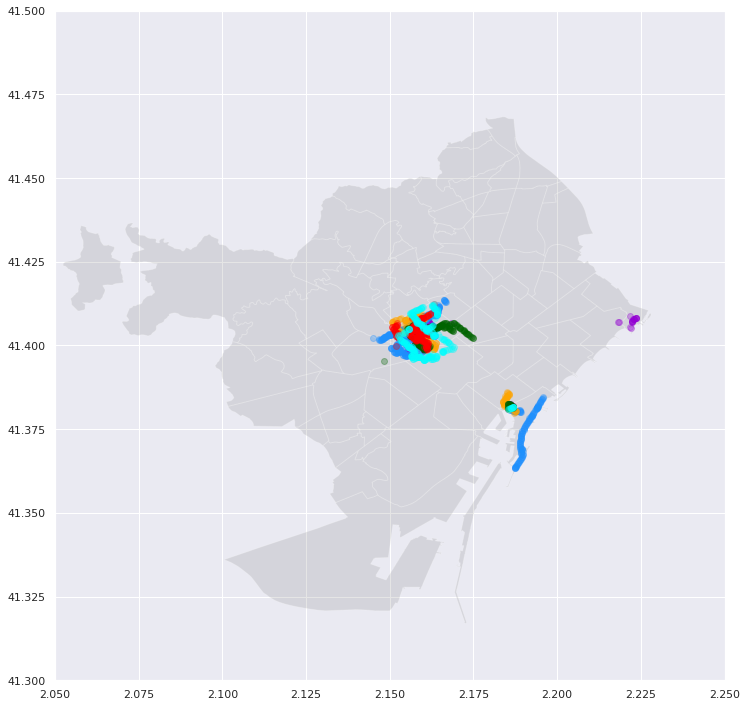

In [229]:
df_coordinates_User_6 = df_coordinates[(df_coordinates['Alias']=='User_6') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_6.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_6.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
#df_coordinates_User_6.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_6.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_6.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
#df_coordinates_User_6.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_6.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_6.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

Analizando el modo de movilidad caminata, el usuario se mueve muchas veces desde Gracia a la Barceloneta. Analizando la rutina por los dos meses del dataset y verificando las horas que se mueve por zonas se puede asumir que su vivienda se encuentra en Gracia (podría trabajar por la Barceloneta). 

User_6 frecuenta el uso del coche y la rutina coincide ciertamente con el patrón de movimiento caminando (entre Gracia y la Barceloneta). Solamente varía una  del 27 de Mayo al 3 de Junio que frecuenta Poble Nou durante esa semana. Además realiza un vaije en coche a toda la costa Brava del 3 al 10 de Junio y alguna ida inusual a Badalona del 13 al 20 de Mayo.

No frecuenta el uso de la bicicleta pero cuando la utiliza frecuenta L'Eixample y Gracia.


#### User_7

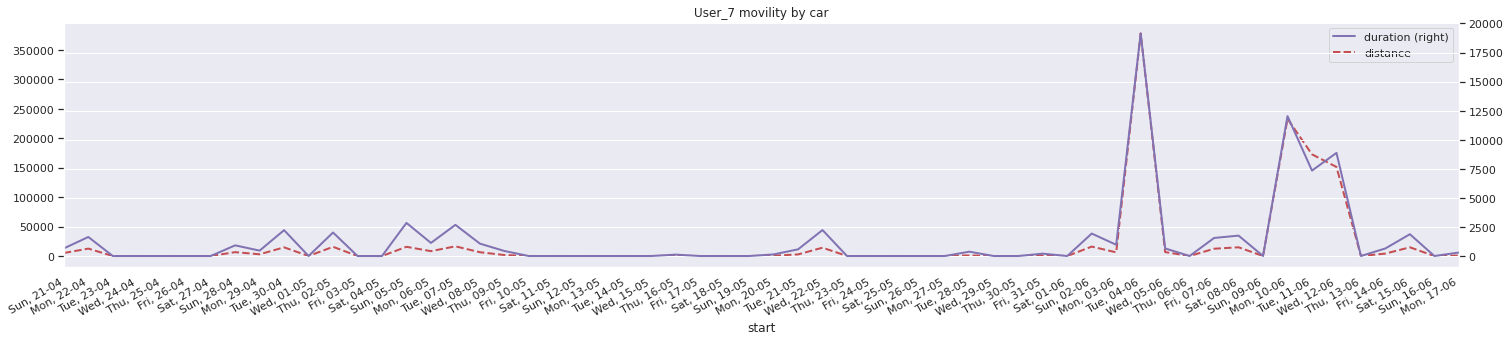

In [221]:
User_7 = df_dates[df_dates['Alias']=='User_7'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_7.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_7 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

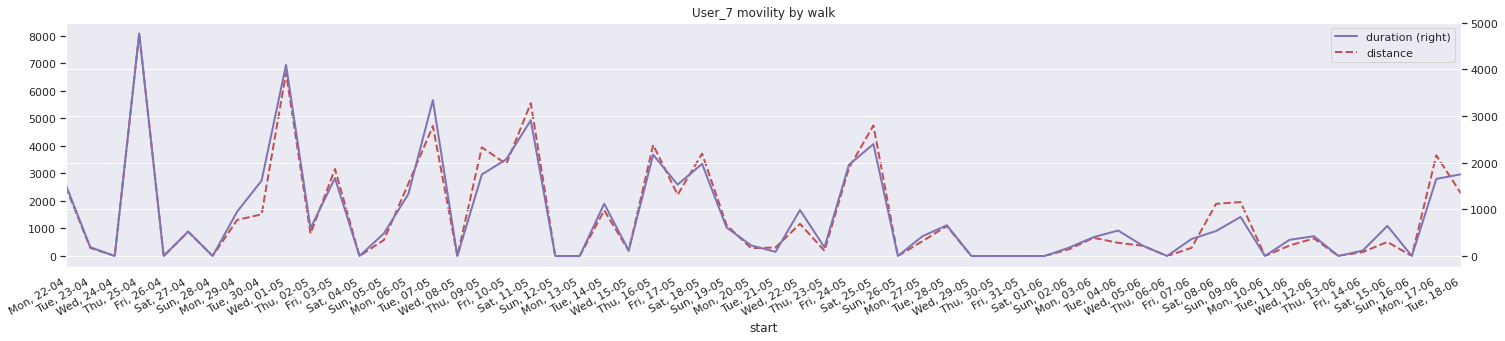

In [223]:
User_7 = df_dates[df_dates['Alias']=='User_7'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_7.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_7 movility by walk')

plt.gcf().autofmt_xdate()
plt.show()

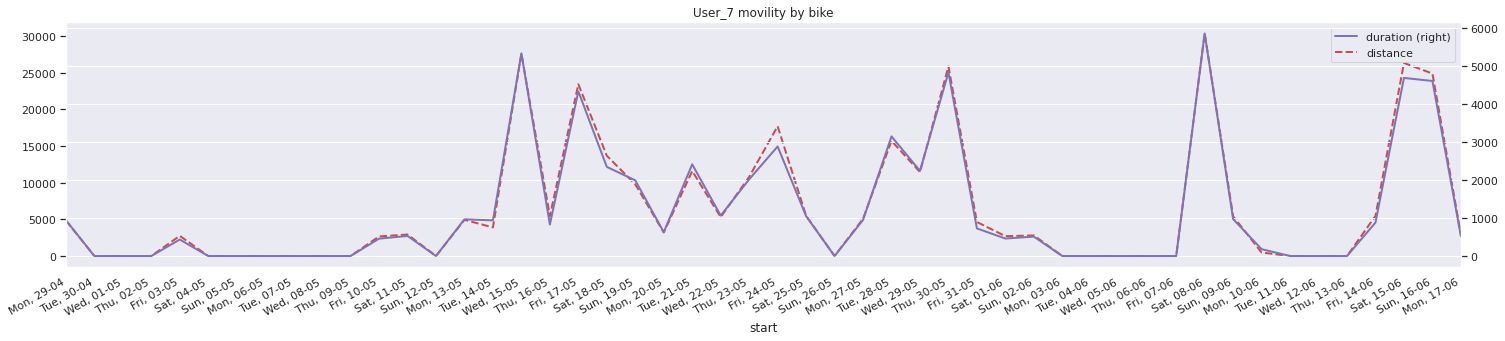

In [226]:
User_7 = df_dates[df_dates['Alias']=='User_7'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_7.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_7 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>El incremento del uso de la bicicleta coincide con la disminucion del uso de coche, y viceversa, mayor uso del coche disminuye el uso de la bicicleta. Hay 3 días donde existe insuficiente data que coincide con algún dia de coche o bicicleta sin data. Podría ser relevante para el análisis.</p>

<p>Existe un uso relativamente frecuente del auto desde finales de Abril a comienzo de Mayo y luego para completamente coincidiencio con el incremento del uso de la bicicleta. El uso se incrementa notablemente a comienzos de Junio. Es necesario si este incremento significan varios recorridos dentro de la ciudad o se refieren a un viaje en especifico del usuario durante unos 10 días. Además, el uso del coche saber si frecuenta a los mismo lugares para saber si es un uso frecuente o si es esporádico y normalmente utiliza la bicicleta.</p>

<p>La caminata es indiferente hasta saber los recorridos que hacian. Analizando los patrones, pareciera que es un completemento ya sea a la bicileta o el coche. Existe el nulo uso de la bicicleta y el incremento de la duracion y distancia de las caminatas pero sucede lo mismo con el nulo uso del cochce y el incremento de caminata en otros casos. De todas formas, en distancia no es tan relevante en comparación con el coche y la bicicleta.</p>

#### Maps

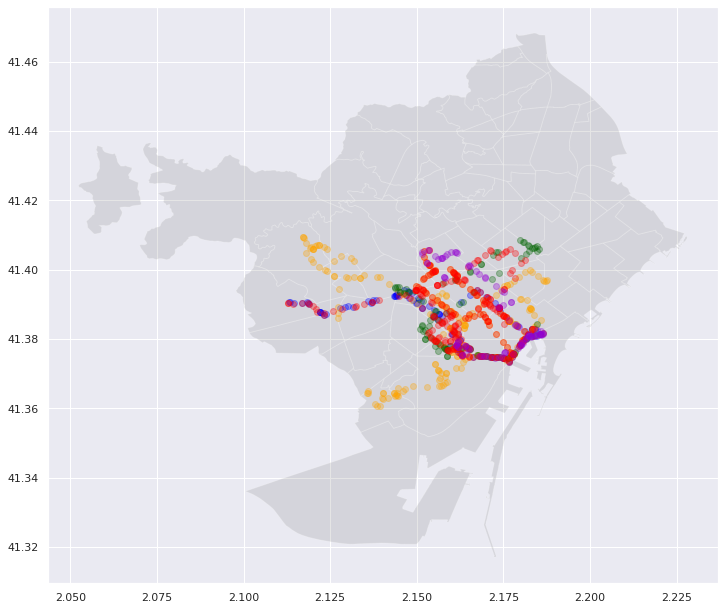

In [242]:
df_coordinates_User_7 = df_coordinates[(df_coordinates['Alias']=='User_7') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
df_coordinates_User_7.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_7.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_7.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_7.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_7.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 
df_coordinates_User_7.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 

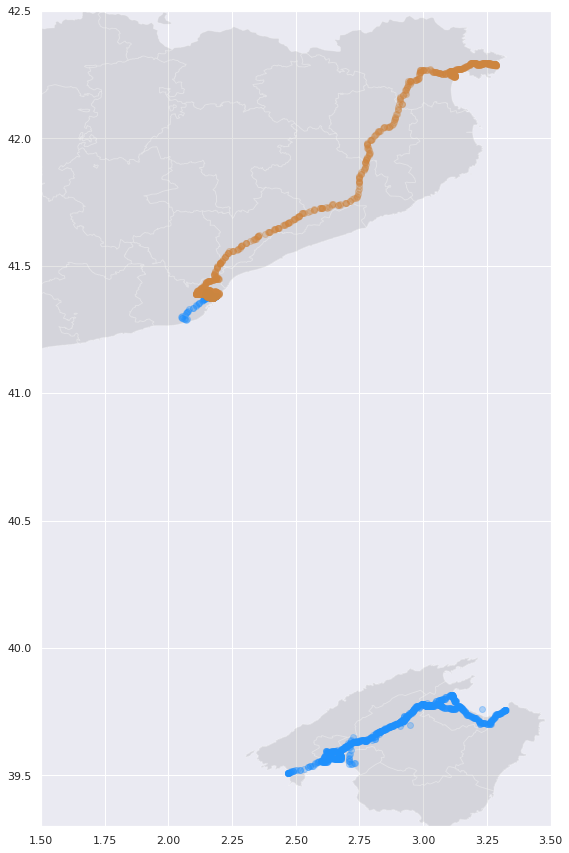

In [274]:
df_coordinates_User_7 = df_coordinates[(df_coordinates['Alias']=='User_7') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(2.1,2.4)
ax.set_ylim(39.3, 42.5)
ax.set_xlim(1.5,3.5)
df_coordinates_User_7.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_7.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)


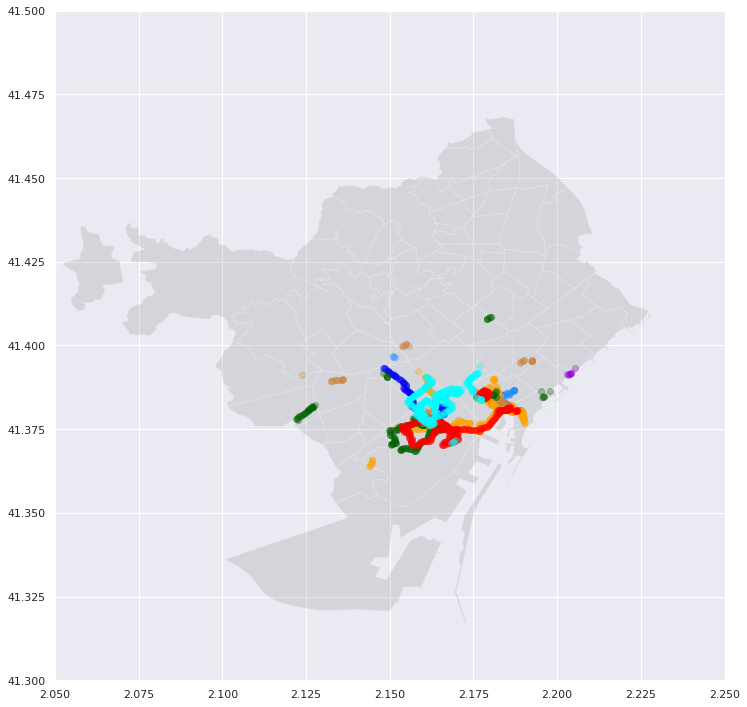

In [259]:
df_coordinates_User_7 = df_coordinates[(df_coordinates['Alias']=='User_7') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_7.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_7.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_7.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_7.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_7.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_7.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_7.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_7.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


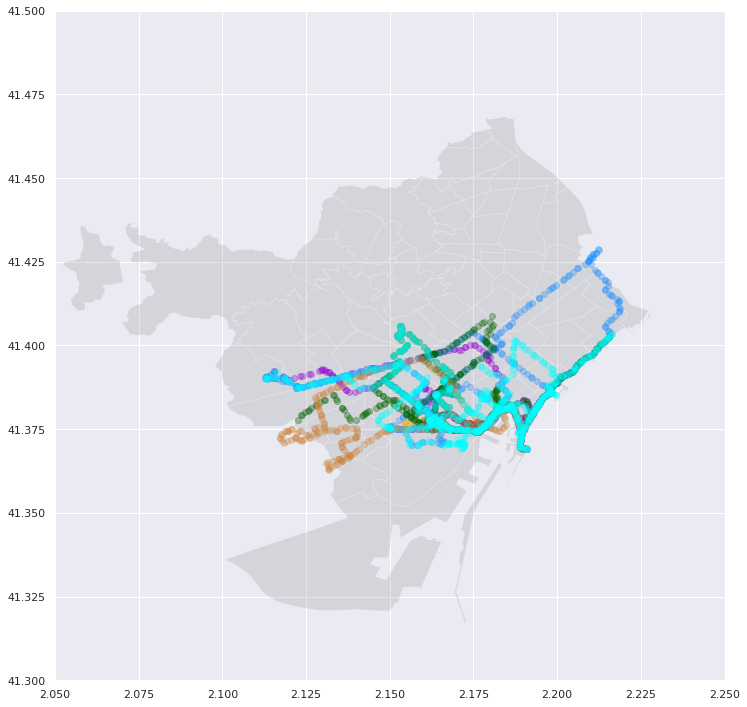

In [277]:
df_coordinates_User_7 = df_coordinates[(df_coordinates['Alias']=='User_7') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_7.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_7.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_7.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_7.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_7.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_7.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_7.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_7.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

De acuerdo al patrón encontrado de su rutina por donde camina y analizando las horas, el User_7 vive por la zona de el Raval en Sant Antoni y frecuenta la zona de Ciutat Vella (quizás trabajo) caminando de un lugar la otro. De igual manera frecuenta ambas zonas en coche lo cual refuerza esa hipótesis. Una zona que frecuenta en coche y no se ve tan reflejado en las caminatas es Les Corts.

Además tiene dos viajes en coche el primero por el 10 de Junio por la costa Brava hacia Cadaques y el segundo por el 12 de Junio por Mallorca. Además se puede observar que frecuenta el uso de la bicicleta por toda la ciudad de Barcelona sin una ruta específica o de rutina.


#### User_8

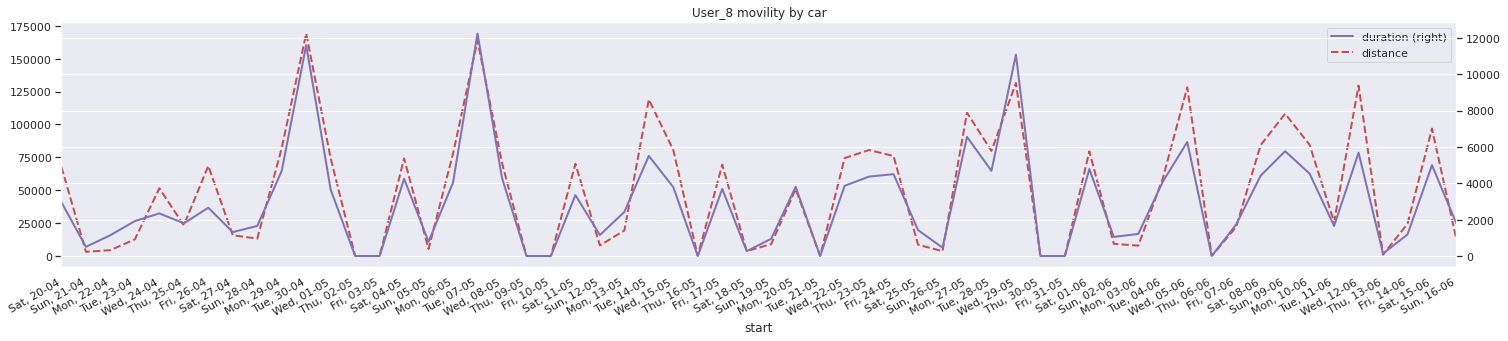

In [234]:
User_8 = df_dates[df_dates['Alias']=='User_8'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_8.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_8 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

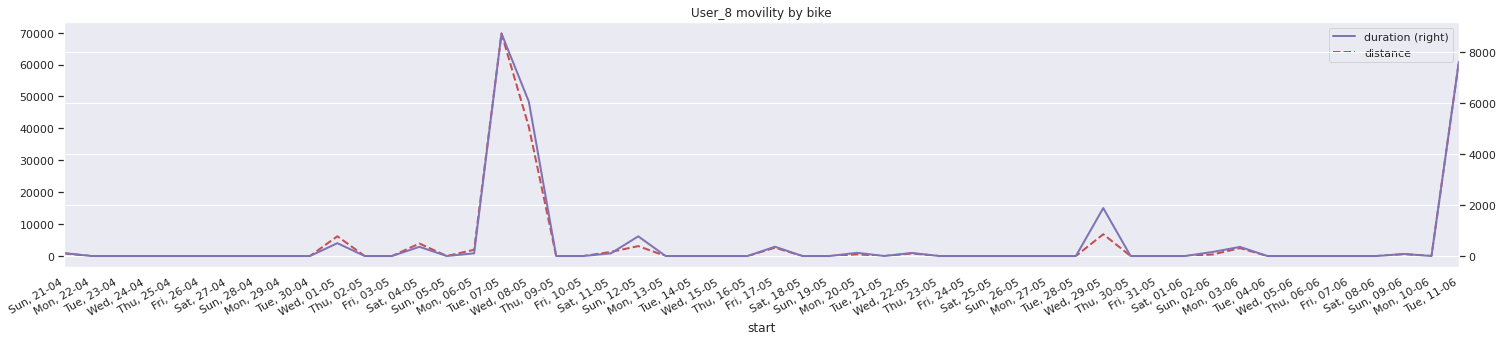

In [236]:
User_8 = df_dates[df_dates['Alias']=='User_8'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_8.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_8 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

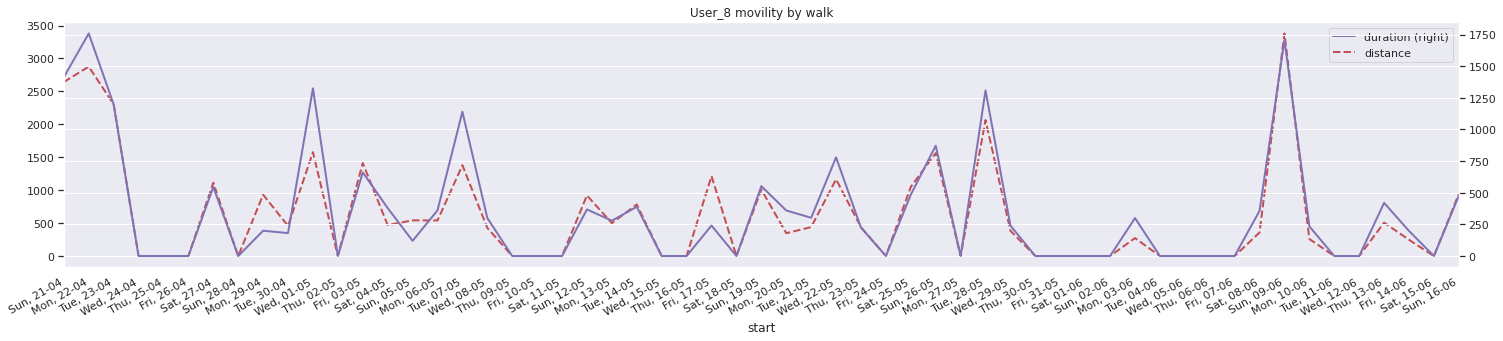

In [235]:
User_8 = df_dates[df_dates['Alias']=='User_8'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_8.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_8 movility by walk')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>El User_8 claramente tiene una preferencia de movilizarse en coche, sin embargo, presenta un patrón de no utilizar el coche los viernes y sábados que se repite varias veces en los dos meses de data disponible. El cual no se cumple del todo en Junio pero existe uno o dos días que utiliza o muy poco o nada el coche.</p>

<p>El patrón del coche se vuelve a repetir incluyendo a veces los jueves donde el usuario no tiene movilidad ni caminando ni coche. El cuál en la semana del 31-05 al 08-06 la caminata es prácticamente nula. El cuál coincide un poco con el cambio del patrón del coche a partir de Junio. Es claro que usuario no es de caminar.</p>

<p>El uso de la bicicleta se resume dos períodos cortos con picos altos que representan una distancia importante, pero luego de esos el uso esporádico y no representa un uso frecuente ni importante.</p>

<p>El usuario presenta una suma de data en la cataegoria de insufficient data que asumo podría tener alguna incidencia en el análisis.</p>

#### Maps

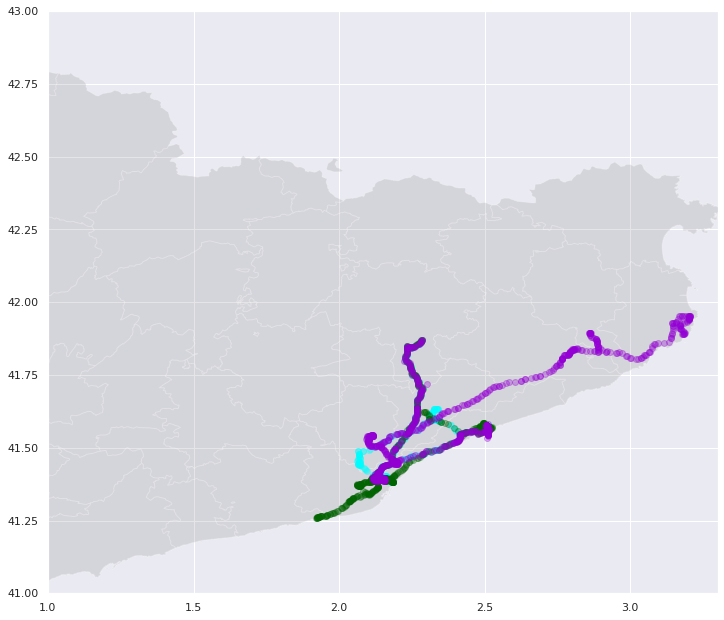

In [320]:
df_coordinates_User_8 = df_coordinates[(df_coordinates['Alias']=='User_8') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 43)
ax.set_xlim(1,3.3)
df_coordinates_User_8.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) #Maresme Vic
df_coordinates_User_8.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3) #Maresme(27) Garraf (20) Vic
df_coordinates_User_8.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) # Vic, Caleya (Costa Brava)

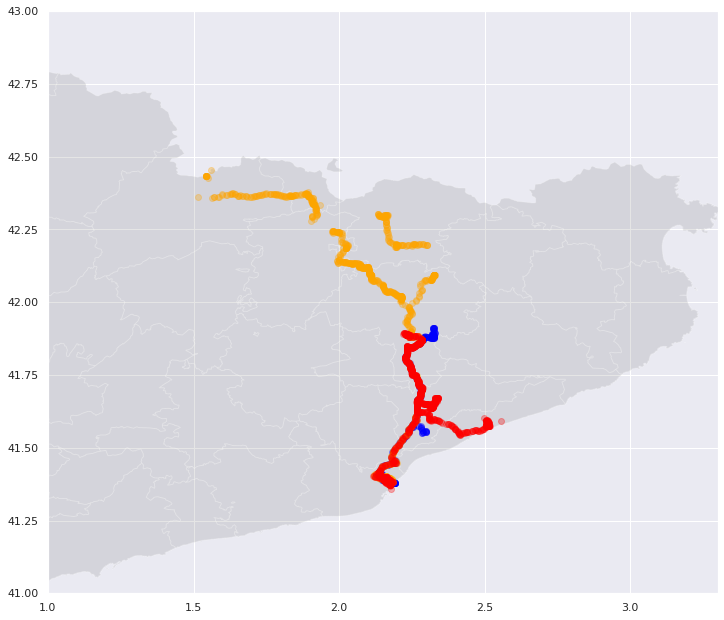

In [304]:
df_coordinates_User_8 = df_coordinates[(df_coordinates['Alias']=='User_8') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 43)
ax.set_xlim(1,3.3)
df_coordinates_User_8.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3) #Barcelona - Vic
df_coordinates_User_8.loc['2021-04-30':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #Barcelona - Vic
df_coordinates_User_8.loc['2021-05-07':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) # Barcelona - Andorra 8-May - Barcelona



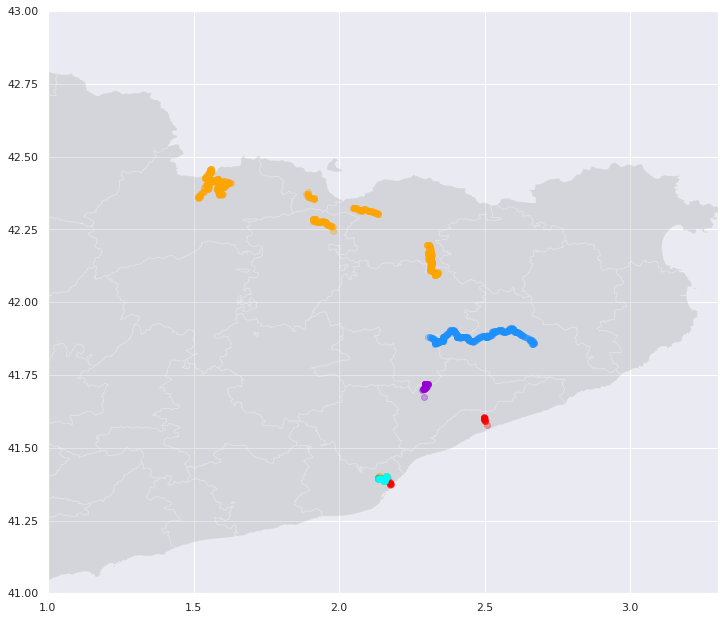

In [325]:
df_coordinates_User_8 = df_coordinates[(df_coordinates['Alias']=='User_8') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 43)
ax.set_xlim(1,3.3)
df_coordinates_User_8.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_8.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_8.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_8.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_8.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_8.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_8.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_8.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

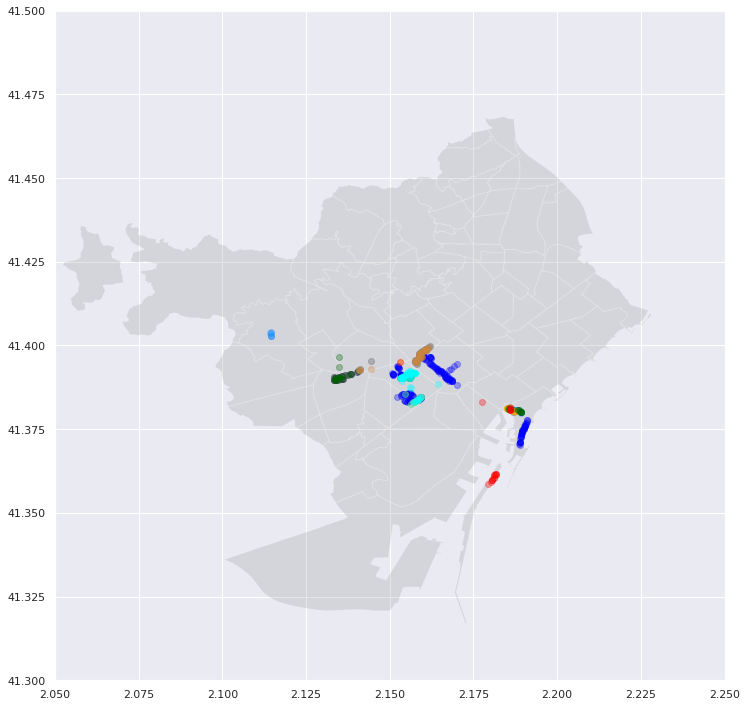

In [284]:
df_coordinates_User_8 = df_coordinates[(df_coordinates['Alias']=='User_8') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_8.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_8.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_8.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_8.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_8.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_8.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)
df_coordinates_User_8.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_8.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

Nota:

El User_8 en cuanto a los lugares que camina normalmente dentro de la ciudad varia pero la mayoría de los puntos se encuentran en Eixample (la zona que más frecuenta). Se mueve bastante en coche especialmente entre la zona de Barcelona y Vic. En una ocasión en la semana del 6 al 12 Mayo va más allá de Vic y llega hasta Andorra. Además tiene un par de semanas yendo al Maresme y una yendo hasta Caleya en la Costa Brava (en un tiempo de 3 semanas, 13 de Mayo al 3 de Junio,que va a esa dirección). Con una particularidad que la semana del 20 de Mayo va a Garraf.

Lo que es la bicicleta no es un medio de movildad que lo use seguido pero sus rcorridos pueden ser de largas distancias como su recorrido por Andorra, la Puigcerda o por Vic (en la semana 6 al 13 de Mayo) o incluso en dirección a Girona (en la semana del 10 al 18 de Junio).


#### User_9

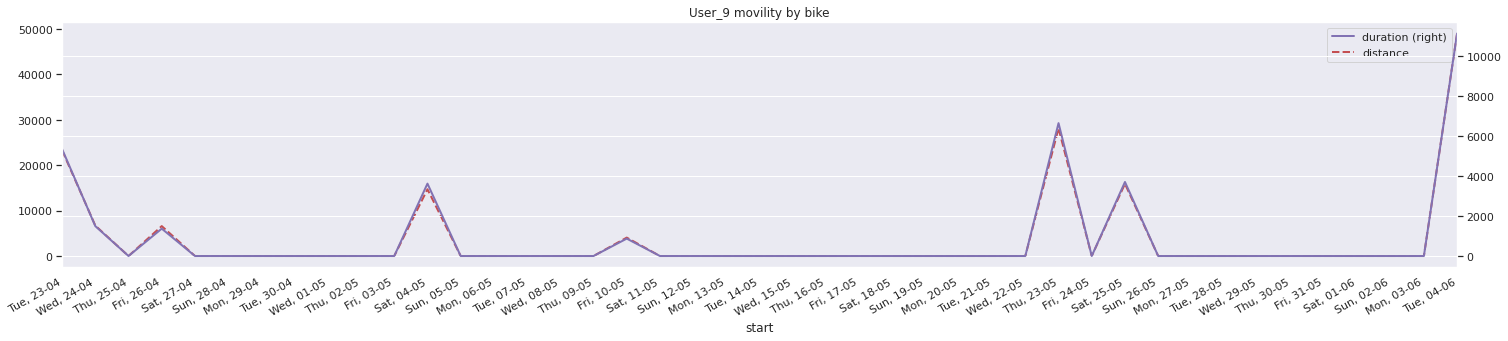

In [21]:
User_9 = df_dates[df_dates['Alias']=='User_9'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_9.loc['biking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_9 movility by bike')

plt.gcf().autofmt_xdate()
plt.show()

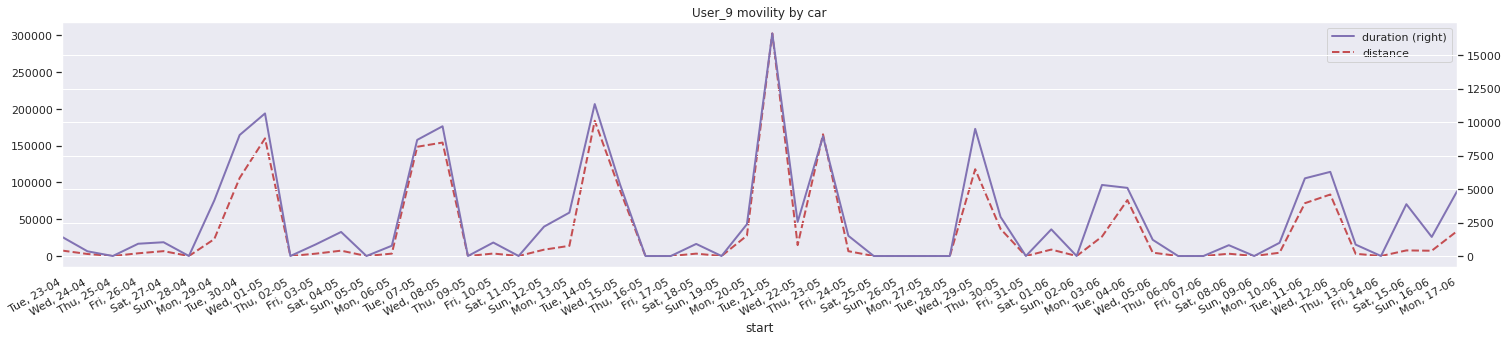

In [13]:
User_9 = df_dates[df_dates['Alias']=='User_9'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_9.loc['car'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_9 movility by car')

plt.gcf().autofmt_xdate()
plt.show()

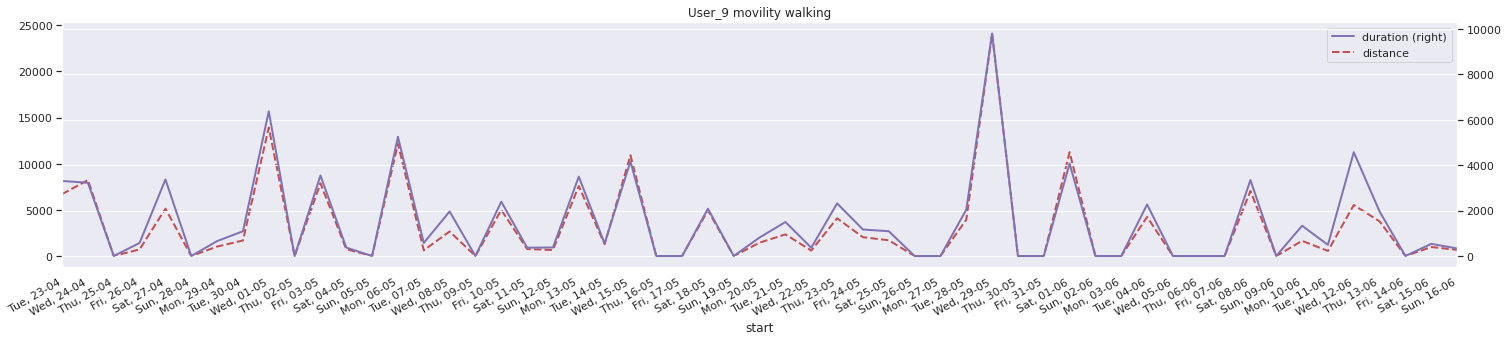

In [14]:
User_9 = df_dates[df_dates['Alias']=='User_9'].groupby('mode').resample('D').sum()
fig = plt.figure(figsize=(25,5))
ax = fig.add_subplot(111)

User_9.loc['walking'].plot(secondary_y='duration', style=['-', '--'], color=['m', 'r'], lw=2, sharex=False, ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %d-%m'))
ax.set_title('User_9 movility walking')

plt.gcf().autofmt_xdate()
plt.show()

<h3>Nota:</h3>

<p>User_9 se mueve en bus y bicicleta los cuales no coinciden exceptuando el día 24 de abril. No existe algún patrón repetitivo en ninguno de los modos de movilidad. En el caso de la bicileta expcetuando 3 días, generalmente lo utiliza los fin de semanas.</p>

<p>El coche es definitivamente el medio de transporte usado diariamente por el usuario. Generalmente el usuario lo usa de Martes a Jueves y el fin de semana (ya sea Sábado y/o Domingo).Exceptuando una semana la cual utiliza solamente Jueves y Viernes. </p>

<p>En cuánto a las caminatas, el patrón coincide con el del coche. Exceptuando unos cuántos días, la caminata va acompañada con el uso del coche y viceversa cuando no usa el coche. Falta confirmar si es la misma ubicación para cerciorarse que es lugar de trabajo o un lugar que frecuenta esos días.</p>

#### Maps

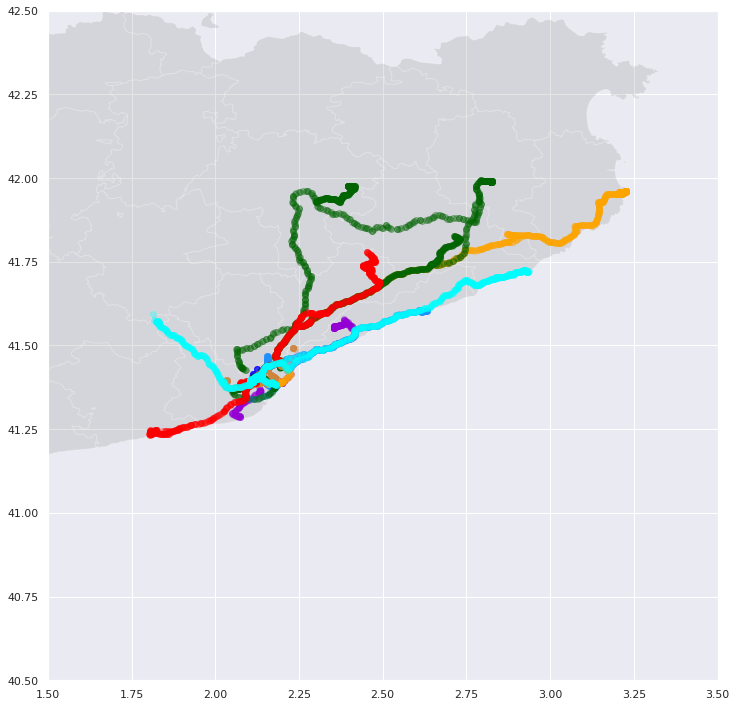

In [353]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='car')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(41, 42)
#ax.set_xlim(2.1,2.4)
ax.set_ylim(40.5, 42.5)
ax.set_xlim(1.5,3.5)
df_coordinates_User_9.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_9.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_9.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #
df_coordinates_User_9.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) # Sitges Montseny
df_coordinates_User_9.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) # LLeida, Costa Brava


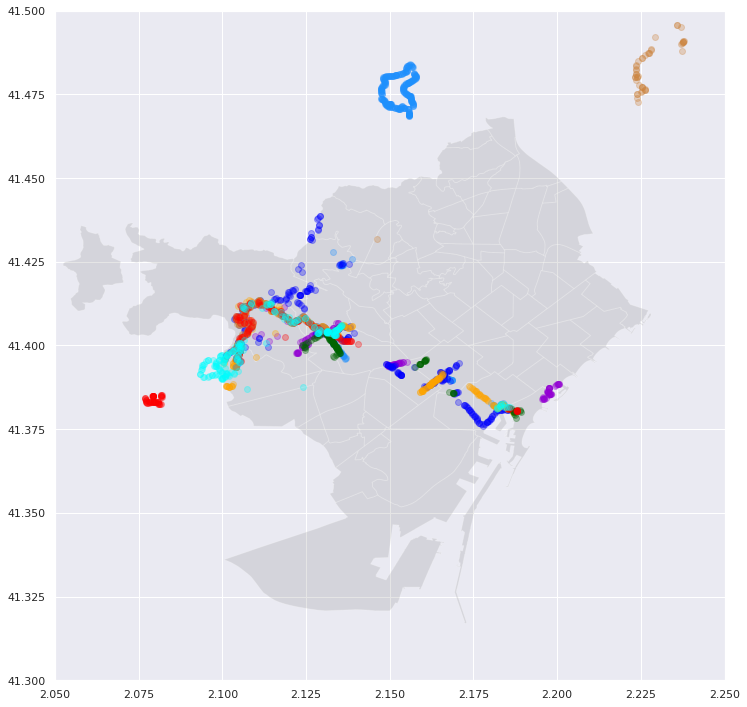

In [355]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_9.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_9.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_9.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #
df_coordinates_User_9.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) #

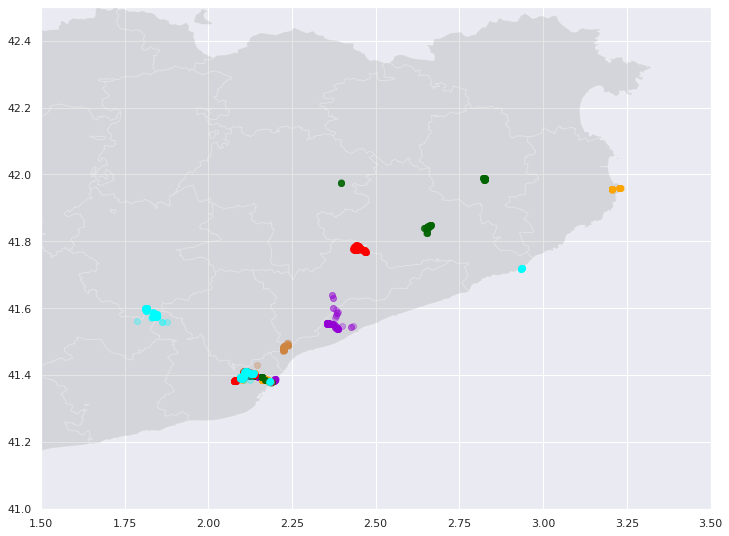

In [357]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='walking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 42.5)
ax.set_xlim(1.5,3.5)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
df_coordinates_User_9.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) #
#df_coordinates_User_9.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
#df_coordinates_User_9.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_9.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #
df_coordinates_User_9.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) #

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


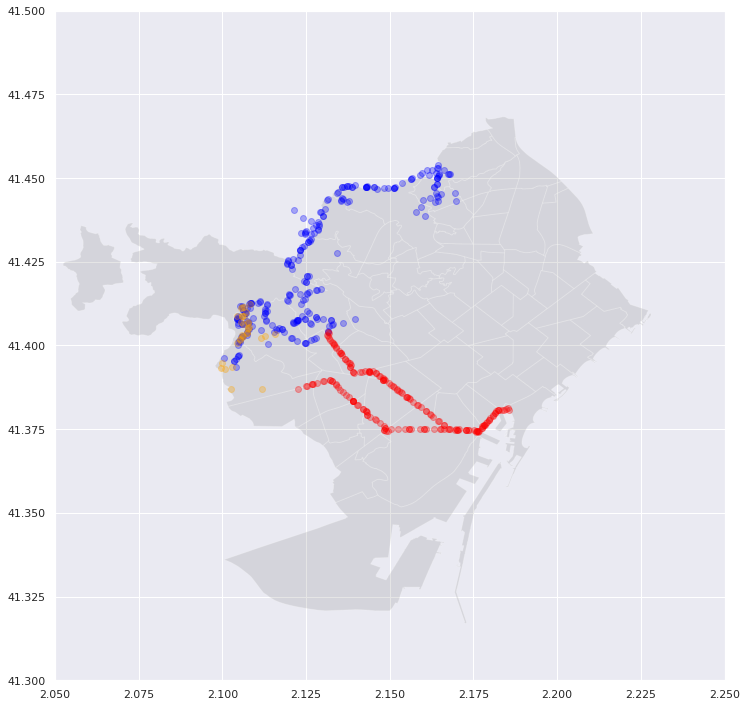

In [333]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_9.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) 
df_coordinates_User_9.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_9.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_9.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3)
df_coordinates_User_9.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) 
df_coordinates_User_9.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) 

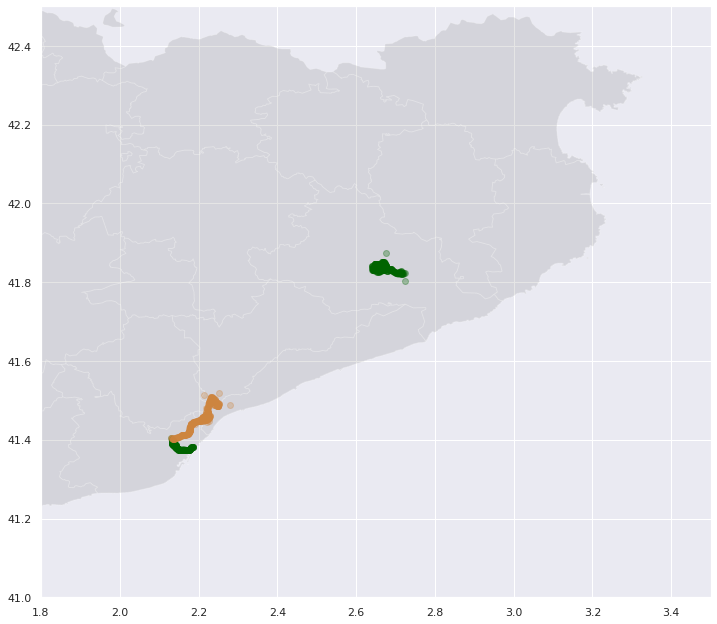

In [336]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='biking')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_sp.plot(ax=ax, color='gray', alpha=0.2)
ax.set_ylim(41, 42.5)
ax.set_xlim(1.8,3.5)
#ax.set_ylim(41.3,41.5)
#ax.set_xlim(2.05,2.25)
df_coordinates_User_9.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3)
df_coordinates_User_9.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:681: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


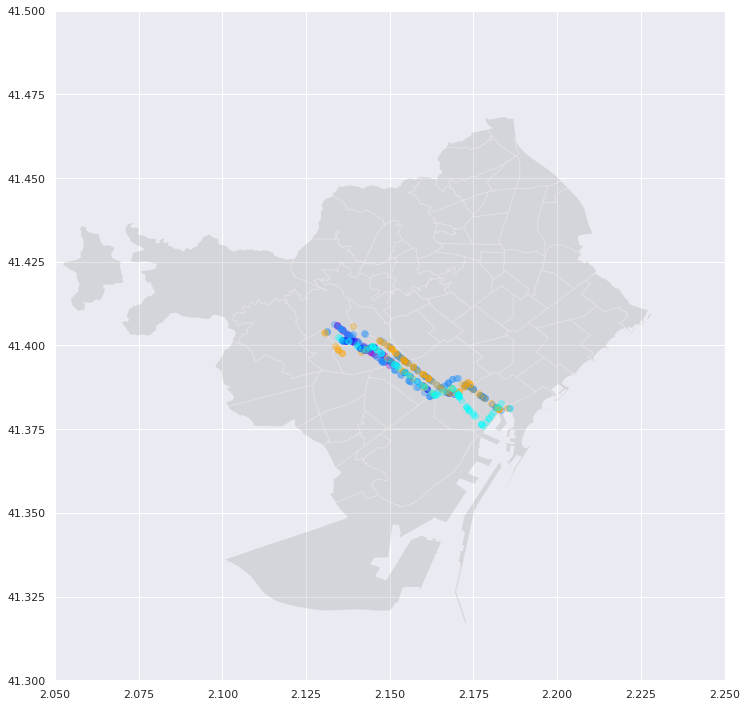

In [360]:
df_coordinates_User_9 = df_coordinates[(df_coordinates['Alias']=='User_9') & (df_coordinates['Mode']=='bus')]
fig,ax = plt.subplots(1, figsize = (12,15))
Spain = map_bcn.plot(ax=ax, color='gray', alpha=0.2)
#ax.set_ylim(40.5, 42)
#ax.set_xlim(0.5,2.5)
ax.set_ylim(41.3,41.5)
ax.set_xlim(2.05,2.25)
df_coordinates_User_9.loc['2021-05-27':'2021-06-03'].plot(ax=Spain, color='darkviolet', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-10':'2021-06-18'].plot(ax=Spain, color='dodgerblue', alpha=0.3)
df_coordinates_User_9.loc['2021-04-21':'2021-04-29'].plot(ax=Spain, color='blue', alpha=0.3)
df_coordinates_User_9.loc['2021-05-06':'2021-05-13'].plot(ax=Spain, color='orange', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-20':'2021-05-27'].plot(ax=Spain, color='darkgreen', alpha=0.3) #
df_coordinates_User_9.loc['2021-06-03':'2021-06-10'].plot(ax=Spain, color='peru', alpha=0.3) #
df_coordinates_User_9.loc['2021-04-29':'2021-05-06'].plot(ax=Spain, color='red', alpha=0.3) #
df_coordinates_User_9.loc['2021-05-13':'2021-05-20'].plot(ax=Spain, color='cyan', alpha=0.3) #

Nota:

El User_9 frecuenta bastante el coche usualmente entre Martes y Jueves y el fin de semana pero con direcciones totalmente diferentes. Desde Sitges, a Vic, a la Costa Brava, el Maresme o el Montseny. Es una persona que le gusta moverse bastante por esas zonas. Dentro de la ciudad de Barcelona se mueve bastante entre la Zona de Les Corts y Sarria-Sant Gervasi. Verificando el bus, se puede confirmar que se mueve entre la zona de Sant-Gervasi y Barceloneta rutinario (quizás vivienda y trabajo). Además cierta frecuencia a la Barcelona caminando como en bicileta. Además en bicileta tiene algún reocrrido de cierta distancia (por Granollers y por Montcada).


##<h3>Conclusiones:</h3>

Es posible realizar un analisis más específico de cada uno de lo usuarios en referencia al comportamiento del uso de los diferentes tipo de movilidad y los lugares que frecuenta a cierta hora o tratar de recrear posibles rutinas o aficiones del usuario. Además es posible combinar mapas con mayor cantidad de capas para ver más específicamente la finalidad de la movilidad del usuario en los diferentes modos. Dependiendo de la finalidad del análisis (sin ser tan generalizado) se pueden llegar a entender más al usuario y de su manera de movilizarse y poder entender los riesgos dentro de sus rutinas o costumbres al movilizarse.

### Clusters

In [109]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 7.4 MB/s 


In [142]:
# Clustering for mode or users
df_clust = df[['distance', 'duration', 'mode','Alias']]
le = LabelEncoder()
df_clust['Alias_cat'] = le.fit_transform(df_clust['Alias'])
df_clust['mode_cat'] = le.fit_transform(df_clust['mode'])
df_clust = df_clust.drop(columns=['Alias', 'mode'], axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import category_encoders as ce

#encoder = ce.BinaryEncoder(cols=['mode'])
#df_binary = encoder.fit_transform(df_clusters)
lb = LabelBinarizer()
df_clusters = df[['distance', 'duration', 'mode']]
result = lb.fit_transform(df_clusters['mode'])
results_df =  pd.DataFrame(result, columns=lb.classes_)

df_clusters_ = pd.concat([df_clusters, results_df], axis=1)
df_clusters_ = df_clusters_.drop(columns=['insufficient_data', 'mode'], axis=1)



scaler = MinMaxScaler()
df_clusters_sc  = scaler.fit_transform(df_clusters_)

In [132]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

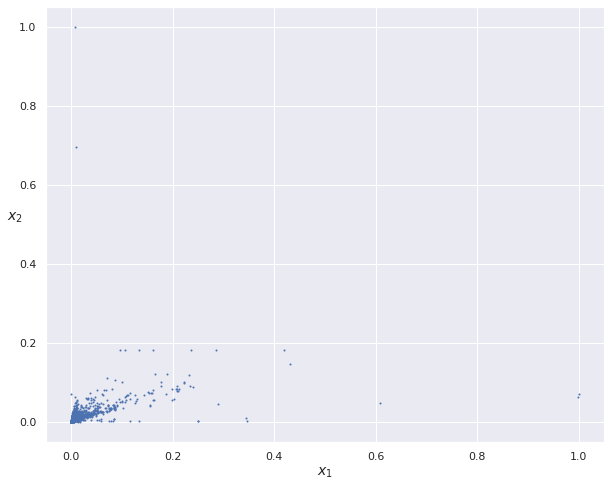

In [157]:
plt.figure(figsize=(10, 8))
plot_clusters(df_clusters_sc)
plt.show()

For n_clusters = 5 The average silhouette_score is : 0.9527102968981223
For n_clusters = 6 The average silhouette_score is : 0.9663000835044333
For n_clusters = 7 The average silhouette_score is : 0.9713327268543513
For n_clusters = 8 The average silhouette_score is : 0.9761142481203379
For n_clusters = 9 The average silhouette_score is : 0.9774047428478151
For n_clusters = 10 The average silhouette_score is : 0.9788286232392585
For n_clusters = 11 The average silhouette_score is : 0.9784949665207602
For n_clusters = 12 The average silhouette_score is : 0.9787525031334318


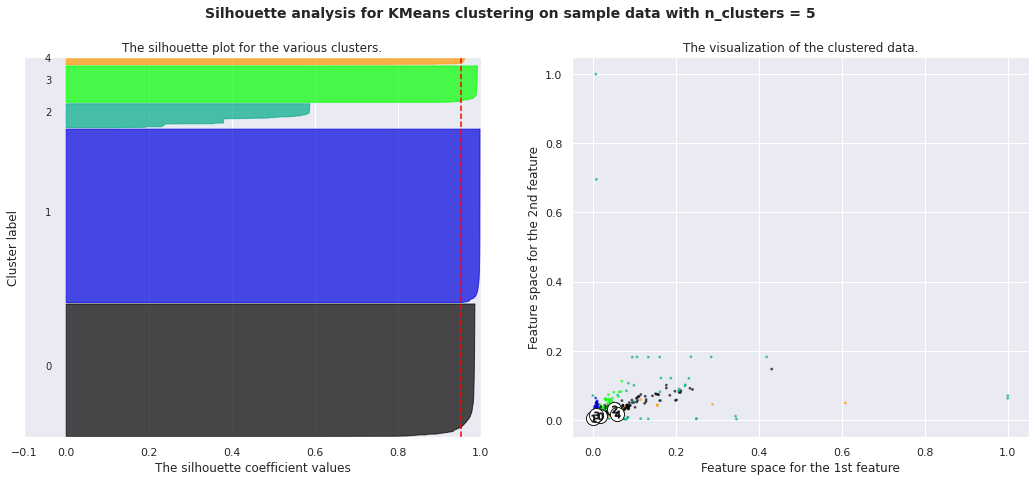

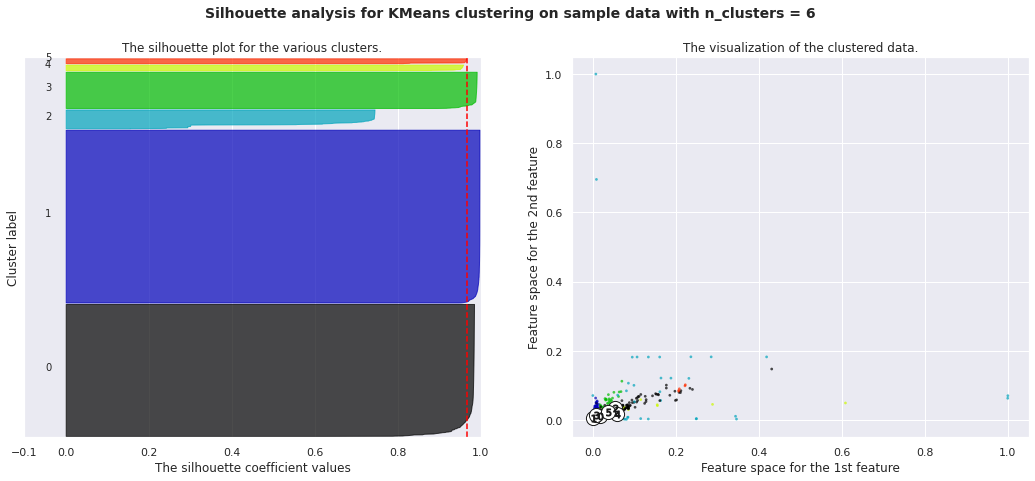

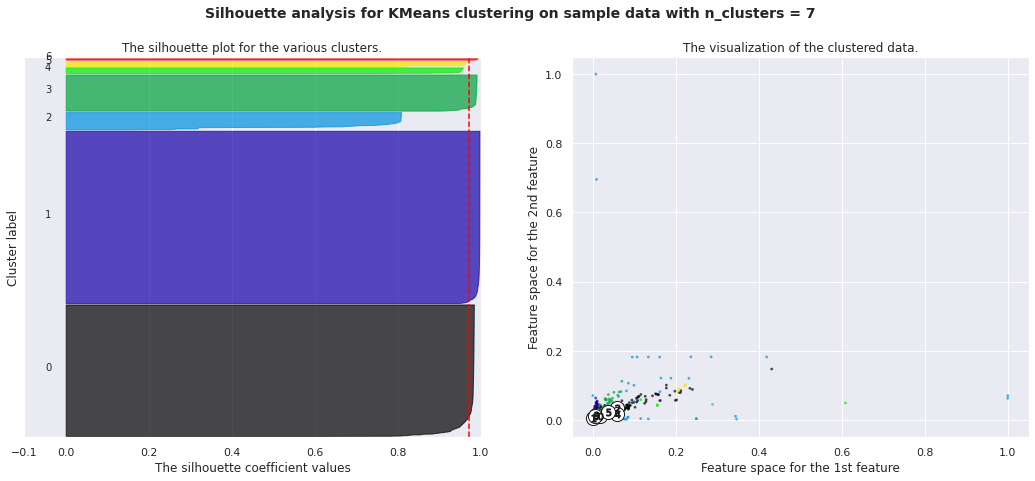

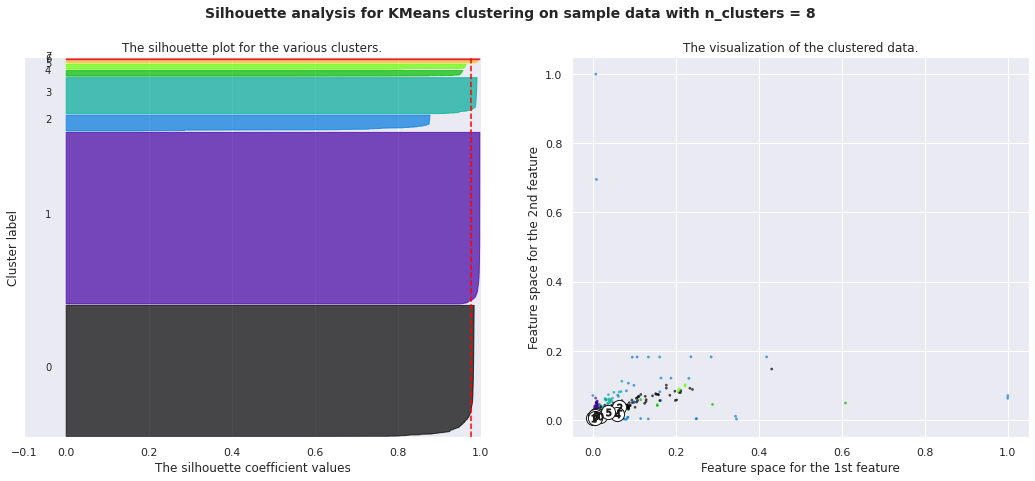

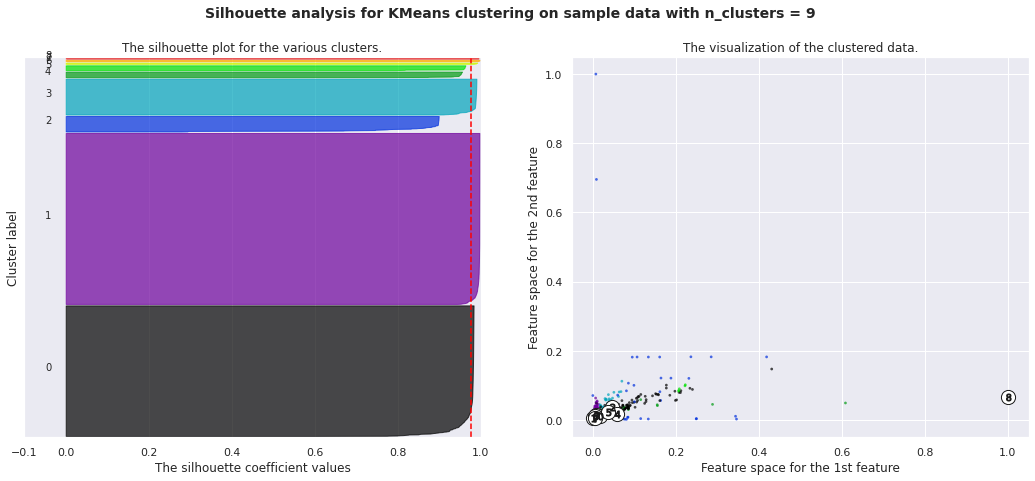

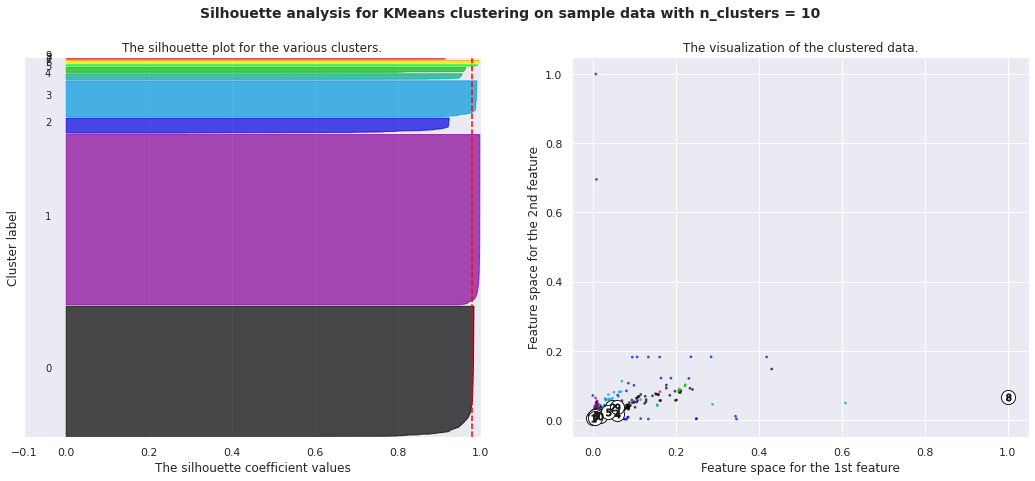

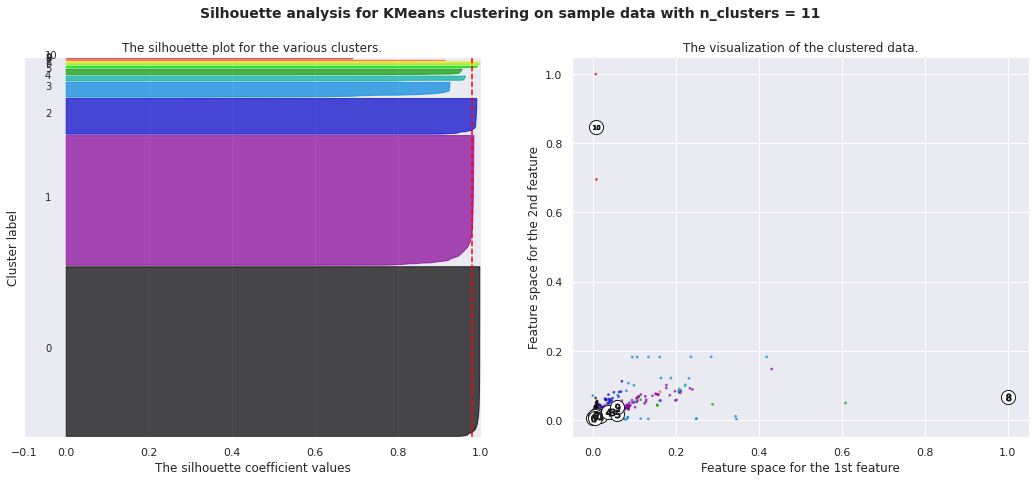

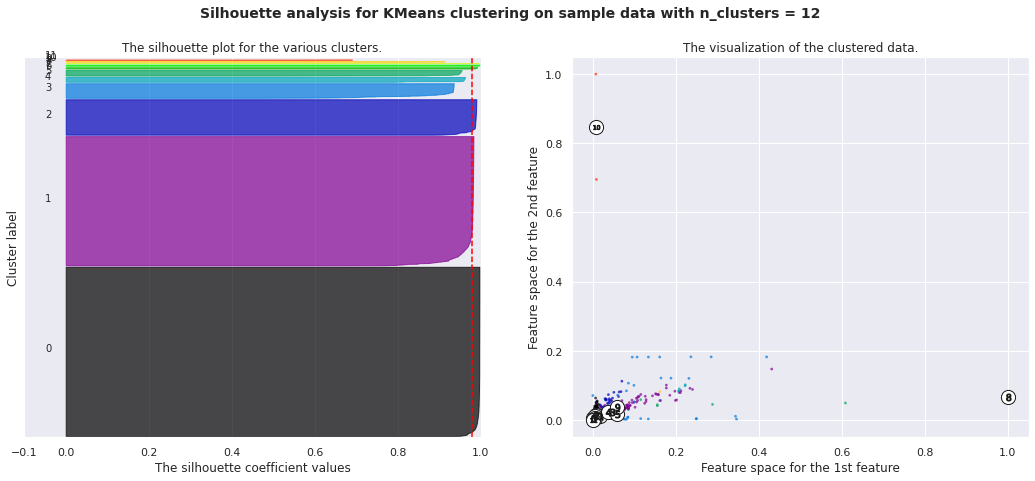

In [125]:
# Find the appropiate number of clusters for labeling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [5,6,7,8,9,10,11,12]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_clusters_sc) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
    cluster_labels = clusterer.fit_predict(df_clusters_sc)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_clusters_sc, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clusters_sc, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels / n_clusters)
    ax2.scatter(df_clusters_sc[:, 0], df_clusters_sc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [144]:
clusterer = KMeans(n_clusters=n_clusters, random_state=10, max_iter=1000)
cluster_labels = clusterer.fit_predict(df_clusters_sc)

In [150]:
df['Clusters'] = cluster_labels
df['mode_cat'] = df_clust['mode_cat']
df['Alias_cat'] = df_clust['Alias_cat']

In [163]:
df.head(10) # Clustering is close to mode_category so based in transportation

user_id                     start  ... mode_cat Alias_cat
0  608170e5c999f10700000004 2021-04-29 08:29:17+02:00  ...       10         0
1  608170e5c999f10700000004 2021-05-17 12:22:00+02:00  ...       10         0
2  608170e5c999f10700000004 2021-06-10 21:21:28+02:00  ...        1         0
3  608170e5c999f10700000004 2021-05-08 09:35:20+02:00  ...        8         0
4  608170e5c999f10700000004 2021-05-20 21:18:25+02:00  ...       10         0
5  608170e5c999f10700000004 2021-06-13 21:30:10+02:00  ...        2         0
6  608170e5c999f10700000004 2021-05-12 16:49:12+02:00  ...       10         0
7  608170e5c999f10700000004 2021-06-03 19:12:59+02:00  ...       10         0
8  608170e5c999f10700000004 2021-06-18 17:29:02+02:00  ...        6         0
9  608170e5c999f10700000004 2021-05-14 19:10:30+02:00  ...       10         0

[10 rows x 11 columns]

Nota:

Usando clustering no queda tan claro como poder organizar los grupos para poder realizar una prediccion y además que se quiere predecir. Analizando la data, lo más importante que se puede obtener de la data es cuanto tiempo usario va usar un modo de transporte en el futuro. De esta manera, si podemos agrupar la data por periodos de tiempo; podemos predecir el tiempo o la distancia que va recorrer en el próximo período.

Además, se observó que la data se puede separar por Usuario, el Modo de transporte, incluso se observó el comportamiento del uso de cada transporte. Se puede deducir de ada usuario que medio utiliza para que situaciones y como podría necesitar un seguro.


### Model

In [308]:
df_model = df[['start','mode_cat','Alias_cat','distance','duration']]
df_model['timestamp'] = pd.to_datetime(df_model['start'], format="%Y-%m-%dT%H:%M:%S%z")
df_model = df_model.drop(columns=['start'], axis=1)
df_model['year'] = df_model['timestamp'].dt.year
df_model['month'] = df_model['timestamp'].dt.month
df_model['week'] = df_model['timestamp'].dt.week
df_model = df_model.drop(columns=['timestamp'], axis=1)
df_model.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


mode_cat  Alias_cat  distance  duration  year  month  week
0        10          0      8370      4400  2021      4    17
1        10          0       295       327  2021      5    20
2         1          0      4212       423  2021      6    23
3         8          0     34453      1680  2021      5    18
4        10          0       347       291  2021      5    20

In [309]:
df_model['week'].unique()

array([17, 20, 23, 18, 19, 22, 24, 16, 21, 15])

In [325]:
df_model = df_model.groupby(['Alias_cat', 'mode_cat', 'week']).mean()
df_model = df_model.reset_index()

In [326]:
X_train = df_model[df_model['week']<22]
X_test = df_model[df_model['week']>=22]
y_train = X_train.duration
y_test = X_test.duration
X_train = X_train.drop(columns=['duration'])
X_test = X_test.drop(columns=['duration'])
X_test.head()

Alias_cat  mode_cat  week  distance     year  month
2           0         1    23 15860.000 2021.000  6.000
7           0         2    23  8894.083 2021.000  6.000
8           0         2    24  2880.833 2021.000  6.000
9           0         3    23 10329.000 2021.000  6.000
10          0         3    24 66346.500 2021.000  6.000

In [327]:
#X_train.columns[X_train.isna().any()].tolist()
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [399]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

mse = make_scorer(mean_squared_error,greater_is_better=False)

param_grid = [
    {
        "alpha": np.arange(0.0001, 100, 0.001),
        "selection": ['cyclic', 'random'],
    }
]

grid_search = RandomizedSearchCV(regr, param_grid, verbose=1, n_jobs=-1, scoring=mse)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'selection': 'random', 'alpha': 51.954100000000004}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [425]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


#regr = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10000.0, epsilon=0.2,))
#regr.fit(X_train, y_train)
regr =  Lasso(alpha=0.01)
regr.fit(X_train,y_train)
#regr = make_pipeline(StandardScaler(), DecisionTreeRegressor(min_samples_split=40, min_samples_leaf=30, max_features=2, max_depth=1))
#regr.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [426]:
predictions = regr.predict(X_test)

from sklearn import metrics

print("The model performance for testing set")
MAE_test = metrics.mean_absolute_error(y_test, predictions)
MSE_test = metrics.mean_squared_error(y_test, predictions)
variance_score = metrics.explained_variance_score(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print('MAE :', MAE_test, 'MSE :', MSE_test, 'r2 :', r2, 'variance score :', variance_score)

The model performance for testing set
MAE : 602.705206139139 MSE : 751461.9462769261 r2 : 0.20387807675308278 variance score : 0.28361032666880115


In [270]:
df_results = pd.DataFrame()
df_results['y_test'] = y_test
df_results['predictions'] = predictions

<h3>Conclusiones</h3>

Debido a diferentes circunstancias al analizar el problema, el modelo no muestra ningún buen resultado para poder hacer una predicción. La idea detrás del modelo era realizar un TimeSeries pero debido a eso tendría que hacerlo para cada uno de los usuarios y para cada modo de transporte para que tenga algún sentido (TimeSeries Seasonality en cortos periodos). Al final de cuenta lo que me interesaba obtener era la duración o la distancia para la siguientes semanas. La razon es que el comportamiento del usuario se lo puede entender de acuerdo a cuando y cada cuanto utiliza cada uno y a partir de ahi personalizar el servicio al usuario.

Por ser más específico con cada una de las distintas áreas de la compañía. Un usuario usa la bicicleta, por citar un ejemplo. Si el uso es fuera o dentro de la ciudad. Que tantos riestos toma al usar la bicicleta. Por lo cual se refiere a otorgar un producto (seguro) más a medida al usuario y ofrecer el producto al ususario de acuerdo a su comportamiento/rutina, y ofrecer hasta un producto más personalizado (Una mezcla de productos para el usuario o un producto de acuerdo a la ocasión o época del año).